In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './..')
sys.path.insert(0, './../scripts')

In [2]:
import numpy as np
from scipy.io import loadmat
from scipy.ndimage import generate_binary_structure,gaussian_filter,label,binary_closing,zoom
from scipy.stats import spearmanr,kendalltau,permutation_test
from skimage.measure import regionprops
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

import rf_analyze_func as rfaf
import analyze_func as af
import plot_func as pf

# Open Naive .mat File

In [3]:
naive_mat = loadmat('./../RF Data Lempel/RF Naive animals.mat')
exper_mat = loadmat('./../RF Data Lempel/RF Experienced animals.mat')

In [4]:
naive_mat.keys()

dict_keys(['__header__', '__version__', '__globals__', 'OFF', 'ON', 'RF'])

In [5]:
print(naive_mat['OFF'].shape)
print(exper_mat['OFF'].shape)

Nnaive = naive_mat['OFF'].shape[1]
Nexper = exper_mat['OFF'].shape[1]

(1, 33)
(1, 38)


In [6]:
naive_RF_ON = [None]*Nnaive
naive_RF_OF = [None]*Nnaive
naive_ON_Rsp = [None]*Nnaive
naive_OF_Rsp = [None]*Nnaive
exper_RF_ON = [None]*Nexper
exper_RF_OF = [None]*Nexper
exper_ON_Rsp = [None]*Nexper
exper_OF_Rsp = [None]*Nexper

sig_cutoff = 2.5

for i in range(Nnaive):
    n = naive_mat['RF'][0,i].shape[0]
    pix_len = 100/n
    
    naive_RF_ON[i],naive_RF_OF[i] = rfaf.binary_clean_RF((naive_mat['RF'][0,i] > sig_cutoff).astype(int),
                                                         (naive_mat['RF'][0,i] <-sig_cutoff).astype(int),
                                                         pix_len)
    naive_ON_Rsp[i],naive_OF_Rsp[i] = rfaf.binary_clean_RF((naive_mat['ON'][0,i] > sig_cutoff).astype(int),
                                                           (naive_mat['OFF'][0,i]> sig_cutoff).astype(int),
                                                           pix_len)
    # naive_ON_Rsp[i],naive_OF_Rsp[i] = rfaf.center_rescale_RF(naive_ON_Rsp[i],naive_OF_Rsp[i],
    #                                                          pix_len,rfaf.find_cent_idx(naive_RF_ON[i]+naive_RF_OF[i]))
    # naive_RF_ON[i],naive_RF_OF[i] = rfaf.center_rescale_RF(naive_RF_ON[i],naive_RF_OF[i],
    #                                                        pix_len,rfaf.find_cent_idx(naive_RF_ON[i]+naive_RF_OF[i]))
    naive_ON_Rsp[i],naive_OF_Rsp[i] = rfaf.center_rescale_RF((naive_mat['ON'][0,i] > sig_cutoff).astype(int),
                                                             (naive_mat['OFF'][0,i]> sig_cutoff).astype(int),
                                                             pix_len,rfaf.find_cent_idx(naive_RF_ON[i]+naive_RF_OF[i]))
    naive_RF_ON[i],naive_RF_OF[i] = rfaf.center_rescale_RF((naive_mat['RF'][0,i] > sig_cutoff).astype(int),
                                                           (naive_mat['RF'][0,i] <-sig_cutoff).astype(int),
                                                           pix_len,rfaf.find_cent_idx(naive_RF_ON[i]+naive_RF_OF[i]))
    # naive_ON_Rsp[i],naive_OF_Rsp[i] = rfaf.binary_clean_RF((np.logical_or(naive_mat['ON'][0,i] > sig_cutoff,
    #                                                                       naive_mat['RF'][0,i] > sig_cutoff)).astype(int),
    #                                                   (np.logical_or(naive_mat['OFF'][0,i]> sig_cutoff,
    #                                                                  naive_mat['RF'][0,i] <-sig_cutoff)).astype(int),pix_len)
    
for i in range(Nexper):
    n = exper_mat['RF'][0,i].shape[0]
    pix_len = 100/n
    
    exper_RF_ON[i],exper_RF_OF[i] = rfaf.binary_clean_RF((exper_mat['RF'][0,i] > sig_cutoff).astype(int),
                                                         (exper_mat['RF'][0,i] <-sig_cutoff).astype(int),
                                                         pix_len)
    exper_ON_Rsp[i],exper_OF_Rsp[i] = rfaf.binary_clean_RF((exper_mat['ON'][0,i] > sig_cutoff).astype(int),
                                                           (exper_mat['OFF'][0,i]> sig_cutoff).astype(int),
                                                           pix_len)
    # naive_ON_Rsp[i],naive_OF_Rsp[i] = rfaf.center_rescale_RF(naive_ON_Rsp[i],naive_OF_Rsp[i],
    #                                                          pix_len,rfaf.find_cent_idx(naive_RF_ON[i]+naive_RF_OF[i]))
    # naive_RF_ON[i],naive_RF_OF[i] = rfaf.center_rescale_RF(naive_RF_ON[i],naive_RF_OF[i],
    #                                                        pix_len,rfaf.find_cent_idx(naive_RF_ON[i]+naive_RF_OF[i]))
    exper_ON_Rsp[i],exper_OF_Rsp[i] = rfaf.center_rescale_RF((exper_mat['ON'][0,i] > sig_cutoff).astype(int),
                                                             (exper_mat['OFF'][0,i]> sig_cutoff).astype(int),
                                                             pix_len,rfaf.find_cent_idx(exper_RF_ON[i]+exper_RF_OF[i]))
    exper_RF_ON[i],exper_RF_OF[i] = rfaf.center_rescale_RF((exper_mat['RF'][0,i] > sig_cutoff).astype(int),
                                                           (exper_mat['RF'][0,i] <-sig_cutoff).astype(int),
                                                           pix_len,rfaf.find_cent_idx(exper_RF_ON[i]+exper_RF_OF[i]))
    # exper_ON_Rsp[i],exper_OF_Rsp[i] = rfaf.binary_clean_RF((np.logical_or(exper_mat['ON'][0,i] > sig_cutoff,
    #                                                                       exper_mat['RF'][0,i] > sig_cutoff)).astype(int),
    #                                                   (np.logical_or(exper_mat['OFF'][0,i]> sig_cutoff,
    #                                                                  exper_mat['RF'][0,i] <-sig_cutoff)).astype(int),pix_len)

Text(0.5, 1.0, 'Recentered and Resized Linear RF')

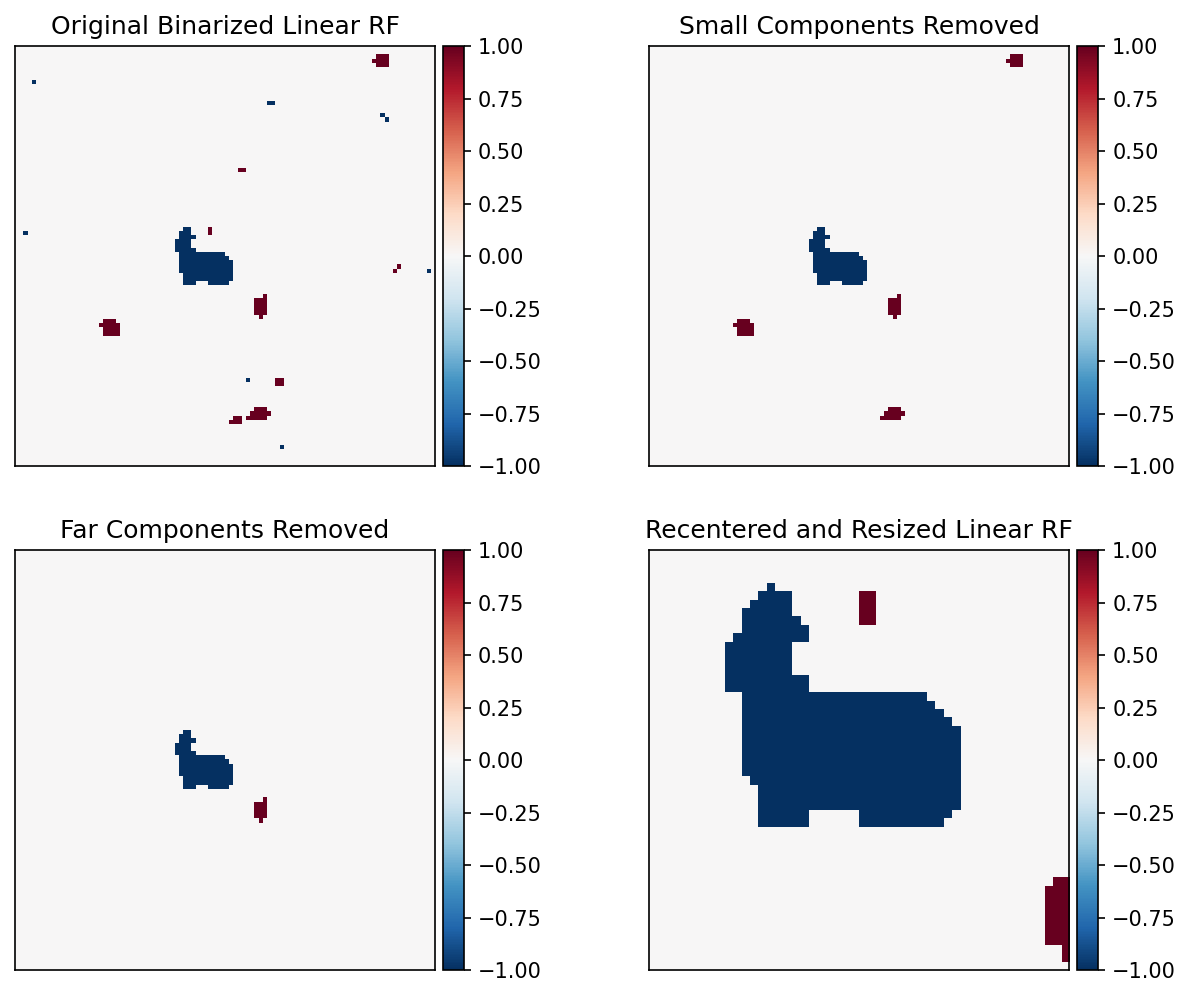

In [7]:
i = 0#15

fig,axs = plt.subplots(2,2,figsize=(10,8),dpi=150)

on_img = (naive_mat['RF'][0,i] > 2.5).astype(int)
of_img = (naive_mat['RF'][0,i] <-2.5).astype(int)

n = on_img.shape[0]
l = 100/n
a = l**2

pf.imshowbar(fig,axs[0,0],on_img-of_img,cmap='RdBu_r',vmin=-1,vmax=1)

on_img = rfaf.binary_rm_sml(on_img,a,8)
of_img = rfaf.binary_rm_sml(of_img,a,8)

pf.imshowbar(fig,axs[0,1],on_img-of_img,cmap='RdBu_r',vmin=-1,vmax=1)
pf.imshowbar(fig,axs[1,0],rfaf.binary_rm_far(on_img,l,22.5)-rfaf.binary_rm_far(of_img,l,22.5),
             cmap='RdBu_r',vmin=-1,vmax=1)
pf.imshowbar(fig,axs[1,1],naive_RF_ON[i]-naive_RF_OF[i],cmap='RdBu_r',vmin=-1,vmax=1)

axs[0,0].set_title('Original Binarized Linear RF')
axs[0,1].set_title('Small Components Removed')
axs[1,0].set_title('Far Components Removed')
axs[1,1].set_title('Recentered and Resized Linear RF')

Text(0.5, 1.0, 'Fit Ellipses to Total On/Off')

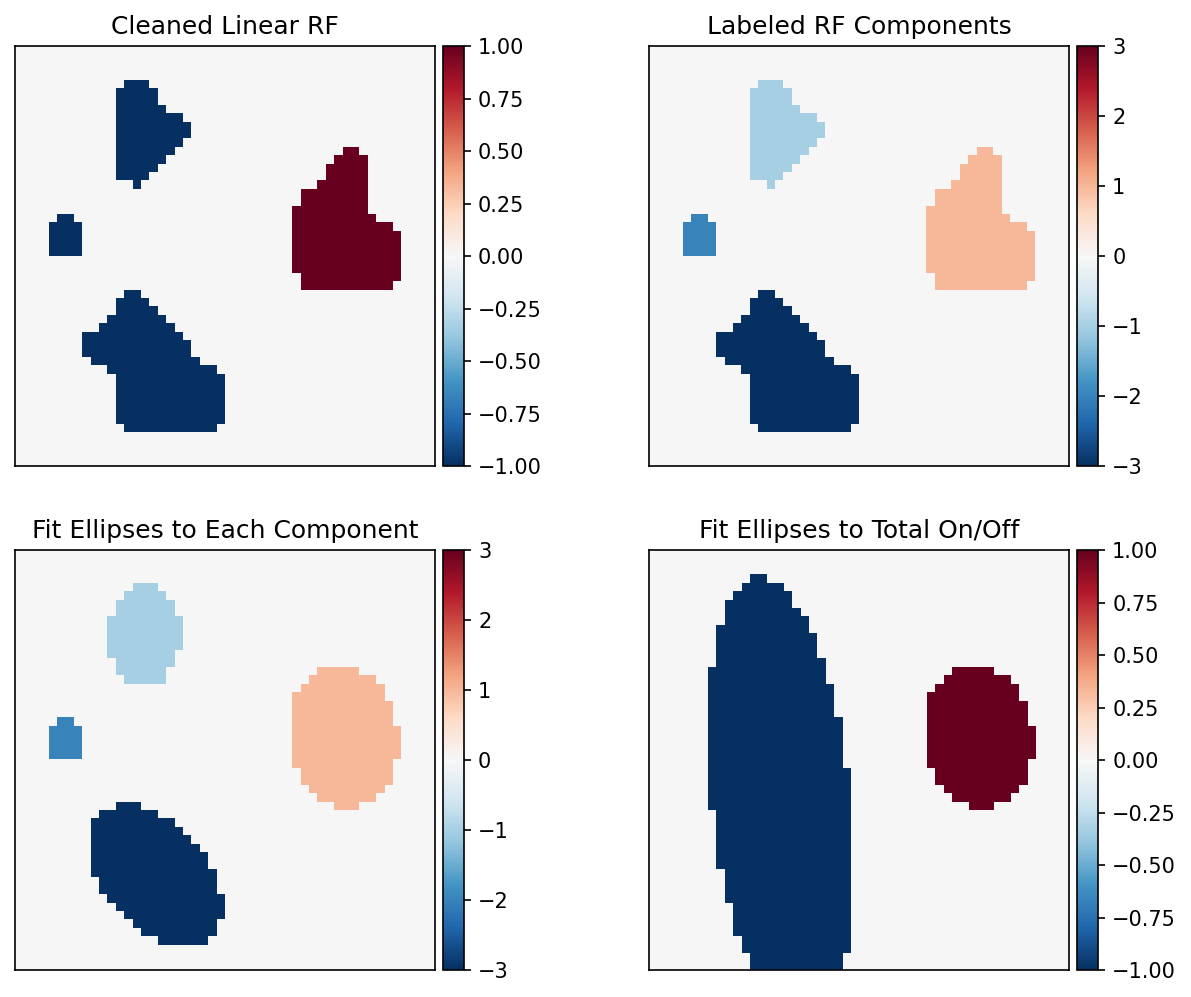

In [8]:
i = 15

fig,axs = plt.subplots(2,2,figsize=(10,8),dpi=150)

pf.imshowbar(fig,axs[0,0],naive_RF_ON[i]-naive_RF_OF[i],cmap='RdBu_r',vmin=-1,vmax=1)

labeled_on,num_on = label(naive_RF_ON[i])
labeled_of,num_of = label(naive_RF_OF[i])

pf.imshowbar(fig,axs[0,1],labeled_on-labeled_of,cmap='RdBu_r',vmin=-np.fmax(num_on,num_of),vmax=np.fmax(num_on,num_of))

ellipse_on = rfaf.ellipse_feats_from_labeled(labeled_on)
ellipse_of = rfaf.ellipse_feats_from_labeled(labeled_of)

pf.imshowbar(fig,axs[1,0],ellipse_on-ellipse_of,cmap='RdBu_r',vmin=-np.fmax(num_on,num_of),vmax=np.fmax(num_on,num_of))

labeled_on,num_on = naive_RF_ON[i],1
labeled_of,num_of = naive_RF_OF[i],1

ellipse_on = rfaf.ellipse_feats_from_labeled(labeled_on)
ellipse_of = rfaf.ellipse_feats_from_labeled(labeled_of)

pf.imshowbar(fig,axs[1,1],ellipse_on-ellipse_of,cmap='RdBu_r',vmin=-np.fmax(num_on,num_of),vmax=np.fmax(num_on,num_of))

axs[0,0].set_title('Cleaned Linear RF')
axs[0,1].set_title('Labeled RF Components')
axs[1,0].set_title('Fit Ellipses to Each Component')
axs[1,1].set_title('Fit Ellipses to Total On/Off')

In [6]:
naive_sepr = np.zeros(Nnaive)
naive_bias = np.zeros(Nnaive)
naive_oncrc = np.zeros(Nnaive)
naive_ofcrc = np.zeros(Nnaive)
naive_crc = np.zeros(Nnaive)
naive_dist = np.zeros(Nnaive)
naive_onar = np.zeros(Nnaive)
naive_ofar = np.zeros(Nnaive)
naive_totar = np.zeros(Nnaive)
naive_rfln = np.zeros(Nnaive)
exper_sepr = np.zeros(Nexper)
exper_bias = np.zeros(Nexper)
exper_oncrc = np.zeros(Nexper)
exper_ofcrc = np.zeros(Nexper)
exper_crc = np.zeros(Nexper)
exper_dist = np.zeros(Nexper)
exper_onar = np.zeros(Nexper)
exper_ofar = np.zeros(Nexper)
exper_totar = np.zeros(Nexper)
exper_rfln = np.zeros(Nexper)

for i in range(Nnaive):
    naive_sepr[i] = 1-np.abs((naive_ON_Rsp[i]+naive_OF_Rsp[i])==2).sum((-2,-1)) /\
        np.fmin(naive_ON_Rsp[i].sum((-2,-1)),naive_OF_Rsp[i].sum((-2,-1)))
    # if np.isnan(naive_sepr[i]): naive_sepr[i] = 1
    # naive_sepr[i] = np.abs((naive_ON_Rsp[i]-naive_OF_Rsp[i])).sum((-2,-1)) /\
    #     (naive_ON_Rsp[i]+naive_OF_Rsp[i]).sum((-2,-1))
    naive_bias[i] = np.abs((naive_ON_Rsp[i]-naive_OF_Rsp[i]).sum((-2,-1))) /\
        (naive_ON_Rsp[i]+naive_OF_Rsp[i]).sum((-2,-1))
    if np.sum(naive_ON_Rsp[i])*0.25 > 15:
        props = regionprops(naive_ON_Rsp[i])[0]
        naive_oncrc[i] = props['axis_minor_length']/props['axis_major_length']
        on_cent = props['centroid']
    else:
        naive_oncrc[i] = np.nan
        on_cent = [np.nan,np.nan]
    if np.sum(naive_OF_Rsp[i])*0.25 > 15:
        props = regionprops(naive_OF_Rsp[i])[0]
        naive_ofcrc[i] = props['axis_minor_length']/props['axis_major_length']
        of_cent = props['centroid']
    else:
        naive_ofcrc[i] = np.nan
        of_cent = [np.nan,np.nan]
    naive_crc[i] = np.nanmean([naive_oncrc[i],naive_ofcrc[i]])
    naive_dist[i] = np.sqrt((on_cent[0]-of_cent[0])**2+(on_cent[1]-of_cent[1])**2)*0.5
    naive_onar[i] = naive_ON_Rsp[i].sum((-2,-1))*0.25
    naive_ofar[i] = naive_OF_Rsp[i].sum((-2,-1))*0.25
    xs,ys = np.meshgrid(np.arange(naive_ON_Rsp[i].shape[0]),np.arange(naive_ON_Rsp[i].shape[0]))
    xs = xs[np.fmin(1,naive_ON_Rsp[i]+naive_OF_Rsp[i])==1]
    ys = ys[np.fmin(1,naive_ON_Rsp[i]+naive_OF_Rsp[i])==1]
    naive_rfln[i] = 0.5*((np.max(xs)-np.min(xs))+(np.max(ys)-np.min(ys)))*0.5

for i in range(Nexper):
    exper_sepr[i] = 1-np.abs((exper_ON_Rsp[i]+exper_OF_Rsp[i])==2).sum((-2,-1)) /\
        np.fmin(exper_ON_Rsp[i].sum((-2,-1)),exper_OF_Rsp[i].sum((-2,-1)))
    # if np.isnan(exper_sepr[i]): exper_sepr[i] = 1
    # exper_sepr[i] = np.abs((exper_ON_Rsp[i]-exper_OF_Rsp[i])).sum((-2,-1)) /\
    #     (exper_ON_Rsp[i]+exper_OF_Rsp[i]).sum((-2,-1))
    exper_bias[i] = np.abs((exper_ON_Rsp[i]-exper_OF_Rsp[i]).sum((-2,-1))) /\
        (exper_ON_Rsp[i]+exper_OF_Rsp[i]).sum((-2,-1))
    if np.sum(exper_ON_Rsp[i])*0.25 > 15:
        props = regionprops(exper_ON_Rsp[i])[0]
        exper_oncrc[i] = props['axis_minor_length']/props['axis_major_length']
        on_cent = props['centroid']
    else:
        exper_oncrc[i] = np.nan
        on_cent = [np.nan,np.nan]
    if np.sum(exper_OF_Rsp[i])*0.25 > 15:
        props = regionprops(exper_OF_Rsp[i])[0]
        exper_ofcrc[i] = props['axis_minor_length']/props['axis_major_length']
        of_cent = props['centroid']
    else:
        exper_ofcrc[i] = np.nan
        of_cent = [np.nan,np.nan]
    exper_crc[i] = np.nanmean([exper_oncrc[i],exper_ofcrc[i]])
    exper_dist[i] = np.sqrt((on_cent[0]-of_cent[0])**2+(on_cent[1]-of_cent[1])**2)*0.5
    exper_onar[i] = exper_ON_Rsp[i].sum((-2,-1))*0.25
    exper_ofar[i] = exper_OF_Rsp[i].sum((-2,-1))*0.25
    xs,ys = np.meshgrid(np.arange(exper_ON_Rsp[i].shape[0]),np.arange(exper_ON_Rsp[i].shape[0]))
    xs = xs[np.fmin(1,exper_ON_Rsp[i]+exper_OF_Rsp[i])==1]
    ys = ys[np.fmin(1,exper_ON_Rsp[i]+exper_OF_Rsp[i])==1]
    exper_rfln[i] = 0.5*((np.max(xs)-np.min(xs))+(np.max(ys)-np.min(ys)))*0.5
    
naive_on_and_off = np.logical_not(np.isnan(naive_sepr))
exper_on_and_off = np.logical_not(np.isnan(exper_sepr))

naive_totar = naive_onar + naive_ofar
exper_totar = exper_onar + exper_ofar
naive_bigar = np.where(naive_onar>naive_ofar,naive_onar,naive_ofar)
exper_bigar = np.where(exper_onar>exper_ofar,exper_onar,exper_ofar)
naive_bigcrc = np.where(naive_onar>naive_ofar,naive_oncrc,naive_ofcrc)
exper_bigcrc = np.where(exper_onar>exper_ofar,exper_oncrc,exper_ofcrc)

naive_bigfl = np.sqrt(naive_bigar*(1-naive_bigcrc**2)/naive_bigcrc)
exper_bigfl = np.sqrt(exper_bigar*(1-exper_bigcrc**2)/exper_bigcrc)

/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_28667/3865263159.py:23: RuntimeWarning: invalid value encountered in scalar divide
  naive_sepr[i] = 1-np.abs((naive_ON_Rsp[i]+naive_OF_Rsp[i])==2).sum((-2,-1)) /\
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_28667/3865263159.py:54: RuntimeWarning: invalid value encountered in scalar divide
  exper_sepr[i] = 1-np.abs((exper_ON_Rsp[i]+exper_OF_Rsp[i])==2).sum((-2,-1)) /\


Text(0, 0.5, 'Count')

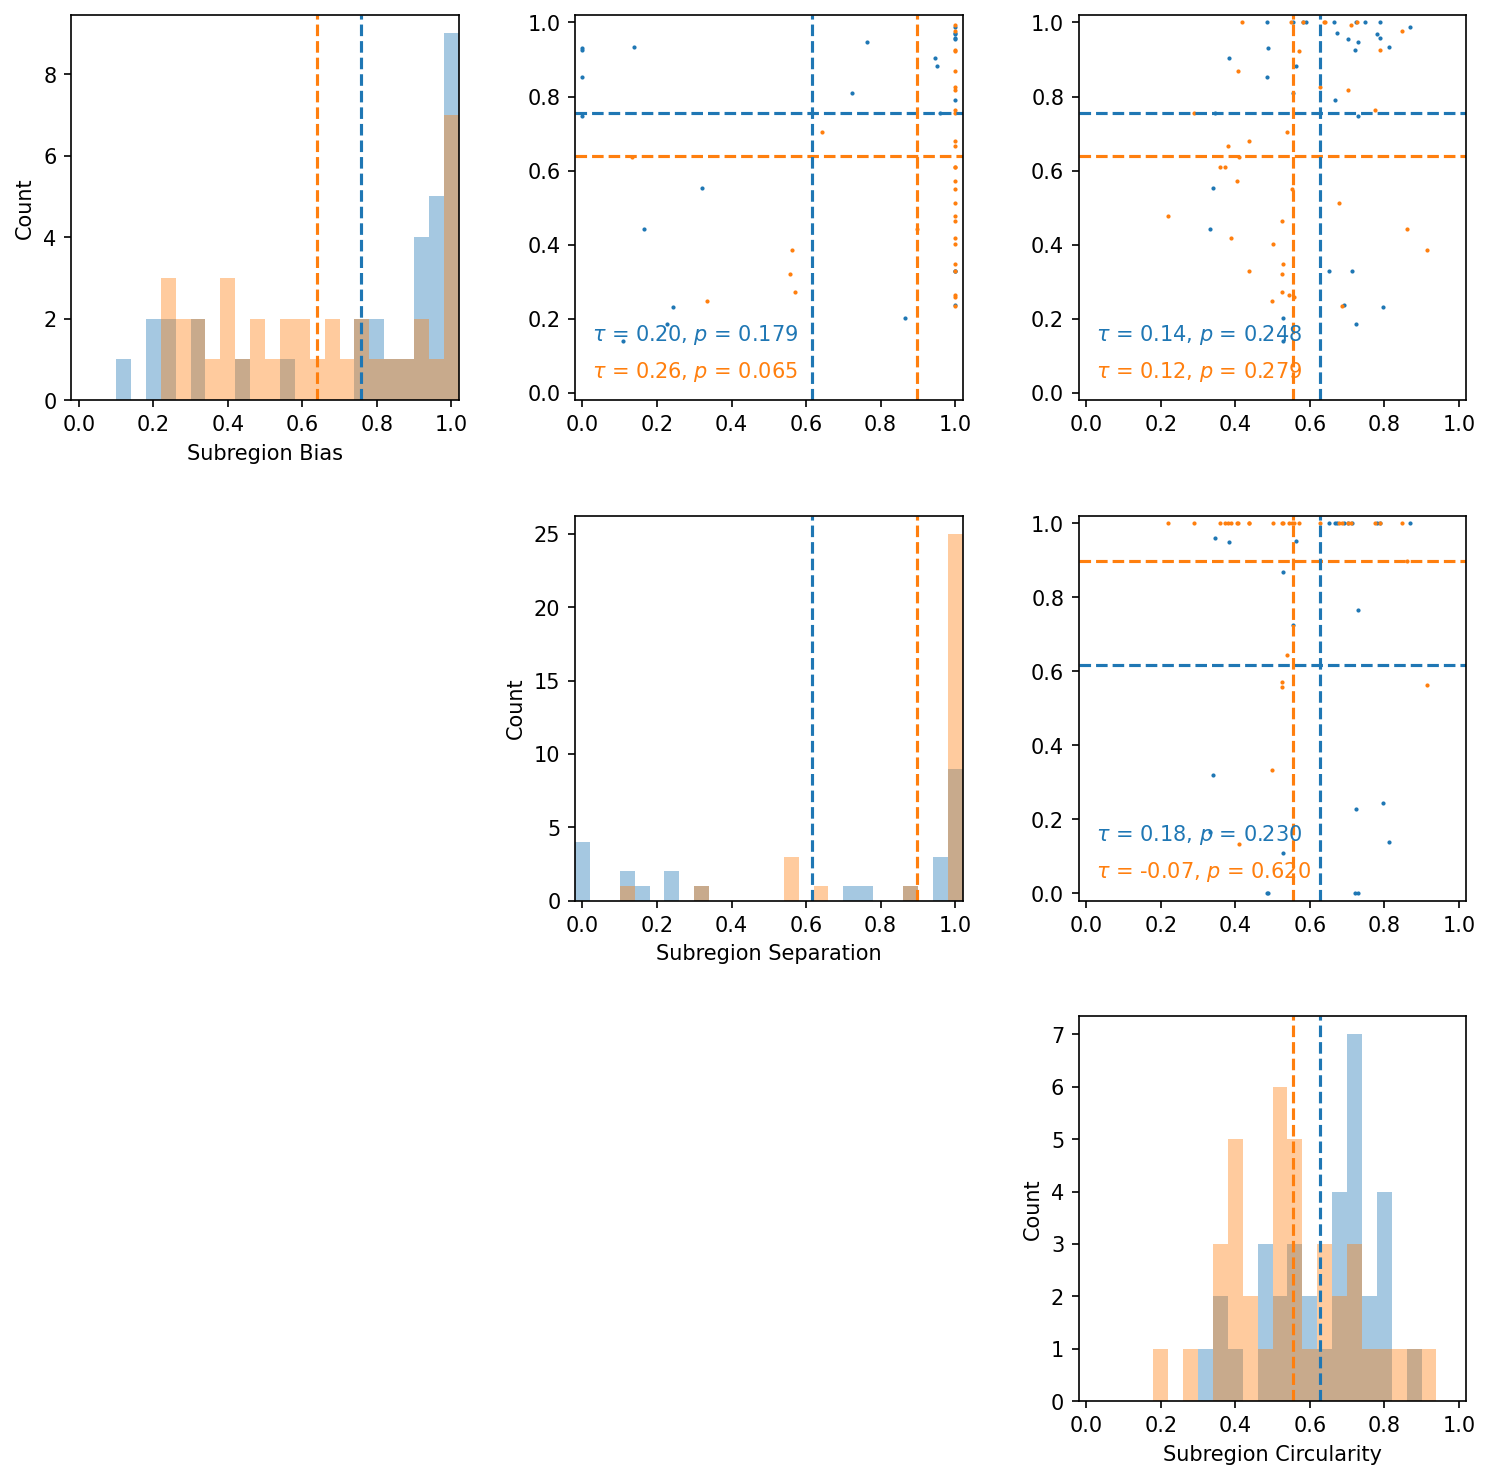

In [10]:
nbins = 25

fig,axs = plt.subplots(3,3,figsize=(12,12),dpi=150)
fig.subplots_adjust(wspace=0.3,hspace=0.3)

axs[1,0].set_axis_off()
axs[2,0].set_axis_off()
axs[2,1].set_axis_off()

axs[0,0].hist(naive_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[0,0].hist(exper_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(naive_sepr,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(exper_sepr,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[2,2].hist(naive_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[2,2].hist(exper_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[0,1].scatter(naive_sepr,naive_bias,s=1)
axs[0,1].scatter(exper_sepr,exper_bias,s=1)
axs[0,2].scatter(naive_crc,naive_bias,s=1)
axs[0,2].scatter(exper_crc,exper_bias,s=1)
axs[1,2].scatter(naive_crc,naive_sepr,s=1)
axs[1,2].scatter(exper_crc,exper_sepr,s=1)

axs[0,0].axvline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0,0].axvline(np.nanmean(exper_bias),c='C1',ls='--')
axs[1,1].axvline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[1,1].axvline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[2,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
axs[2,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')
axs[0,1].axhline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0,1].axhline(np.nanmean(exper_bias),c='C1',ls='--')
axs[0,1].axvline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[0,1].axvline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[0,2].axhline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0,2].axhline(np.nanmean(exper_bias),c='C1',ls='--')
axs[0,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
axs[0,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')
axs[1,2].axhline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[1,2].axhline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[1,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
axs[1,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')

taustat = kendalltau(naive_sepr[naive_on_and_off],naive_bias[naive_on_and_off])
axs[0,1].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_sepr[exper_on_and_off],exper_bias[exper_on_and_off])
axs[0,1].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_crc,naive_bias)
axs[0,2].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_crc,exper_bias)
axs[0,2].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_sepr[naive_on_and_off],naive_crc[naive_on_and_off])
axs[1,2].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_sepr[exper_on_and_off],exper_crc[exper_on_and_off])
axs[1,2].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

axs[0,0].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[2,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,2].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[1,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,2].set_ylim(-1/(2*nbins),1+1/(2*nbins))

axs[0,0].set_xlabel('Subregion Bias')
axs[0,0].set_ylabel('Count')
axs[1,1].set_xlabel('Subregion Separation')
axs[1,1].set_ylabel('Count')
axs[2,2].set_xlabel('Subregion Circularity')
axs[2,2].set_ylabel('Count')

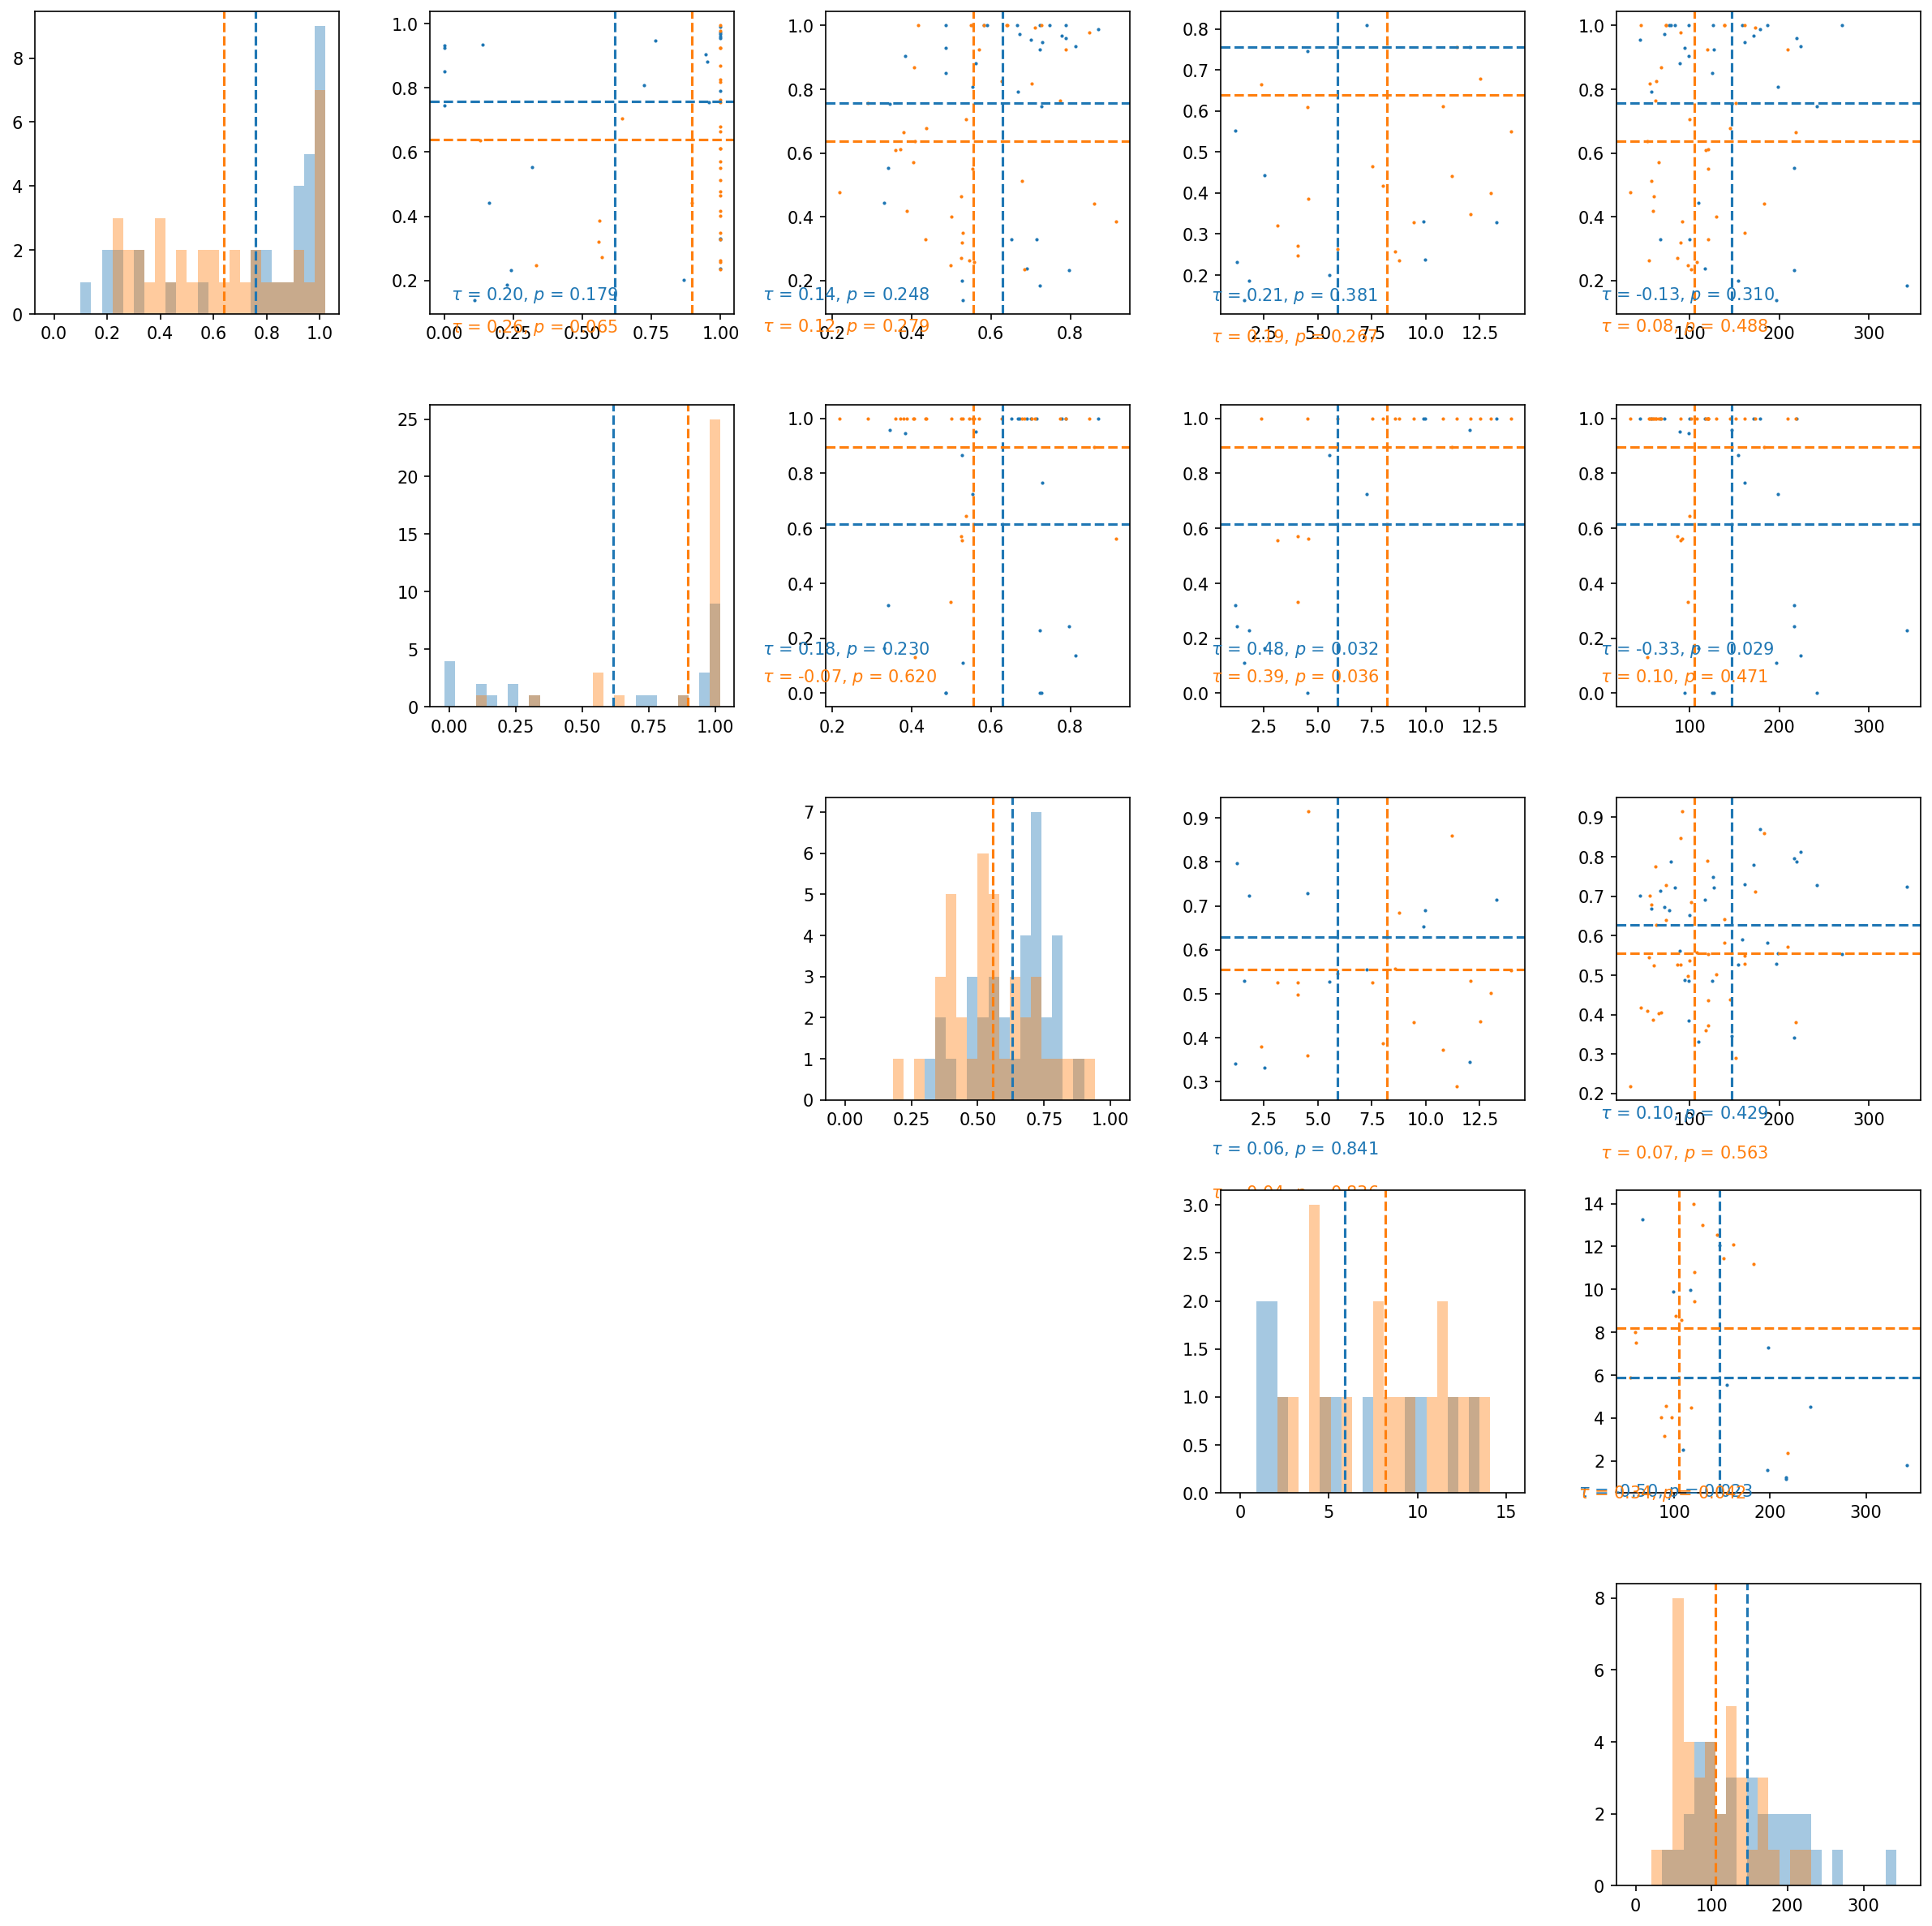

In [90]:
nbins = 25

fig,axs = plt.subplots(5,5,figsize=(20,20),dpi=150)
fig.subplots_adjust(wspace=0.3,hspace=0.3)

naive_data = np.concatenate((naive_bias[None,:],naive_sepr[None,:],naive_crc[None,:],
                             naive_dist[None,:],(naive_onar+naive_ofar)[None,:]),0)
exper_data = np.concatenate((exper_bias[None,:],exper_sepr[None,:],exper_crc[None,:],
                             exper_dist[None,:],(exper_onar+exper_ofar)[None,:]),0)
data_max = np.array([1,1,1,15,350])

for i in range(5):
    for j in range(5):
        if i > j:
            axs[i,j].set_axis_off()
        elif i==j:
            axs[i,j].hist(naive_data[i],
                np.linspace(-data_max[i]/(2*nbins),data_max[i]+data_max[i]/(2*nbins),2+nbins),
                alpha=0.4,histtype='stepfilled')
            axs[i,j].hist(exper_data[i],
                np.linspace(-data_max[i]/(2*nbins),data_max[i]+data_max[i]/(2*nbins),2+nbins),
                alpha=0.4,histtype='stepfilled')
            
            axs[i,j].axvline(np.nanmean(naive_data[i]),c='C0',ls='--')
            axs[i,j].axvline(np.nanmean(exper_data[i]),c='C1',ls='--')
        else:
            axs[i,j].scatter(naive_data[j],naive_data[i],s=1)
            axs[i,j].scatter(exper_data[j],exper_data[i],s=1)
            
            if i==3 or j==3:
                taustat = kendalltau(naive_data[j][np.logical_not(np.isnan(naive_data[3]))],naive_data[i][np.logical_not(np.isnan(naive_data[3]))])
                axs[i,j].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
                            color='C0',ha='left',va='bottom')
                taustat = kendalltau(exper_data[j][np.logical_not(np.isnan(exper_data[3]))],exper_data[i][np.logical_not(np.isnan(exper_data[3]))])
                axs[i,j].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
                            color='C1',ha='left',va='bottom')
            elif i==1 or j==1:
                taustat = kendalltau(naive_data[j][naive_on_and_off],naive_data[i][naive_on_and_off])
                axs[i,j].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
                            color='C0',ha='left',va='bottom')
                taustat = kendalltau(exper_data[j][exper_on_and_off],exper_data[i][exper_on_and_off])
                axs[i,j].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
                            color='C1',ha='left',va='bottom')
            else:
                taustat = kendalltau(naive_data[j],naive_data[i])
                axs[i,j].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
                            color='C0',ha='left',va='bottom')
                taustat = kendalltau(exper_data[j],exper_data[i])
                axs[i,j].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
                            color='C1',ha='left',va='bottom')
            
            axs[i,j].axvline(np.nanmean(naive_data[j]),c='C0',ls='--')
            axs[i,j].axvline(np.nanmean(exper_data[j]),c='C1',ls='--')
            axs[i,j].axhline(np.nanmean(naive_data[i]),c='C0',ls='--')
            axs[i,j].axhline(np.nanmean(exper_data[i]),c='C1',ls='--')

# axs[0,0].hist(naive_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
# axs[0,0].hist(exper_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
# axs[1,1].hist(naive_sepr,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
# axs[1,1].hist(exper_sepr,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
# axs[2,2].hist(naive_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
# axs[2,2].hist(exper_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
# axs[0,1].scatter(naive_sepr,naive_bias,s=1)
# axs[0,1].scatter(exper_sepr,exper_bias,s=1)
# axs[0,2].scatter(naive_crc,naive_bias,s=1)
# axs[0,2].scatter(exper_crc,exper_bias,s=1)
# axs[1,2].scatter(naive_crc,naive_sepr,s=1)
# axs[1,2].scatter(exper_crc,exper_sepr,s=1)

# axs[0,0].axvline(np.nanmean(naive_bias),c='C0',ls='--')
# axs[0,0].axvline(np.nanmean(exper_bias),c='C1',ls='--')
# axs[1,1].axvline(np.nanmean(naive_sepr),c='C0',ls='--')
# axs[1,1].axvline(np.nanmean(exper_sepr),c='C1',ls='--')
# axs[2,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
# axs[2,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')
# axs[0,1].axhline(np.nanmean(naive_bias),c='C0',ls='--')
# axs[0,1].axhline(np.nanmean(exper_bias),c='C1',ls='--')
# axs[0,1].axvline(np.nanmean(naive_sepr),c='C0',ls='--')
# axs[0,1].axvline(np.nanmean(exper_sepr),c='C1',ls='--')
# axs[0,2].axhline(np.nanmean(naive_bias),c='C0',ls='--')
# axs[0,2].axhline(np.nanmean(exper_bias),c='C1',ls='--')
# axs[0,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
# axs[0,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')
# axs[1,2].axhline(np.nanmean(naive_sepr),c='C0',ls='--')
# axs[1,2].axhline(np.nanmean(exper_sepr),c='C1',ls='--')
# axs[1,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
# axs[1,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')

# taustat = kendalltau(naive_sepr[naive_on_and_off],naive_bias[naive_on_and_off])
# axs[0,1].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
#               color='C0',ha='left',va='bottom')
# taustat = kendalltau(exper_sepr[exper_on_and_off],exper_bias[exper_on_and_off])
# axs[0,1].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
#               color='C1',ha='left',va='bottom')

# taustat = kendalltau(naive_crc,naive_bias)
# axs[0,2].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
#               color='C0',ha='left',va='bottom')
# taustat = kendalltau(exper_crc,exper_bias)
# axs[0,2].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
#               color='C1',ha='left',va='bottom')

# taustat = kendalltau(naive_sepr[naive_on_and_off],naive_crc[naive_on_and_off])
# axs[1,2].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
#               color='C0',ha='left',va='bottom')
# taustat = kendalltau(exper_sepr[exper_on_and_off],exper_crc[exper_on_and_off])
# axs[1,2].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
#               color='C1',ha='left',va='bottom')

# axs[0,0].set_xlim(-1/(2*nbins),1+1/(2*nbins))
# axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
# axs[2,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
# axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
# axs[0,1].set_ylim(-1/(2*nbins),1+1/(2*nbins))
# axs[0,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
# axs[0,2].set_ylim(-1/(2*nbins),1+1/(2*nbins))
# axs[1,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
# axs[1,2].set_ylim(-1/(2*nbins),1+1/(2*nbins))

# axs[0,0].set_xlabel('Subregion Bias')
# axs[0,0].set_ylabel('Count')
# axs[1,1].set_xlabel('Subregion Separation')
# axs[1,1].set_ylabel('Count')
# axs[2,2].set_xlabel('Subregion Circularity')
# axs[2,2].set_ylabel('Count')

In [88]:
naive_data[3][]

array([ 1.80576587,         nan,         nan,         nan,         nan,
               nan,  5.54143095,  1.58158159,         nan,         nan,
               nan,  7.2766225 ,         nan,  1.24096035,         nan,
        9.87818052, 13.2756363 ,  9.97002436, 12.04845026,         nan,
               nan,         nan,         nan,         nan,  2.51694944,
               nan,         nan,  1.14905202,  4.50601303,         nan,
               nan,         nan,         nan])

Text(0, 0.5, 'CDF')

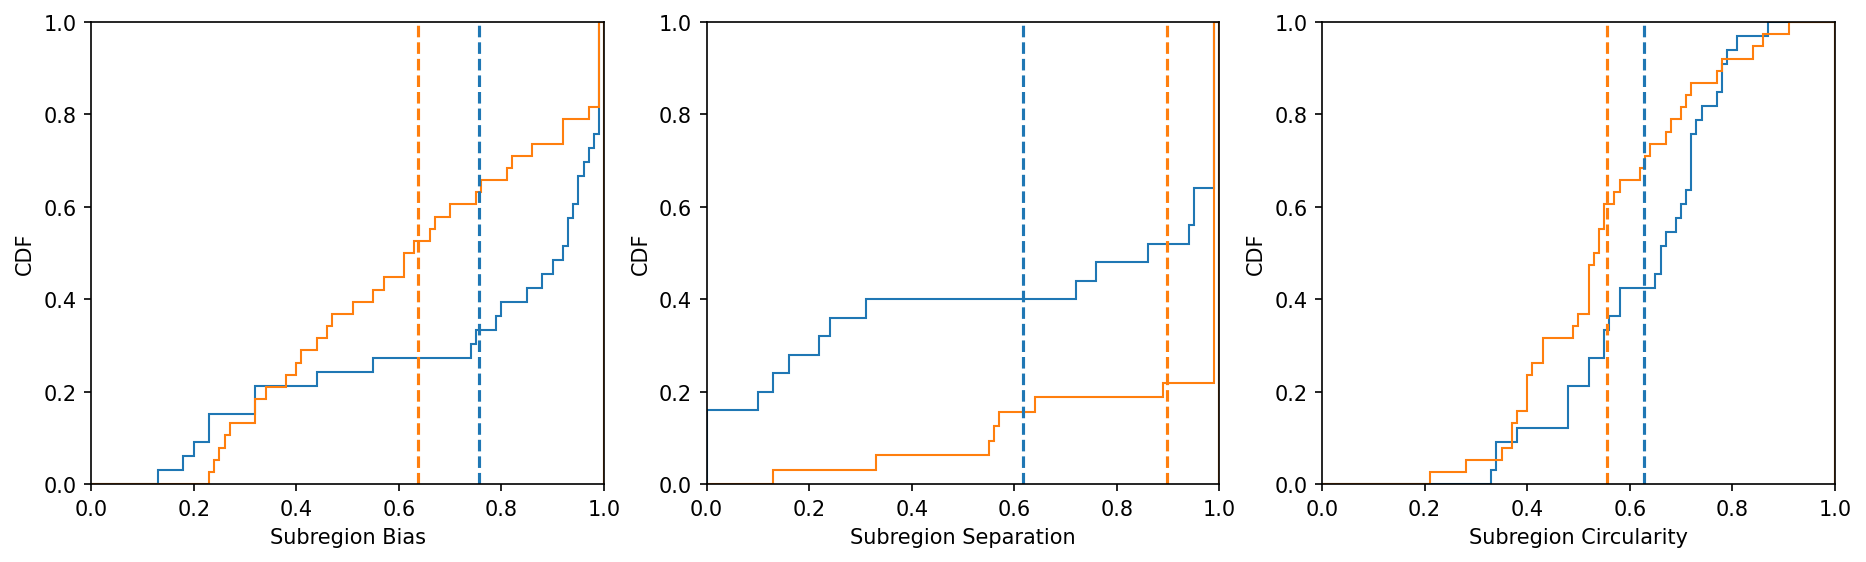

In [66]:
fig,axs = plt.subplots(1,3,figsize=(15,4),dpi=150)

axs[0].hist(naive_bias,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[0].hist(exper_bias,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[1].hist(naive_sepr,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[1].hist(exper_sepr,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[2].hist(naive_crc,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[2].hist(exper_crc,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')

axs[0].axvline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0].axvline(np.nanmean(exper_bias),c='C1',ls='--')
axs[1].axvline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[1].axvline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
axs[2].axvline(np.nanmean(exper_crc),c='C1',ls='--')

axs[0].set_xlim(0,1)
axs[0].set_ylim(0,1)
axs[1].set_xlim(0,1)
axs[1].set_ylim(0,1)
axs[2].set_xlim(0,1)
axs[2].set_ylim(0,1)

axs[0].set_xlabel('Subregion Bias')
axs[1].set_xlabel('Subregion Separation')
axs[2].set_xlabel('Subregion Circularity')
axs[0].set_ylabel('CDF')
axs[1].set_ylabel('CDF')
axs[2].set_ylabel('CDF')

Text(0, 0.5, 'CDF')

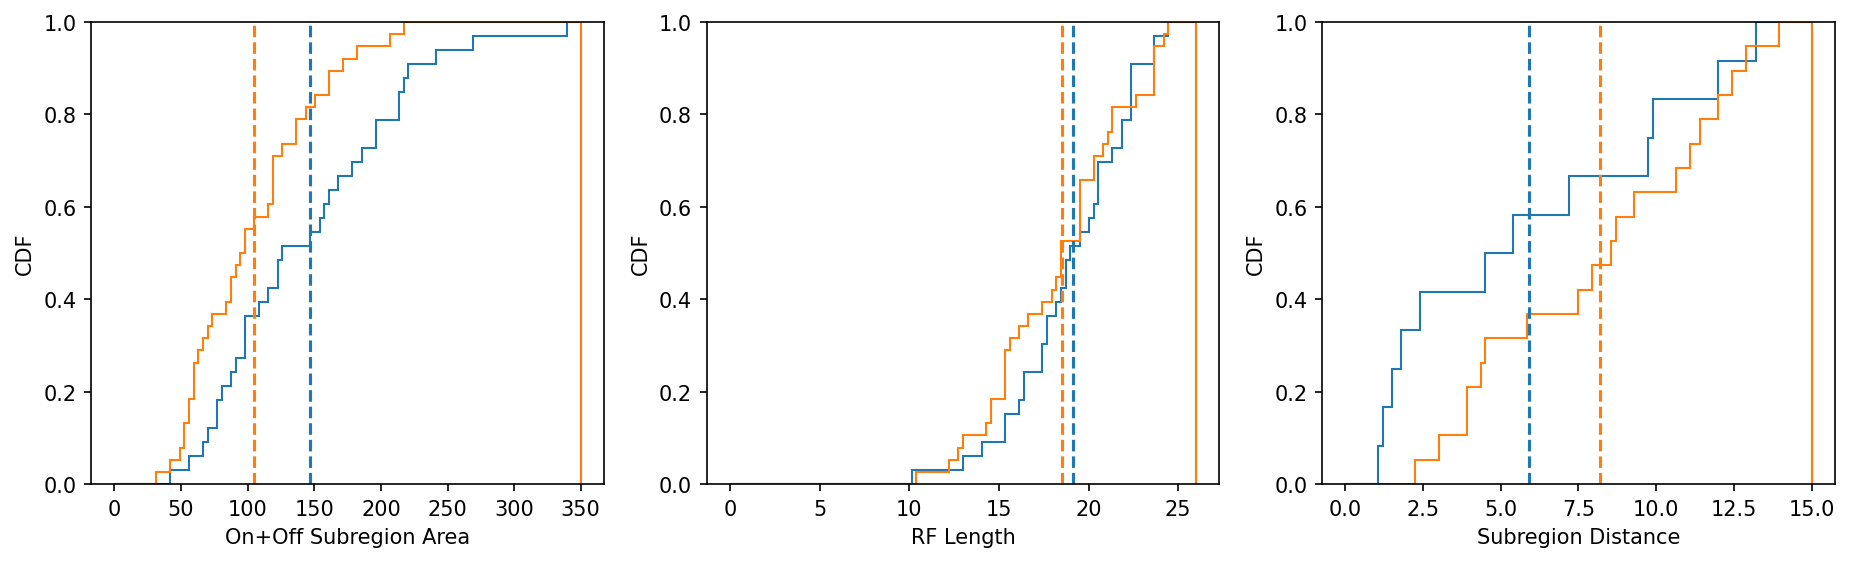

In [44]:
fig,axs = plt.subplots(1,3,figsize=(15,4),dpi=150)

# axs[0].hist(np.concatenate((naive_onar,naive_ofar)),np.linspace(0,150,101),density=True,cumulative=True,histtype='step')
# axs[0].hist(np.concatenate((exper_onar,exper_ofar)),np.linspace(0,150,101),density=True,cumulative=True,histtype='step')
axs[0].hist(naive_totar,np.linspace(0,350,101),density=True,cumulative=True,histtype='step')
axs[0].hist(exper_totar,np.linspace(0,350,101),density=True,cumulative=True,histtype='step')
axs[1].hist(naive_rfln,np.linspace(0,26,101),density=True,cumulative=True,histtype='step')
axs[1].hist(exper_rfln,np.linspace(0,26,101),density=True,cumulative=True,histtype='step')
axs[2].hist(naive_dist,np.linspace(0,15,101),density=True,cumulative=True,histtype='step')
axs[2].hist(exper_dist,np.linspace(0,15,101),density=True,cumulative=True,histtype='step')

axs[0].axvline(np.nanmean(naive_totar),c='C0',ls='--')
axs[0].axvline(np.nanmean(exper_totar),c='C1',ls='--')
axs[1].axvline(np.nanmean(naive_rfln),c='C0',ls='--')
axs[1].axvline(np.nanmean(exper_rfln),c='C1',ls='--')
axs[2].axvline(np.nanmean(naive_dist),c='C0',ls='--')
axs[2].axvline(np.nanmean(exper_dist),c='C1',ls='--')

axs[0].set_ylim(0,1)
axs[1].set_ylim(0,1)
axs[2].set_ylim(0,1)

axs[0].set_xlabel('On+Off Subregion Area')
axs[1].set_xlabel('RF Length')
axs[2].set_xlabel('Subregion Distance')
axs[0].set_ylabel('CDF')
axs[1].set_ylabel('CDF')
axs[2].set_ylabel('CDF')

Text(0, 0.5, 'CDF')

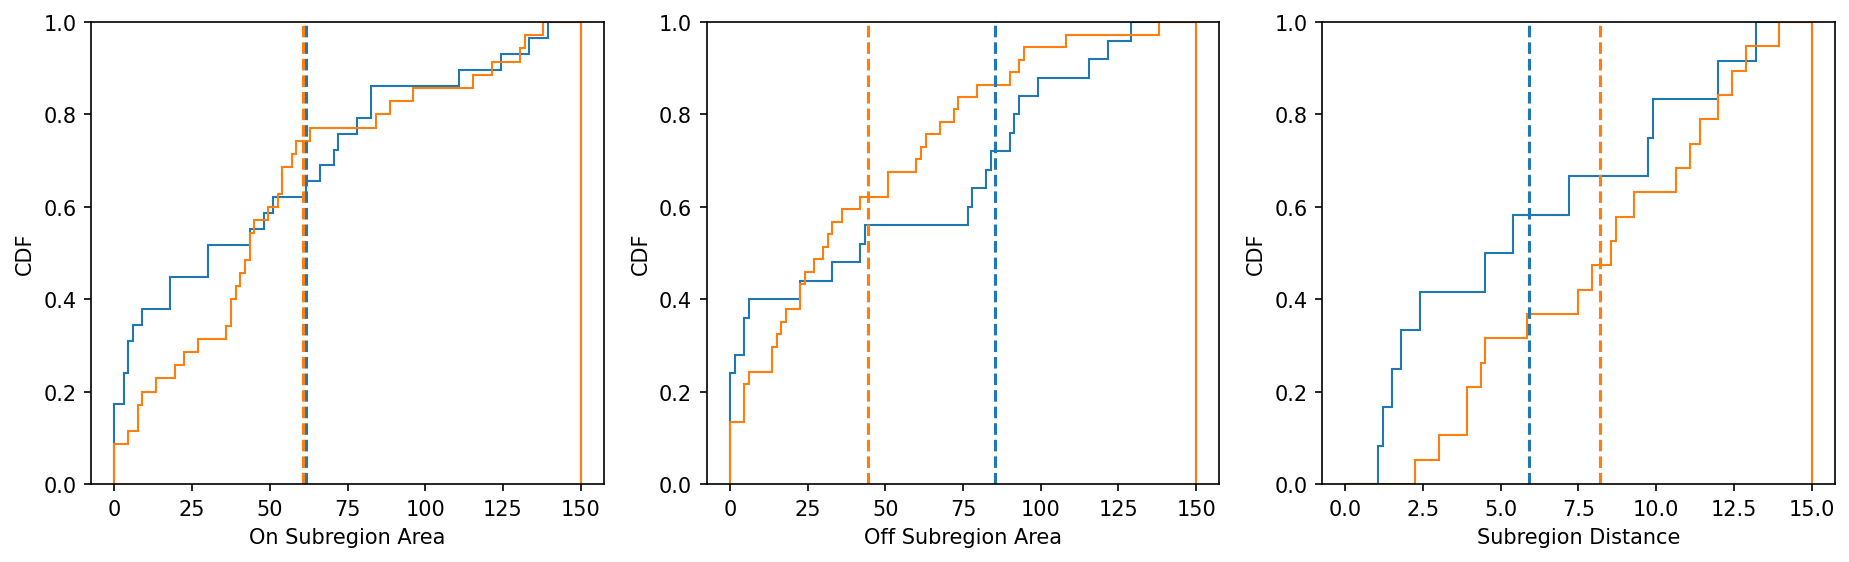

In [10]:
fig,axs = plt.subplots(1,3,figsize=(15,4),dpi=150)

axs[0].hist(naive_onar,np.linspace(0,150,101),density=True,cumulative=True,histtype='step')
axs[0].hist(exper_onar,np.linspace(0,150,101),density=True,cumulative=True,histtype='step')
axs[1].hist(naive_ofar,np.linspace(0,150,101),density=True,cumulative=True,histtype='step')
axs[1].hist(exper_ofar,np.linspace(0,150,101),density=True,cumulative=True,histtype='step')
axs[2].hist(naive_dist,np.linspace(0,15,101),density=True,cumulative=True,histtype='step')
axs[2].hist(exper_dist,np.linspace(0,15,101),density=True,cumulative=True,histtype='step')

axs[0].axvline(np.nanmean(naive_onar),c='C0',ls='--')
axs[0].axvline(np.nanmean(exper_onar),c='C1',ls='--')
axs[1].axvline(np.nanmean(naive_ofar),c='C0',ls='--')
axs[1].axvline(np.nanmean(exper_ofar),c='C1',ls='--')
axs[2].axvline(np.nanmean(naive_dist),c='C0',ls='--')
axs[2].axvline(np.nanmean(exper_dist),c='C1',ls='--')

axs[0].set_ylim(0,1)
axs[1].set_ylim(0,1)
axs[2].set_ylim(0,1)

axs[0].set_xlabel('On Subregion Area')
axs[1].set_xlabel('Off Subregion Area')
axs[2].set_xlabel('Subregion Distance')
axs[0].set_ylabel('CDF')
axs[1].set_ylabel('CDF')
axs[2].set_ylabel('CDF')

In [11]:
from scipy.stats import ks_2samp

print(ks_2samp(naive_onar,naive_ofar))
print(ks_2samp(exper_onar,exper_ofar))

KstestResult(statistic=0.24242424242424243, pvalue=0.28992386608240617, statistic_location=78.75, statistic_sign=1)
KstestResult(statistic=0.2894736842105263, pvalue=0.08259747159908636, statistic_location=36.5, statistic_sign=-1)


In [50]:
print(naive_sepr[naive_oriented_idxs])
print(naive_bias[naive_oriented_idxs])
print()
print(exper_sepr[exper_oriented_idxs])
print(exper_bias[exper_oriented_idxs])

[0.86639676 1.         1.         1.        ]
[0.20064725 0.11111111 0.32835821 0.02549575]



NameError: name 'exper_oriented_idxs' is not defined

In [126]:
naive_RF_ON_frac = np.zeros(Nnaive)
naive_RF_OF_frac = np.zeros(Nnaive)
naive_ON_Rsp_frac = np.zeros(Nnaive)
naive_OF_Rsp_frac = np.zeros(Nnaive)
exper_RF_ON_frac = np.zeros(Nexper)
exper_RF_OF_frac = np.zeros(Nexper)
exper_ON_Rsp_frac = np.zeros(Nexper)
exper_OF_Rsp_frac = np.zeros(Nexper)

for i in range(Nnaive):
    size = naive_mat['RF'][0,i].shape[0]
    naive_RF_ON_frac[i] = np.sum(naive_RF_ON[i]) / size**2
    naive_RF_OF_frac[i] = np.sum(naive_RF_OF[i]) / size**2
    naive_ON_Rsp_frac[i] = np.sum(naive_ON_Rsp[i]) / size**2
    naive_OF_Rsp_frac[i] = np.sum(naive_OF_Rsp[i]) / size**2
    
for i in range(Nexper):
    size = exper_mat['RF'][0,i].shape[0]
    exper_RF_ON_frac[i] = np.sum(exper_RF_ON[i]) / size**2
    exper_RF_OF_frac[i] = np.sum(exper_RF_OF[i]) / size**2
    exper_ON_Rsp_frac[i] = np.sum(exper_ON_Rsp[i]) / size**2
    exper_OF_Rsp_frac[i] = np.sum(exper_OF_Rsp[i]) / size**2

In [127]:
frac_cutoff = 0.001

naive_RF_ON_subrgn = naive_RF_ON_frac > frac_cutoff
naive_RF_OF_subrgn = naive_RF_OF_frac > frac_cutoff
naive_ON_subrgn = naive_ON_Rsp_frac > frac_cutoff
naive_OF_subrgn = naive_OF_Rsp_frac > frac_cutoff
naive_two_subrgn = np.logical_and(naive_ON_subrgn,naive_OF_subrgn)
# naive_oriented = np.logical_and(np.logical_and(naive_RF_ON_subrgn,naive_RF_OF_subrgn),naive_two_subrgn)
naive_oriented = np.logical_and(np.logical_and(naive_sepr>0.75,naive_bias<0.50),naive_two_subrgn)
naive_overlap = np.logical_and(naive_two_subrgn,np.logical_not(naive_oriented))

naive_oriented_idxs = np.argwhere(naive_oriented)[:,0]
naive_overlap_idxs = np.argwhere(naive_overlap)[:,0]

print(naive_oriented_idxs)
print(naive_overlap_idxs)

[ 6 15 16 17]
[ 0  1  4  5  7  8 10 11 12 13 14 18 22 23 24 25 27 28]


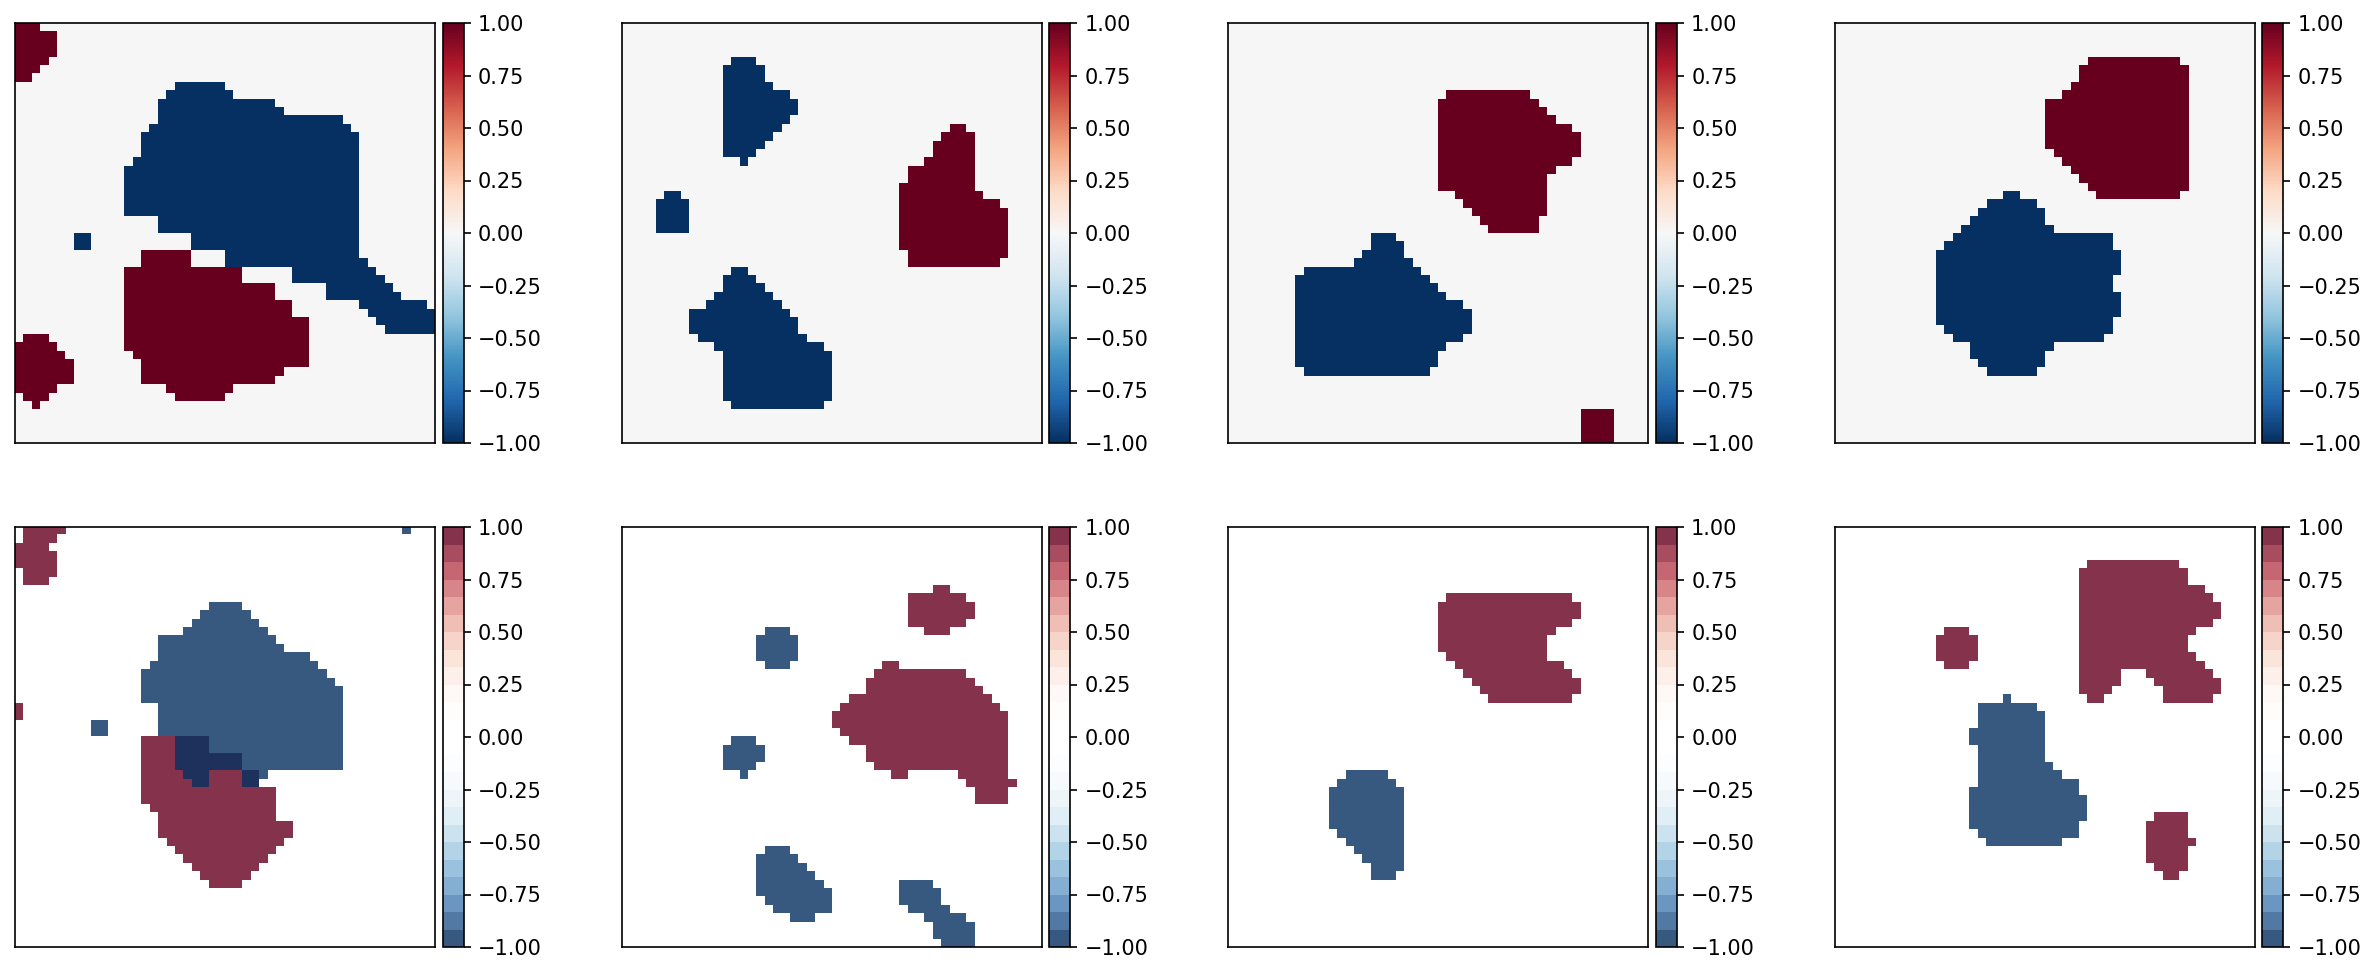

In [128]:
cell_idxs = naive_oriented_idxs

fig,axs = plt.subplots(2,len(cell_idxs),figsize=(5*len(cell_idxs),8),dpi=150)
if axs.ndim==1:
    axs = axs[:,None]

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[0,idx],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.doubimshbar(fig,axs[1,idx],naive_ON_Rsp[cell_idx],-naive_OF_Rsp[cell_idx],vmin=-1,vmax=1)

In [98]:
frac_cutoff = 0.001

exper_RF_ON_subrgn = exper_RF_ON_frac > frac_cutoff
exper_RF_OF_subrgn = exper_RF_OF_frac > frac_cutoff
exper_ON_subrgn = exper_ON_Rsp_frac > frac_cutoff
exper_OF_subrgn = exper_OF_Rsp_frac > frac_cutoff
exper_two_subrgn = np.logical_and(exper_ON_subrgn,exper_OF_subrgn)
# exper_oriented = np.logical_and(np.logical_and(exper_RF_ON_subrgn,exper_RF_OF_subrgn),exper_two_subrgn)
exper_oriented = np.logical_and(exper_sepr>0.75,exper_two_subrgn)
exper_overlap = np.logical_and(exper_two_subrgn,np.logical_not(exper_oriented))

exper_oriented_idxs = np.argwhere(exper_oriented)[:,0]
exper_overlap_idxs = np.argwhere(exper_overlap)[:,0]

print(exper_oriented_idxs)
print(exper_overlap_idxs)

[ 3  4  6  7  8 10 12 13 14 17 20 22 25 26 27 28 29 30 31 32 33 34 35 36]
[ 2  9 15 16 18 21]


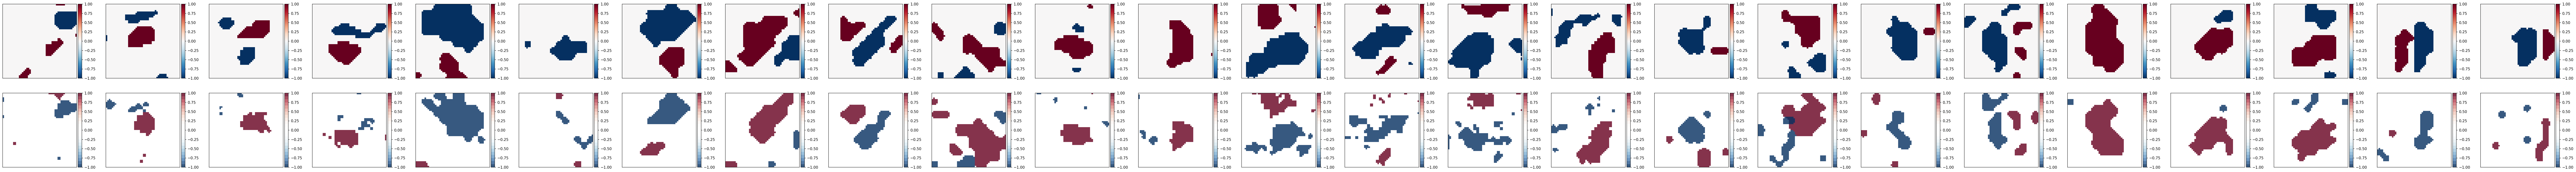

In [70]:
fig,axs = plt.subplots(2,len(exper_oriented_idxs),figsize=(5*len(exper_oriented_idxs),8),dpi=150)
if axs.ndim==1:
    axs = axs[:,None]

cell_idxs = exper_oriented_idxs

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[0,idx],exper_RF_ON[cell_idx] - exper_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.doubimshbar(fig,axs[1,idx],exper_ON_Rsp[cell_idx],-exper_OF_Rsp[cell_idx],vmin=-1,vmax=1)

# Calculate Orientation Selectivities of Raw RFs

In [7]:
noris = 8
nphss = 16

freq = 0.06

grates = np.zeros((noris,nphss,50,50))

xs,ys = np.meshgrid(np.arange(50)*0.5,np.arange(50)*0.5)

for i in range(noris):
    ori = i/noris*np.pi
    for j in range(nphss):
        phs = j/nphss*2*np.pi
        grates[i,j] = np.heaviside(np.cos(phs+2*np.pi*freq*(np.cos(ori)*xs+np.sin(ori)*ys)),0.5)

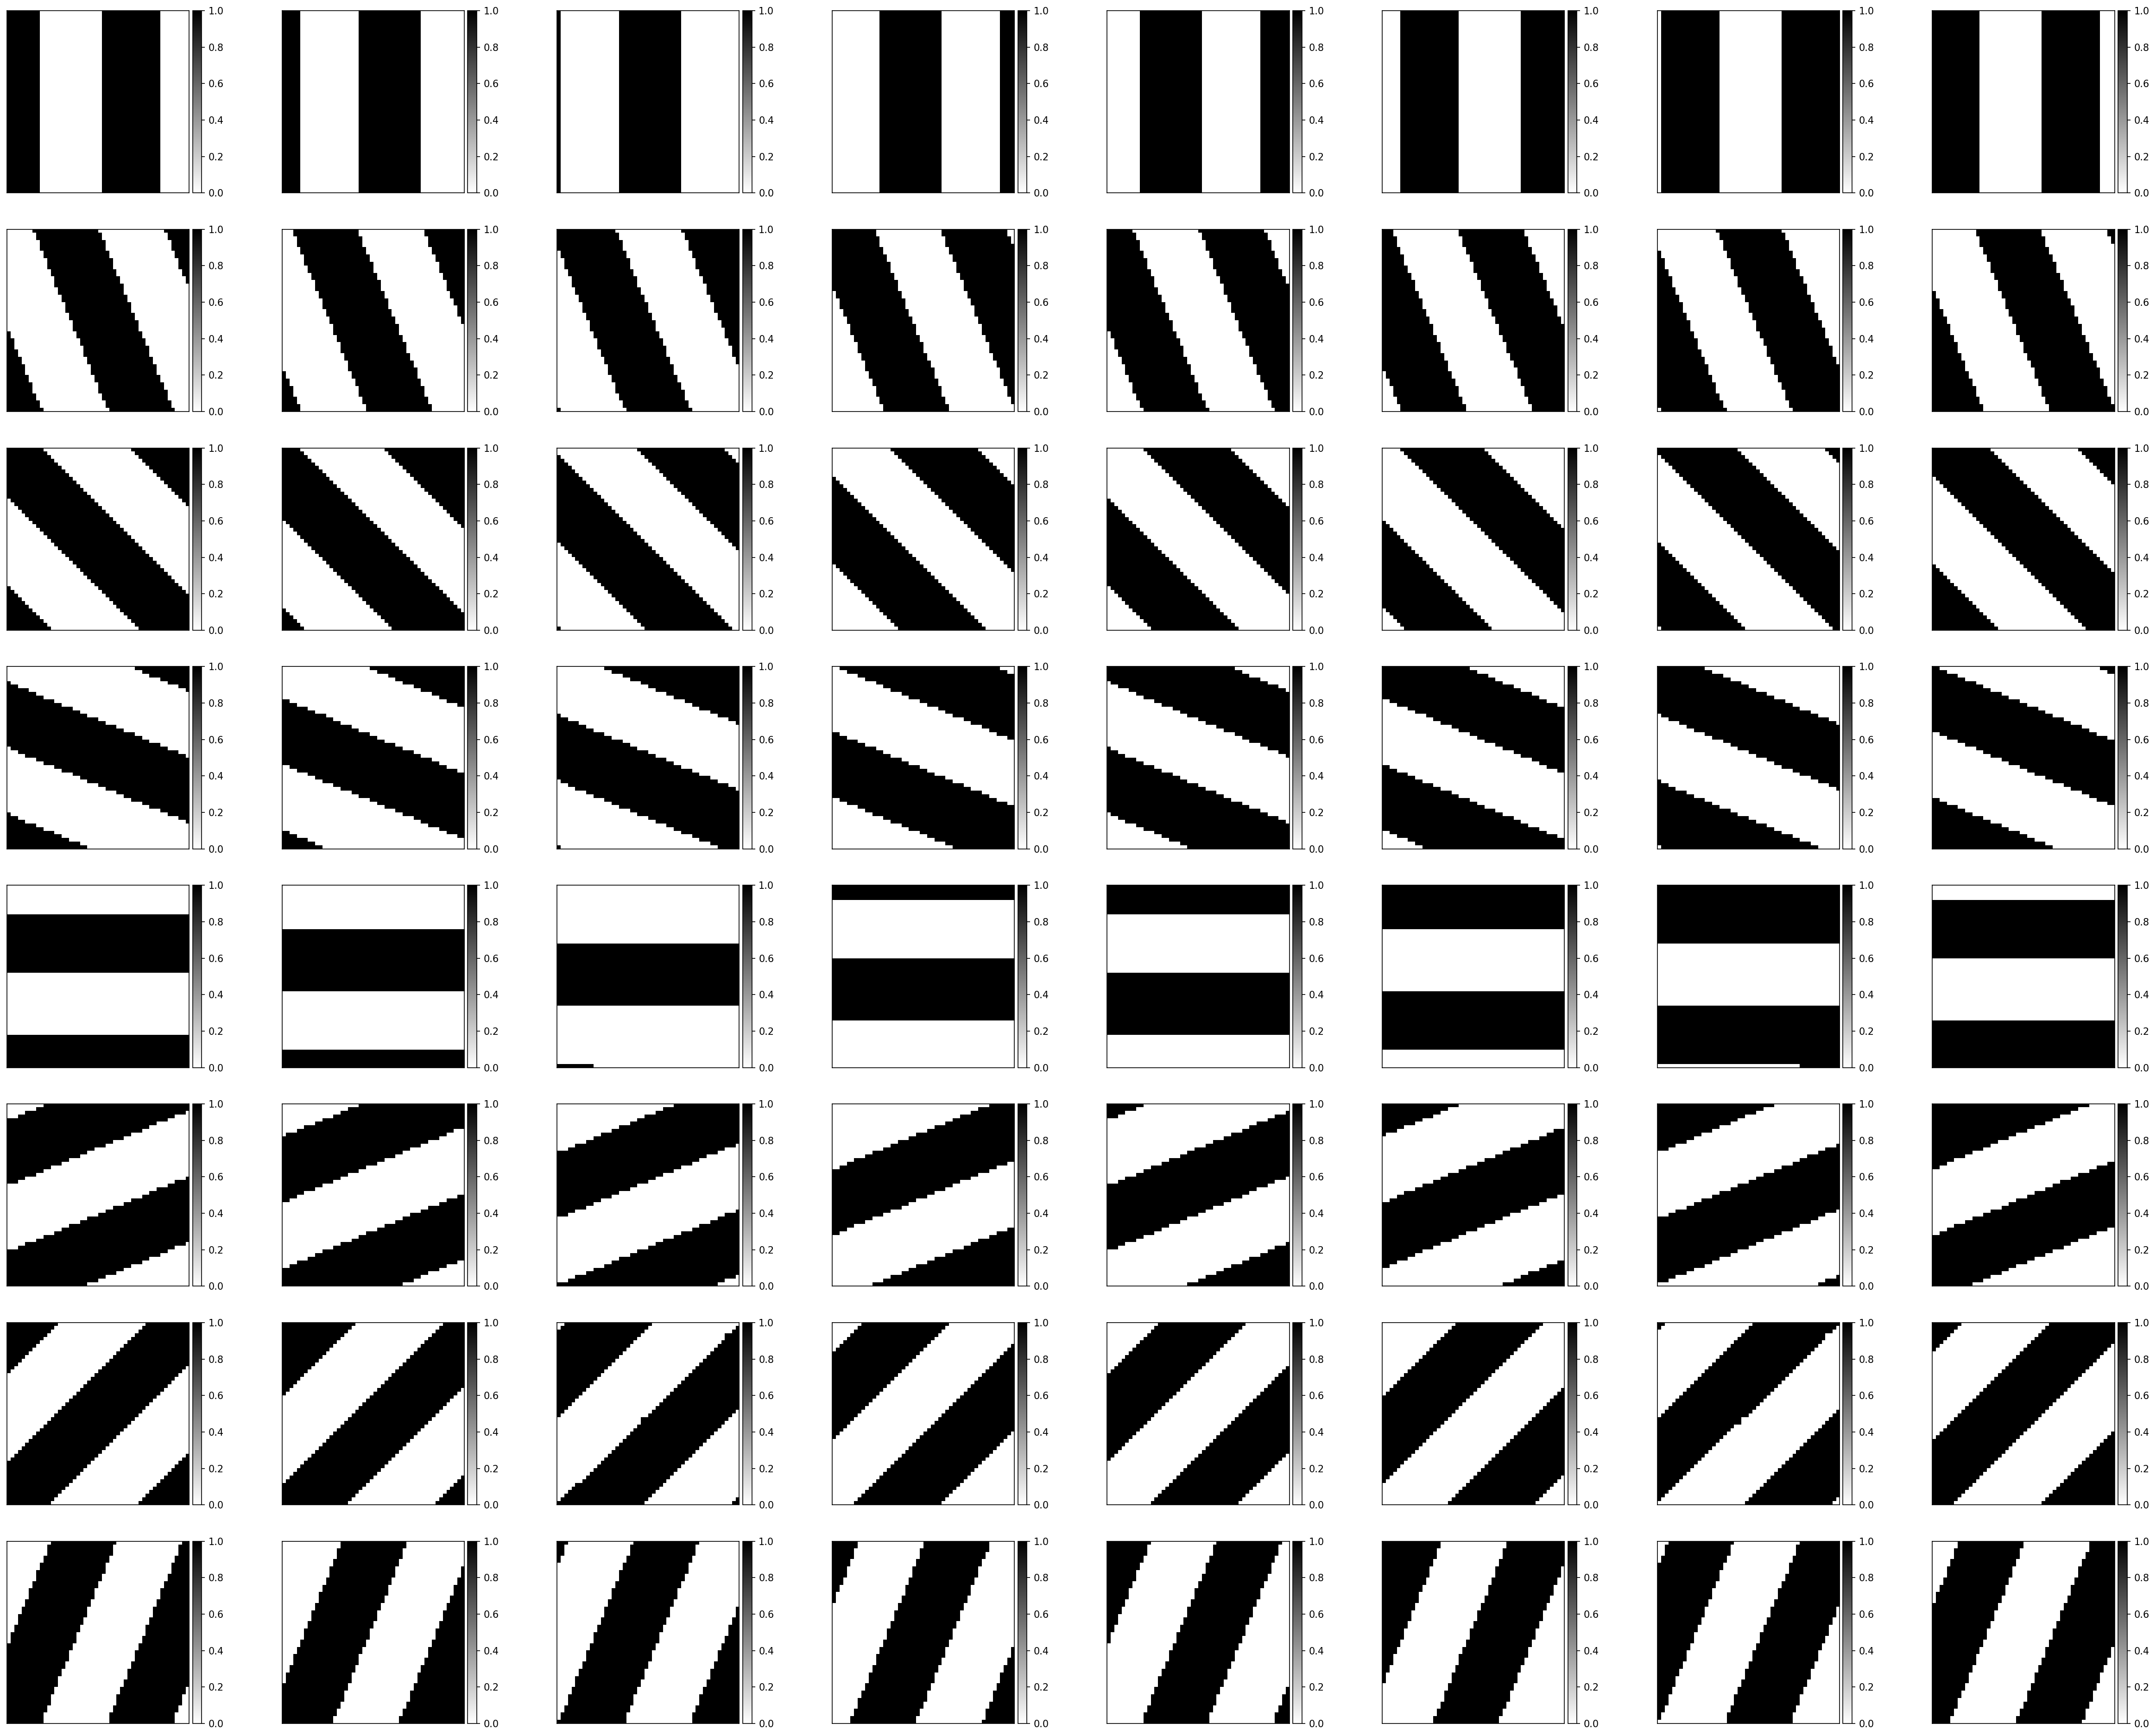

In [8]:
fig,axs = plt.subplots(noris,nphss//2,figsize=(nphss//2*5,noris*4),dpi=150)

for i in range(noris):
    for j in range(nphss//2):
        pf.imshowbar(fig,axs[i,j],grates[i,2*j],origin='lower',cmap='binary')

In [9]:
naive_RF_resp = [None]*Nnaive
naive_SR_resp = [None]*Nnaive
exper_RF_resp = [None]*Nexper
exper_SR_resp = [None]*Nexper

for i in range(Nnaive):
    # naive_RF_resp[i] = np.mean(np.fmax(0,np.sum(2*(grates-0.5)*(naive_RF_ON[i]-naive_RF_OF[i])[None,None,:,:],
    #                         (-2,-1))),1)
    # naive_SR_resp[i] = np.mean(np.fmax(0,np.sum(2*(grates-0.5)*(naive_ON_Rsp[i]-naive_OF_Rsp[i])[None,None,:,:],
    #                         (-2,-1))),1)
    naive_RF_resp[i] = np.fmax(0,np.sum(2*(grates-0.5)*(naive_RF_ON[i]-naive_RF_OF[i])[None,None,:,:],(-2,-1)))
    # naive_SR_resp[i] = np.fmax(0,np.sum(2*(grates-0.5)*(naive_ON_Rsp[i]-naive_OF_Rsp[i])[None,None,:,:],(-2,-1)))
    # naive_SR_resp[i] = np.fmax(0,np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
    #                                 (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1)))
    naive_SR_resp[i] = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                          (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
    naive_SR_resp[i] = np.fmax(0,naive_SR_resp[i] - np.mean(naive_SR_resp[i]))

for i in range(Nexper):
    # exper_RF_resp[i] = np.mean(np.fmax(0,np.sum(2*(grates-0.5)*(exper_RF_ON[i]-exper_RF_OF[i])[None,None,:,:],
    #                         (-2,-1))),1)
    # exper_SR_resp[i] = np.mean(np.fmax(0,np.sum(2*(grates-0.5)*(exper_ON_Rsp[i]-exper_OF_Rsp[i])[None,None,:,:],
    #                         (-2,-1))),1)
    exper_RF_resp[i] = np.fmax(0,np.sum(2*(grates-0.5)*(exper_RF_ON[i]-exper_RF_OF[i])[None,None,:,:],(-2,-1)))
    # exper_SR_resp[i] = np.fmax(0,np.sum(2*(grates-0.5)*(exper_ON_Rsp[i]-exper_OF_Rsp[i])[None,None,:,:],(-2,-1)))
    # exper_SR_resp[i] = np.fmax(0,np.sum(grates*exper_ON_Rsp[i][None,None,:,:]+\
    #                                 (1-grates)*exper_OF_Rsp[i][None,None,:,:],(-2,-1)))
    exper_SR_resp[i] = np.sum(grates*exper_ON_Rsp[i][None,None,:,:]+\
                          (1-grates)*exper_OF_Rsp[i][None,None,:,:],(-2,-1))
    exper_SR_resp[i] = np.fmax(0,exper_SR_resp[i] - np.mean(exper_SR_resp[i]))
    
naive_RF_resp = np.array(naive_RF_resp)
naive_SR_resp = np.array(naive_SR_resp)
exper_RF_resp = np.array(exper_RF_resp)
exper_SR_resp = np.array(exper_SR_resp)

In [10]:
reload(af)

naive_RF_OS = np.zeros(Nnaive)
naive_RF_MR = np.zeros(Nnaive)
naive_SR_OS = np.zeros(Nnaive)
naive_SR_MR = np.zeros(Nnaive)
exper_RF_OS = np.zeros(Nexper)
exper_RF_MR = np.zeros(Nexper)
exper_SR_OS = np.zeros(Nexper)
exper_SR_MR = np.zeros(Nexper)

def calc_OS_MR(A):
    # calculate phase DC and AC per orientation
    F0,F1,_ = af.calc_dc_ac_comp(A)
    
    # calculate orientation DC, AC, and center from phase-averaged response
    A0,A1,PO = af.calc_dc_ac_comp(F0)
    
    # calculate OS from DC and AC of phase-averaged response
    if A1==0:
        OS = 0
    else:
        OS = A1/A0
        
    # infer index of preferred orientation
    PO += np.pi/noris
    if PO < 0: PO = 2*np.pi + PO
    PO = int(PO / (2*np.pi) * noris)
    
    # calculate MR at preferred orientation
    F0,F1 = F0[PO],F1[PO]
    if F1==0:
        MR = 0
    else:
        MR = 2*F1/F0
        
    return OS,MR
    

for i in range(Nnaive):
    naive_RF_OS[i],naive_RF_MR[i] = calc_OS_MR(naive_RF_resp[i])
    naive_SR_OS[i],naive_SR_MR[i] = calc_OS_MR(naive_SR_resp[i])

for i in range(Nexper):
    exper_RF_OS[i],exper_RF_MR[i] = calc_OS_MR(exper_RF_resp[i])
    exper_SR_OS[i],exper_SR_MR[i] = calc_OS_MR(exper_SR_resp[i])

Text(0, 0.5, 'CDF')

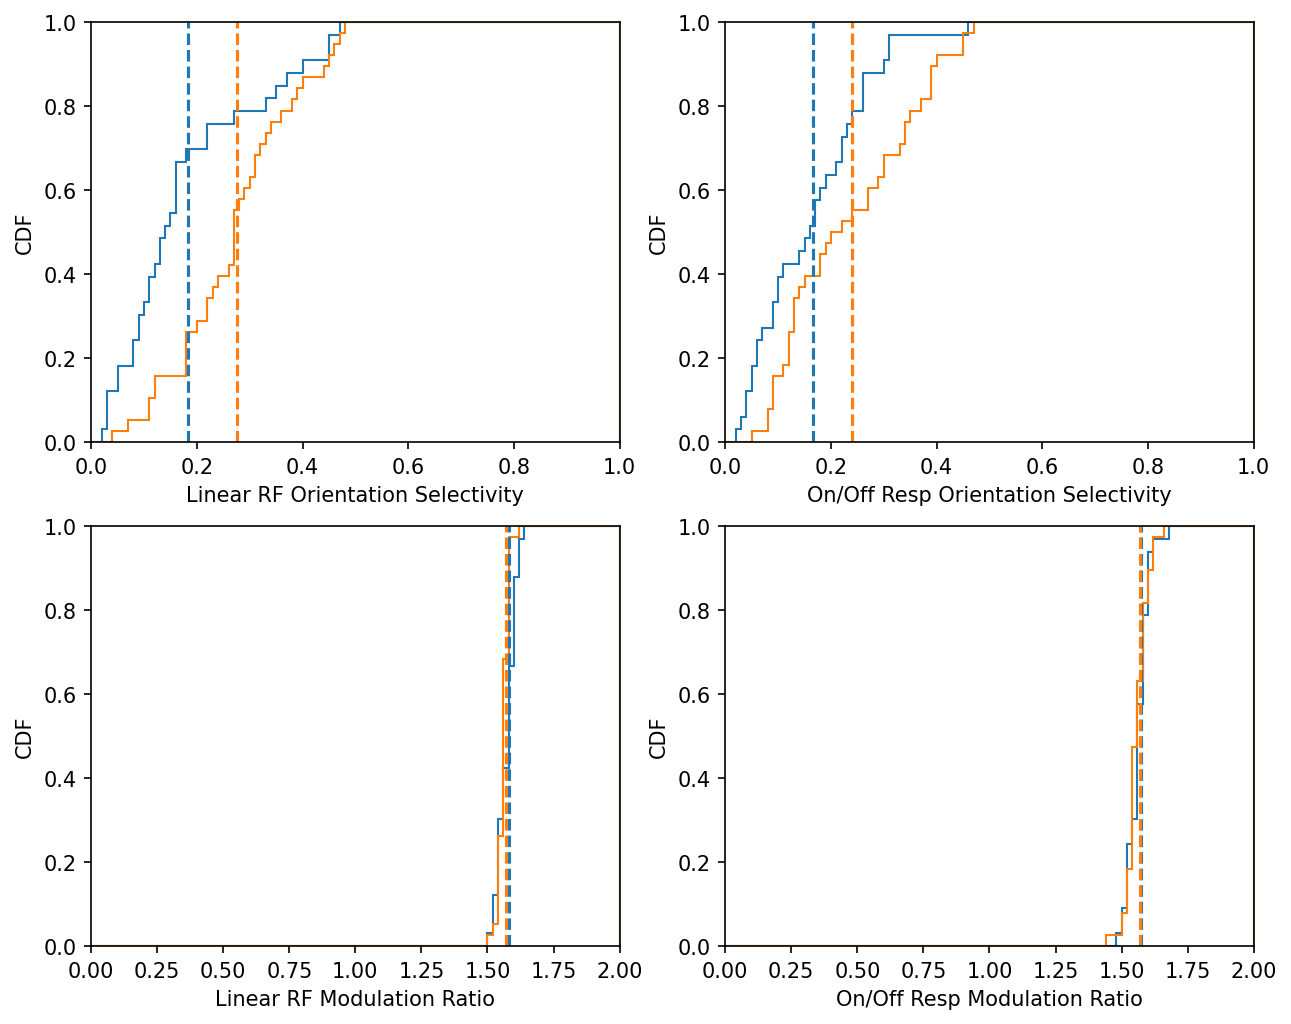

In [11]:
fig,axs = plt.subplots(2,2,figsize=(10,8),dpi=150)

axs[0,0].hist(naive_RF_OS,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[0,0].hist(exper_RF_OS,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[0,1].hist(naive_SR_OS,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[0,1].hist(exper_SR_OS,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs[1,0].hist(naive_RF_MR,np.linspace(0,2,101),density=True,cumulative=True,histtype='step')
axs[1,0].hist(exper_RF_MR,np.linspace(0,2,101),density=True,cumulative=True,histtype='step')
axs[1,1].hist(naive_SR_MR,np.linspace(0,2,101),density=True,cumulative=True,histtype='step')
axs[1,1].hist(exper_SR_MR,np.linspace(0,2,101),density=True,cumulative=True,histtype='step')

axs[0,0].axvline(np.nanmean(naive_RF_OS),c='C0',ls='--')
axs[0,0].axvline(np.nanmean(exper_RF_OS),c='C1',ls='--')
axs[0,1].axvline(np.nanmean(naive_SR_OS),c='C0',ls='--')
axs[0,1].axvline(np.nanmean(exper_SR_OS),c='C1',ls='--')
axs[1,0].axvline(np.nanmean(naive_RF_MR),c='C0',ls='--')
axs[1,0].axvline(np.nanmean(exper_RF_MR),c='C1',ls='--')
axs[1,1].axvline(np.nanmean(naive_SR_MR),c='C0',ls='--')
axs[1,1].axvline(np.nanmean(exper_SR_MR),c='C1',ls='--')

axs[0,0].set_xlim(0,1)
axs[0,0].set_ylim(0,1)
axs[0,1].set_xlim(0,1)
axs[0,1].set_ylim(0,1)
axs[1,0].set_xlim(0,2)
axs[1,0].set_ylim(0,1)
axs[1,1].set_xlim(0,2)
axs[1,1].set_ylim(0,1)

axs[0,0].set_xlabel('Linear RF Orientation Selectivity')
axs[0,0].set_ylabel('CDF')
axs[0,1].set_xlabel('On/Off Resp Orientation Selectivity')
axs[0,1].set_ylabel('CDF')
axs[1,0].set_xlabel('Linear RF Modulation Ratio')
axs[1,0].set_ylabel('CDF')
axs[1,1].set_xlabel('On/Off Resp Modulation Ratio')
axs[1,1].set_ylabel('CDF')

In [12]:
np.mean(naive_SR_OS)

0.16685446102510307

In [72]:
np.sort(naive_SR_OS)

array([0.02299989, 0.0335523 , 0.04268061, 0.0467916 , 0.05146801,
       0.05255287, 0.06202033, 0.0662788 , 0.07848175, 0.09345844,
       0.0939778 , 0.10183206, 0.10876589, 0.11579885, 0.14831102,
       0.15172666, 0.16827604, 0.17007178, 0.17578682, 0.18522244,
       0.19562925, 0.21029717, 0.22125322, 0.22422572, 0.23868787,
       0.24376747, 0.26105269, 0.26486563, 0.26891728, 0.30620957,
       0.31808396, 0.31882898, 0.46432442])

In [73]:
np.mean(naive_SR_OS)

0.16685446102510307

In [75]:
np.std(naive_SR_OS)/np.sqrt(Nnaive)

0.0178842818882883

In [201]:
threshs = np.linspace(0.2,0.8,17,endpoint=True)
nl_pows = np.linspace(1,2,17,endpoint=True)

SR_OSs = np.zeros((3,len(threshs),len(nl_pows),Nnaive))
SR_MRs = np.zeros((3,len(threshs),len(nl_pows),Nnaive))

for t_idx,thresh in enumerate(threshs):
    for p_idx,nl_pow in enumerate(nl_pows):
        for i in range(Nnaive):
            this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                           (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
            this_resp = np.fmax(0,this_resp - 2*thresh*np.mean(this_resp))**nl_pow
            SR_OSs[0,t_idx,p_idx,i],SR_MRs[0,t_idx,p_idx,i] = calc_OS_MR(this_resp)
            
            this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                           (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
            this_resp = np.fmax(0,this_resp - 2*thresh*np.median(this_resp))**nl_pow
            SR_OSs[1,t_idx,p_idx,i],SR_MRs[1,t_idx,p_idx,i] = calc_OS_MR(this_resp)
            
            this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                           (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
            this_resp = np.fmax(0,this_resp - thresh*np.max(this_resp))**nl_pow
            SR_OSs[2,t_idx,p_idx,i],SR_MRs[2,t_idx,p_idx,i] = calc_OS_MR(this_resp)
            
            del this_resp

Text(0.5, 0.98, 'Median OSs and MRs for Rectified Power Law Activation')

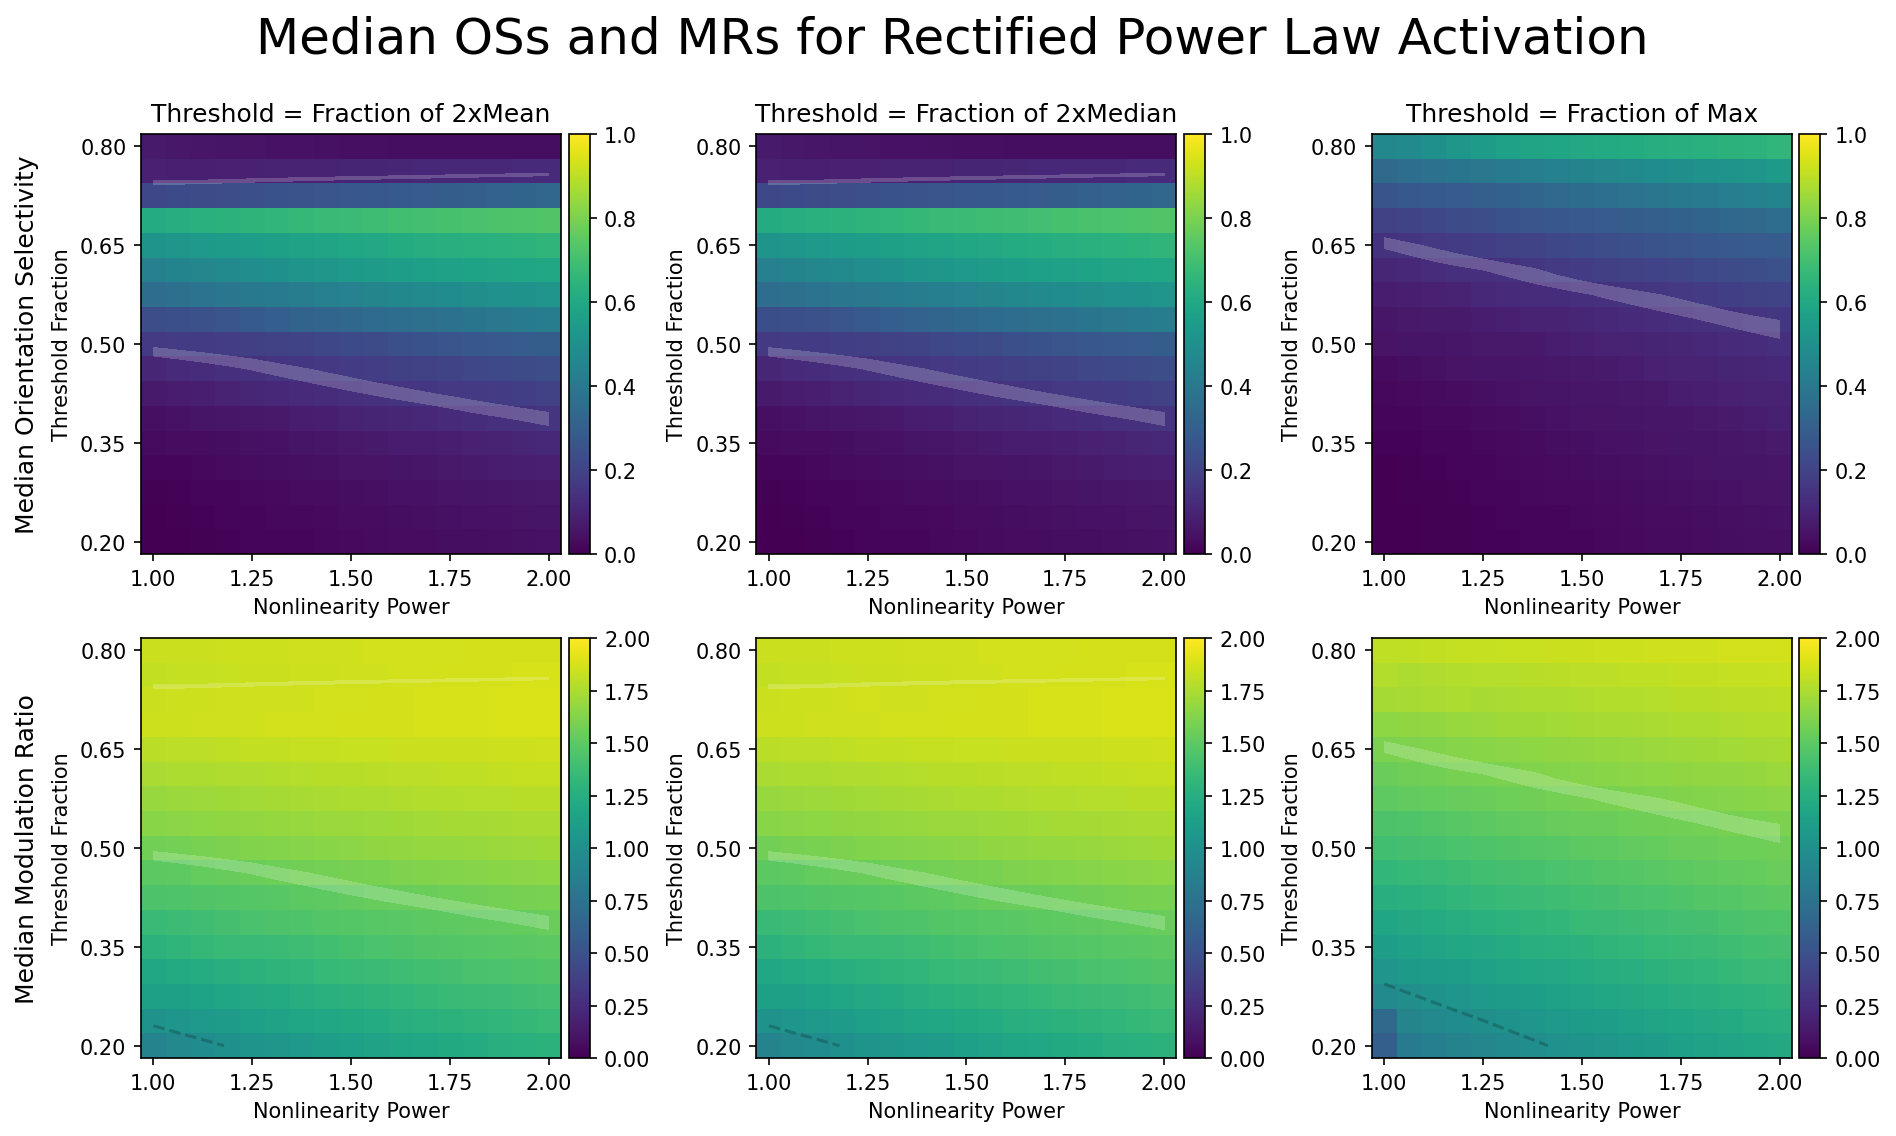

In [205]:
fig,axs = plt.subplots(2,3,figsize=(15,8),dpi=150)

for i in range(3):
    pf.imshowbar(fig,axs[0,i],np.median(SR_OSs[i],-1),hide_ticks=False,origin='lower',cmap='viridis',vmin=0,vmax=1)
    pf.imshowbar(fig,axs[1,i],np.median(SR_MRs[i],-1),hide_ticks=False,origin='lower',cmap='viridis',vmin=0,vmax=2)
    axs[0,i].contourf(np.median(SR_OSs[i],-1),levels=[0.14,0.16],colors='w',alpha=0.2)
    axs[1,i].contourf(np.median(SR_OSs[i],-1),levels=[0.14,0.16],colors='w',alpha=0.2)
    axs[1,i].contour(np.median(SR_MRs[i],-1),levels=[1],colors='k',linestyles='--',alpha=0.2)

axs[0,0].set_title('Threshold = Fraction of 2xMean')
axs[0,1].set_title('Threshold = Fraction of 2xMedian')
axs[0,2].set_title('Threshold = Fraction of Max')
pf.ytitle(axs[0,0],'Median Orientation Selectivity',xloc=-.3,fontsize=12)
pf.ytitle(axs[1,0],'Median Modulation Ratio',xloc=-.3,fontsize=12)

for ax in axs.ravel():
    ax.set_xlabel('Nonlinearity Power')
    ax.set_ylabel('Threshold Fraction')
    ax.set_xticks(np.arange(17)[::4],['{:.2f}'.format(nl_pow) for nl_pow in nl_pows[::4]])
    ax.set_yticks(np.arange(17)[::4],['{:.2f}'.format(thresh) for thresh in threshs[::4]])
    
fig.suptitle('Median OSs and MRs for Rectified Power Law Activation',fontsize=24)

In [317]:
widths = np.fmax(0.001,np.linspace(0,0.5,17,endpoint=True))

dists = np.abs(np.arange(nphss)[:,None] - np.arange(nphss)[None,:]) / nphss
dists[dists > 0.5] = 1 - dists[dists > 0.5]

# dxs,dys = np.meshgrid(np.arange(50)*0.5 / 25,np.arange(50)*0.5 / 25)
# dxs = dxs[:,:,None,None]-dxs[None,None,:,:]
# dys = dys[:,:,None,None]-dys[None,None,:,:]
# dxs[dxs > 0.5] = 1 - dxs[dxs > 0.5]
# dys[dys > 0.5] = 1 - dys[dys > 0.5]
# dists = np.sqrt(dxs**2 + dys**2)

smoothed_SR_OSs = np.zeros((3,len(widths),Nnaive))
smoothed_SR_MRs = np.zeros((3,len(widths),Nnaive))

for w_idx,width in enumerate(widths):
    gauss_kern = np.exp(-0.5*dists**2/width**2)
    gauss_kern /= np.sum(gauss_kern,-1,keepdims=True)
    
    # gauss_kern = np.exp(-0.5*dists**2/width**2)
    # gauss_kern /= np.sum(gauss_kern,(-1,-2),keepdims=True)
    # this_grate = np.einsum('ijkl,mnkl->mnij',gauss_kern,grates)
    
    this_grate = np.einsum('ij,kjlm->kilm',gauss_kern,grates)
    for i in range(Nnaive):
        # this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.982*np.mean(this_resp))
        # smoothed_SR_OSs[0,w_idx,i],smoothed_SR_MRs[0,w_idx,i] = calc_OS_MR(np.einsum('ij,kj->ki',gauss_kern,this_resp))
        
        # this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.982*np.median(this_resp))
        # smoothed_SR_OSs[1,w_idx,i],smoothed_SR_MRs[1,w_idx,i] = calc_OS_MR(np.einsum('ij,kj->ki',gauss_kern,this_resp))
        
        # this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.655*np.max(this_resp))
        # smoothed_SR_OSs[2,w_idx,i],smoothed_SR_MRs[2,w_idx,i] = calc_OS_MR(np.einsum('ij,kj->ki',gauss_kern,this_resp))
        
        this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        this_resp = np.fmax(0,this_resp - 0.982*np.mean(this_resp))
        smoothed_SR_OSs[0,w_idx,i],smoothed_SR_MRs[0,w_idx,i] = calc_OS_MR(this_resp)
        
        this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        this_resp = np.fmax(0,this_resp - 0.982*np.median(this_resp))
        smoothed_SR_OSs[1,w_idx,i],smoothed_SR_MRs[1,w_idx,i] = calc_OS_MR(this_resp)
        
        this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        this_resp = np.fmax(0,this_resp - 0.655*np.max(this_resp))
        smoothed_SR_OSs[2,w_idx,i],smoothed_SR_MRs[2,w_idx,i] = calc_OS_MR(this_resp)
        
        del this_resp

Text(0.5, 0.98, 'Median OSs and MRs for Rectified Linear Activation with LGN RF Smoothing')

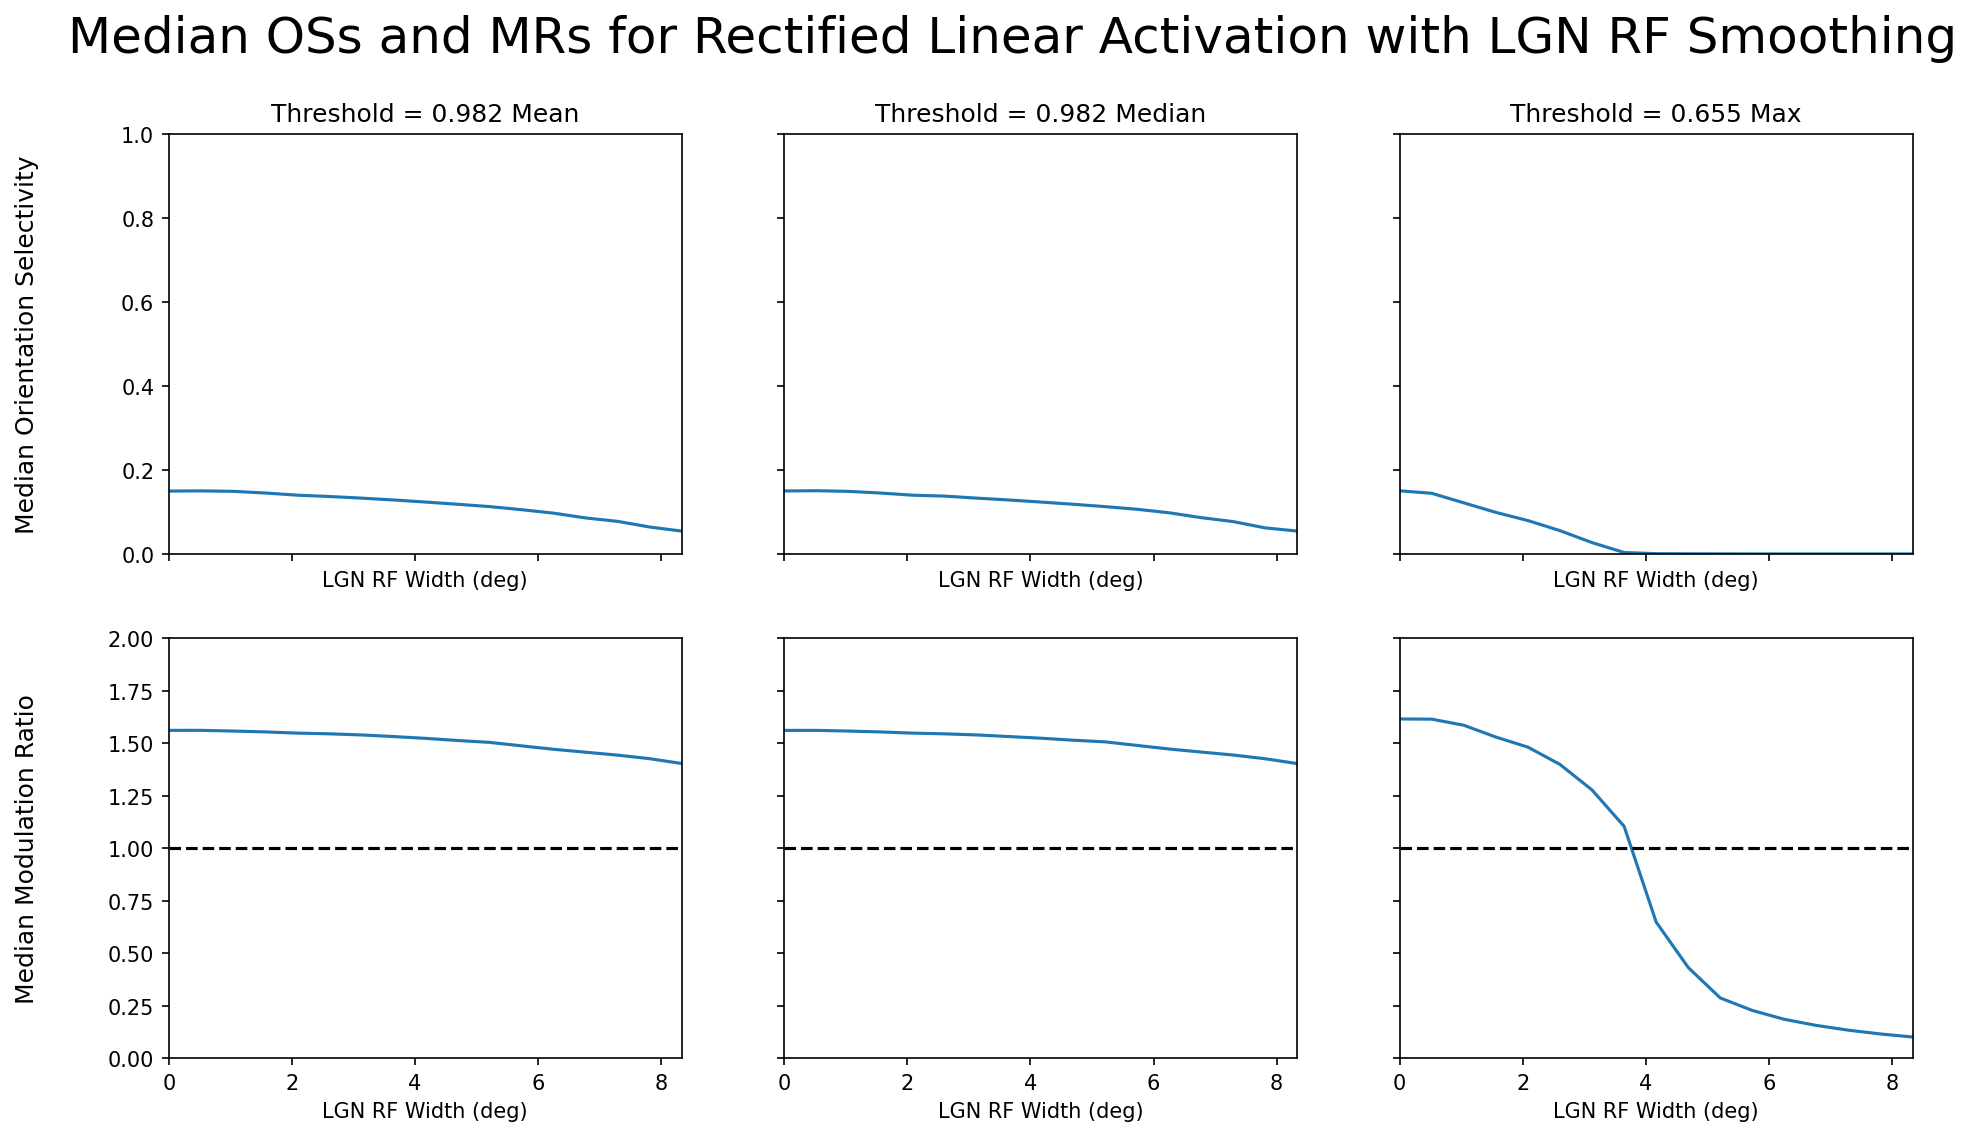

In [318]:
fig,axs = plt.subplots(2,3,figsize=(15,8),dpi=150,sharex=True,sharey='row')

for i in range(3):
    axs[0,i].plot(widths/freq,np.median(smoothed_SR_OSs[i],-1))
    axs[1,i].plot(widths/freq,np.median(smoothed_SR_MRs[i],-1))
    axs[1,i].axhline(1,c='k',ls='--')

axs[0,0].set_xlim(0,0.5/freq)
axs[0,0].set_ylim(0,1)
axs[1,0].set_ylim(0,2)

axs[0,0].set_title('Threshold = 0.982 Mean')
axs[0,1].set_title('Threshold = 0.982 Median')
axs[0,2].set_title('Threshold = 0.655 Max')
pf.ytitle(axs[0,0],'Median Orientation Selectivity',xloc=-.3,fontsize=12)
pf.ytitle(axs[1,0],'Median Modulation Ratio',xloc=-.3,fontsize=12)

for ax in axs.ravel():
    ax.set_xlabel('LGN RF Width (deg)')
    
fig.suptitle('Median OSs and MRs for Rectified Linear Activation with LGN RF Smoothing',fontsize=24)

In [326]:
widths = np.fmax(0.001,np.linspace(0,0.5,17,endpoint=True))

dists = np.abs(np.arange(nphss)[:,None] - np.arange(nphss)[None,:]) / nphss
dists[dists > 0.5] = 1 - dists[dists > 0.5]

# dxs,dys = np.meshgrid(np.arange(50)*0.5 / 25,np.arange(50)*0.5 / 25)
# dxs = dxs[:,:,None,None]-dxs[None,None,:,:]
# dys = dys[:,:,None,None]-dys[None,None,:,:]
# dxs[dxs > 0.5] = 1 - dxs[dxs > 0.5]
# dys[dys > 0.5] = 1 - dys[dys > 0.5]
# dists = np.sqrt(dxs**2 + dys**2)

smoothed_SR_OSs = np.zeros((3,len(widths),Nnaive))
smoothed_SR_MRs = np.zeros((3,len(widths),Nnaive))

for w_idx,width in enumerate(widths):
    gauss_kern = np.exp(-0.5*dists**2/width**2)
    gauss_kern /= np.sum(gauss_kern,-1,keepdims=True)
    
    # gauss_kern = np.exp(-0.5*dists**2/width**2)
    # gauss_kern /= np.sum(gauss_kern,(-1,-2),keepdims=True)
    # this_grate = np.einsum('ijkl,mnkl->mnij',gauss_kern,grates)
    
    # this_grate = np.einsum('ij,kjlm->kilm',gauss_kern,grates)
    for i in range(Nnaive):
        this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        this_resp = np.fmax(0,this_resp - 0.982*np.mean(this_resp))
        smoothed_SR_OSs[0,w_idx,i],smoothed_SR_MRs[0,w_idx,i] = calc_OS_MR(np.einsum('ij,kj->ki',gauss_kern,this_resp))
        
        this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        this_resp = np.fmax(0,this_resp - 0.982*np.median(this_resp))
        smoothed_SR_OSs[1,w_idx,i],smoothed_SR_MRs[1,w_idx,i] = calc_OS_MR(np.einsum('ij,kj->ki',gauss_kern,this_resp))
        
        this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        this_resp = np.fmax(0,this_resp - 0.655*np.max(this_resp))
        smoothed_SR_OSs[2,w_idx,i],smoothed_SR_MRs[2,w_idx,i] = calc_OS_MR(np.einsum('ij,kj->ki',gauss_kern,this_resp))
        
        # this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.982*np.mean(this_resp))
        # smoothed_SR_OSs[0,w_idx,i],smoothed_SR_MRs[0,w_idx,i] = calc_OS_MR(this_resp)
        
        # this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.982*np.median(this_resp))
        # smoothed_SR_OSs[1,w_idx,i],smoothed_SR_MRs[1,w_idx,i] = calc_OS_MR(this_resp)
        
        # this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.655*np.max(this_resp))
        # smoothed_SR_OSs[2,w_idx,i],smoothed_SR_MRs[2,w_idx,i] = calc_OS_MR(this_resp)
        
        del this_resp

Text(0.5, 0.98, 'Median OSs and MRs for Rectified Linear Activation, Phase-Smoothed Responses')

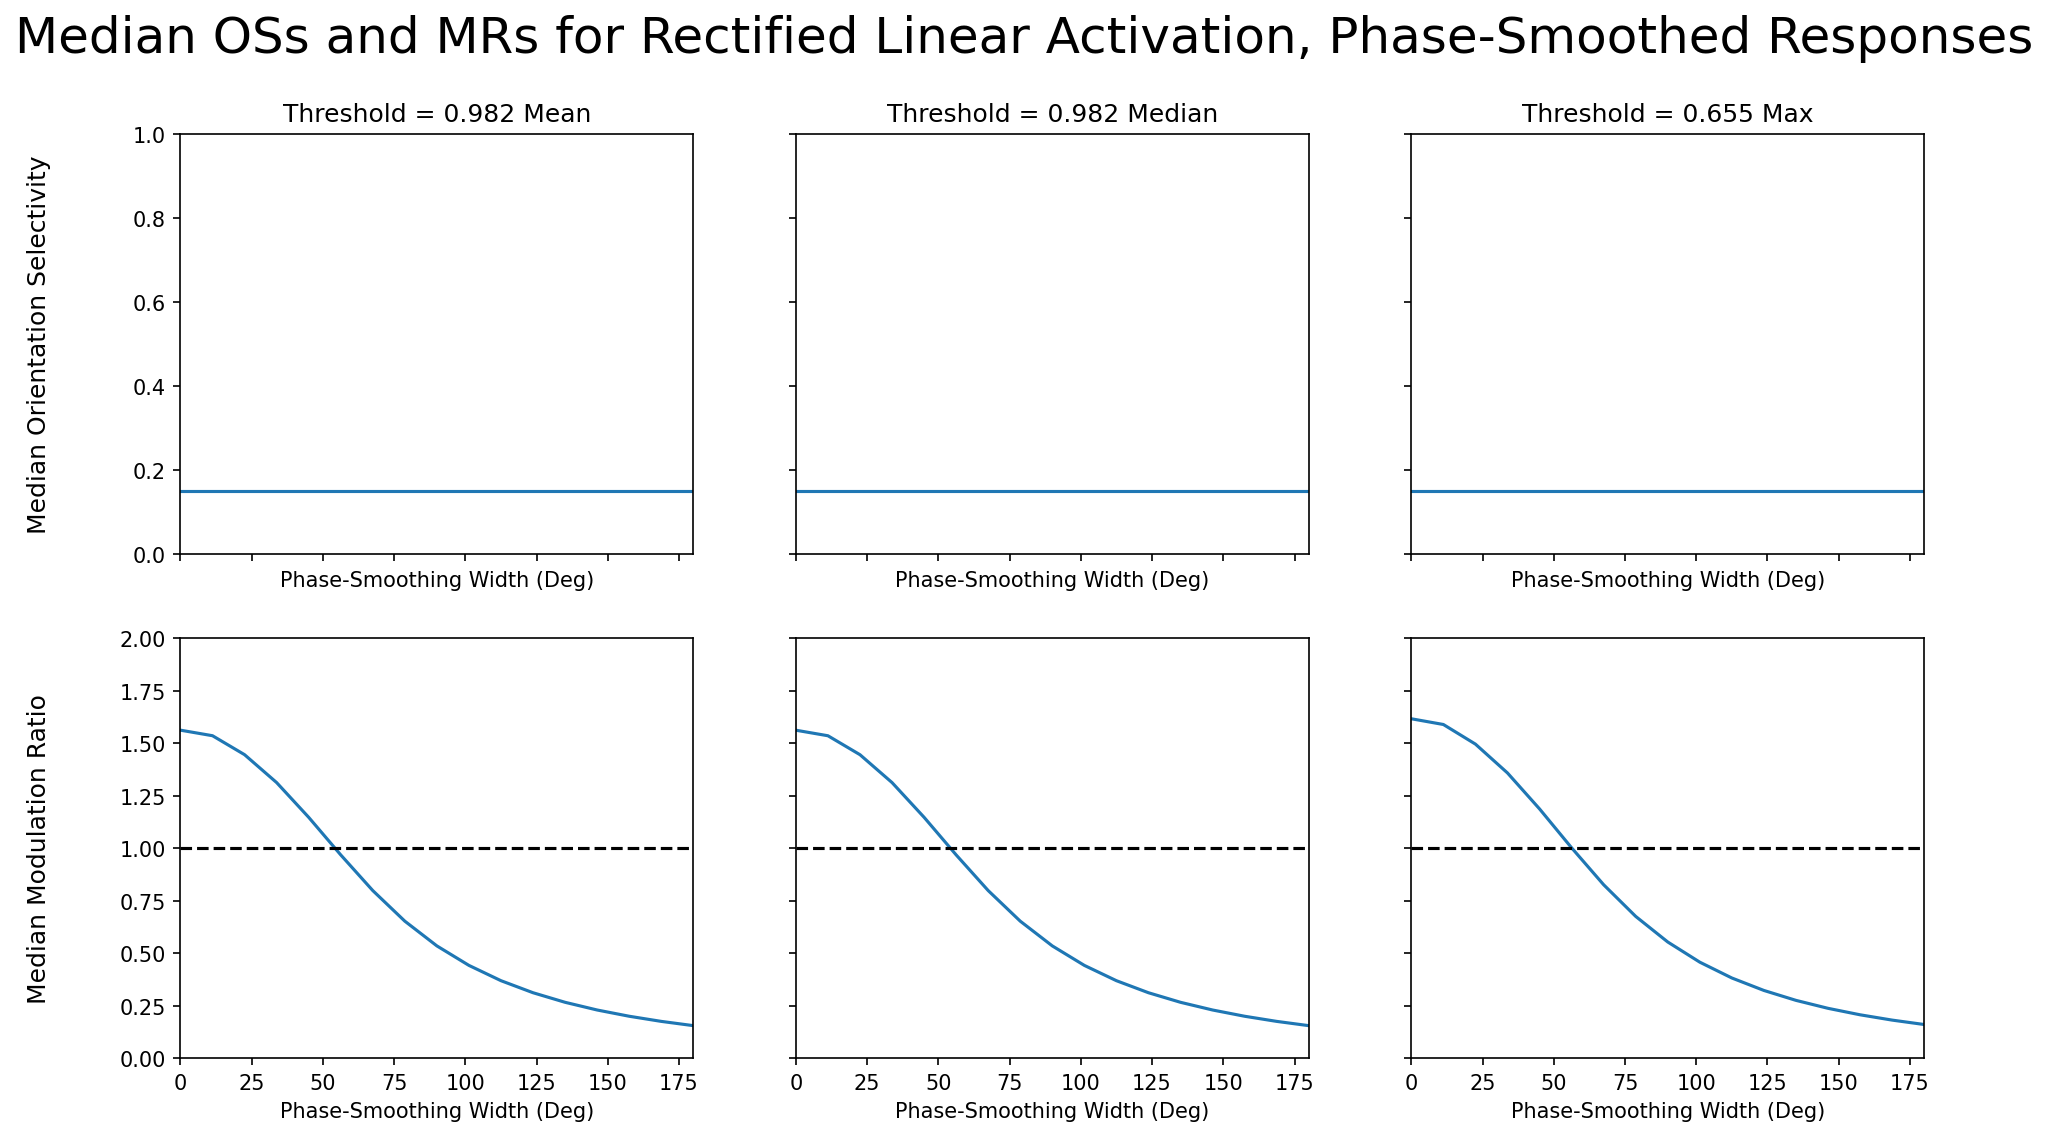

In [327]:
fig,axs = plt.subplots(2,3,figsize=(15,8),dpi=150,sharex=True,sharey='row')

for i in range(3):
    axs[0,i].plot(widths*360,np.median(smoothed_SR_OSs[i],-1))
    axs[1,i].plot(widths*360,np.median(smoothed_SR_MRs[i],-1))
    axs[1,i].axhline(1,c='k',ls='--')

axs[0,0].set_xlim(0,0.5*360)
axs[0,0].set_ylim(0,1)
axs[1,0].set_ylim(0,2)

axs[0,0].set_title('Threshold = 0.982 Mean')
axs[0,1].set_title('Threshold = 0.982 Median')
axs[0,2].set_title('Threshold = 0.655 Max')
pf.ytitle(axs[0,0],'Median Orientation Selectivity',xloc=-.3,fontsize=12)
pf.ytitle(axs[1,0],'Median Modulation Ratio',xloc=-.3,fontsize=12)

for ax in axs.ravel():
    ax.set_xlabel('Phase-Smoothing Width (Deg)')
    
fig.suptitle('Median OSs and MRs for Rectified Linear Activation, Phase-Smoothed Responses',fontsize=24)

In [328]:
widths = np.fmax(0.001,np.linspace(0,0.5,17,endpoint=True))

dists = np.abs(np.arange(nphss)[:,None] - np.arange(nphss)[None,:]) / nphss
dists[dists > 0.5] = 1 - dists[dists > 0.5]

# dxs,dys = np.meshgrid(np.arange(50)*0.5 / 25,np.arange(50)*0.5 / 25)
# dxs = dxs[:,:,None,None]-dxs[None,None,:,:]
# dys = dys[:,:,None,None]-dys[None,None,:,:]
# dxs[dxs > 0.5] = 1 - dxs[dxs > 0.5]
# dys[dys > 0.5] = 1 - dys[dys > 0.5]
# dists = np.sqrt(dxs**2 + dys**2)

smoothed_SR_OSs = np.zeros((3,len(widths),Nnaive))
smoothed_SR_MRs = np.zeros((3,len(widths),Nnaive))

for w_idx,width in enumerate(widths):
    gauss_kern = np.exp(-0.5*dists**2/width**2)
    gauss_kern /= np.sum(gauss_kern,-1,keepdims=True)
    
    # gauss_kern = np.exp(-0.5*dists**2/width**2)
    # gauss_kern /= np.sum(gauss_kern,(-1,-2),keepdims=True)
    # this_grate = np.einsum('ijkl,mnkl->mnij',gauss_kern,grates)
    
    # this_grate = np.einsum('ij,kjlm->kilm',gauss_kern,grates)
    for i in range(Nnaive):
        this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        thresh = 0.982*np.mean(this_resp)
        this_resp = np.einsum('ij,kj->ki',gauss_kern,this_resp)
        this_resp = np.fmax(0,this_resp - thresh)
        smoothed_SR_OSs[0,w_idx,i],smoothed_SR_MRs[0,w_idx,i] = calc_OS_MR(this_resp)
        
        this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        thresh = 0.982*np.median(this_resp)
        this_resp = np.einsum('ij,kj->ki',gauss_kern,this_resp)
        this_resp = np.fmax(0,this_resp - thresh)
        smoothed_SR_OSs[1,w_idx,i],smoothed_SR_MRs[1,w_idx,i] = calc_OS_MR(this_resp)
        
        this_resp = np.sum(grates*naive_ON_Rsp[i][None,None,:,:]+\
                       (1-grates)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        thresh = 0.655*np.max(this_resp)
        this_resp = np.einsum('ij,kj->ki',gauss_kern,this_resp)
        this_resp = np.fmax(0,this_resp - thresh)
        smoothed_SR_OSs[2,w_idx,i],smoothed_SR_MRs[2,w_idx,i] = calc_OS_MR(this_resp)
        
        # this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.982*np.mean(this_resp))
        # smoothed_SR_OSs[0,w_idx,i],smoothed_SR_MRs[0,w_idx,i] = calc_OS_MR(this_resp)
        
        # this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.982*np.median(this_resp))
        # smoothed_SR_OSs[1,w_idx,i],smoothed_SR_MRs[1,w_idx,i] = calc_OS_MR(this_resp)
        
        # this_resp = np.sum(this_grate*naive_ON_Rsp[i][None,None,:,:]+\
        #                 (1-this_grate)*naive_OF_Rsp[i][None,None,:,:],(-2,-1))
        # this_resp = np.fmax(0,this_resp - 0.655*np.max(this_resp))
        # smoothed_SR_OSs[2,w_idx,i],smoothed_SR_MRs[2,w_idx,i] = calc_OS_MR(this_resp)
        
        del this_resp

Text(0.5, 0.98, 'Median OSs and MRs for Rectified Linear Activation, Phase-Smoothed Inputs')

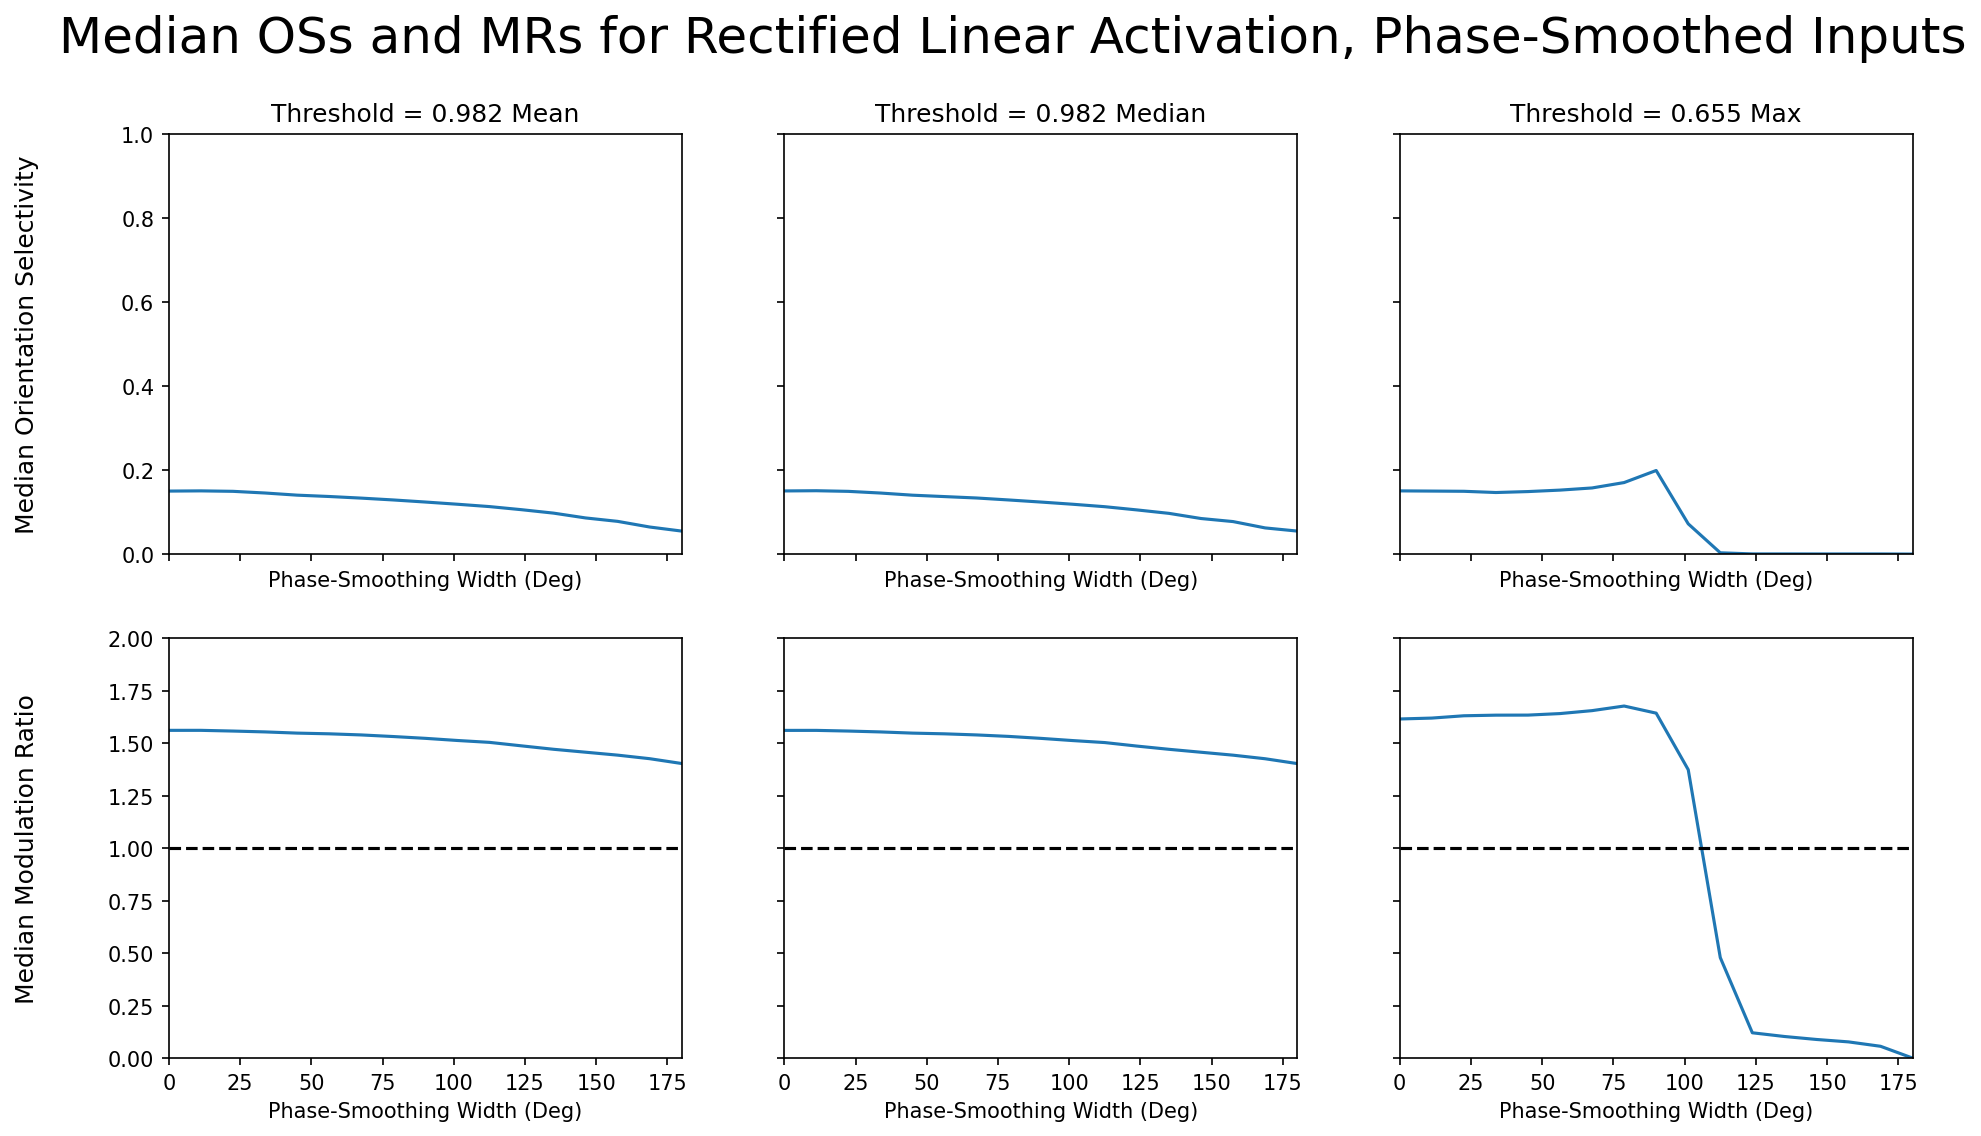

In [329]:
fig,axs = plt.subplots(2,3,figsize=(15,8),dpi=150,sharex=True,sharey='row')

for i in range(3):
    axs[0,i].plot(widths*360,np.median(smoothed_SR_OSs[i],-1))
    axs[1,i].plot(widths*360,np.median(smoothed_SR_MRs[i],-1))
    axs[1,i].axhline(1,c='k',ls='--')

axs[0,0].set_xlim(0,0.5*360)
axs[0,0].set_ylim(0,1)
axs[1,0].set_ylim(0,2)

axs[0,0].set_title('Threshold = 0.982 Mean')
axs[0,1].set_title('Threshold = 0.982 Median')
axs[0,2].set_title('Threshold = 0.655 Max')
pf.ytitle(axs[0,0],'Median Orientation Selectivity',xloc=-.3,fontsize=12)
pf.ytitle(axs[1,0],'Median Modulation Ratio',xloc=-.3,fontsize=12)

for ax in axs.ravel():
    ax.set_xlabel('Phase-Smoothing Width (Deg)')
    
fig.suptitle('Median OSs and MRs for Rectified Linear Activation, Phase-Smoothed Inputs',fontsize=24)

In [20]:
print(np.mean(np.array(naive_RF_OS)))
print(np.mean(np.array(naive_SR_OS)))
print(np.mean(np.array(exper_RF_OS)))
print(np.mean(np.array(exper_SR_OS)))

0.18409882599360877
0.16685045177312677
0.27614258647453993
0.2407556051210968


Text(0, 0.5, 'Count')

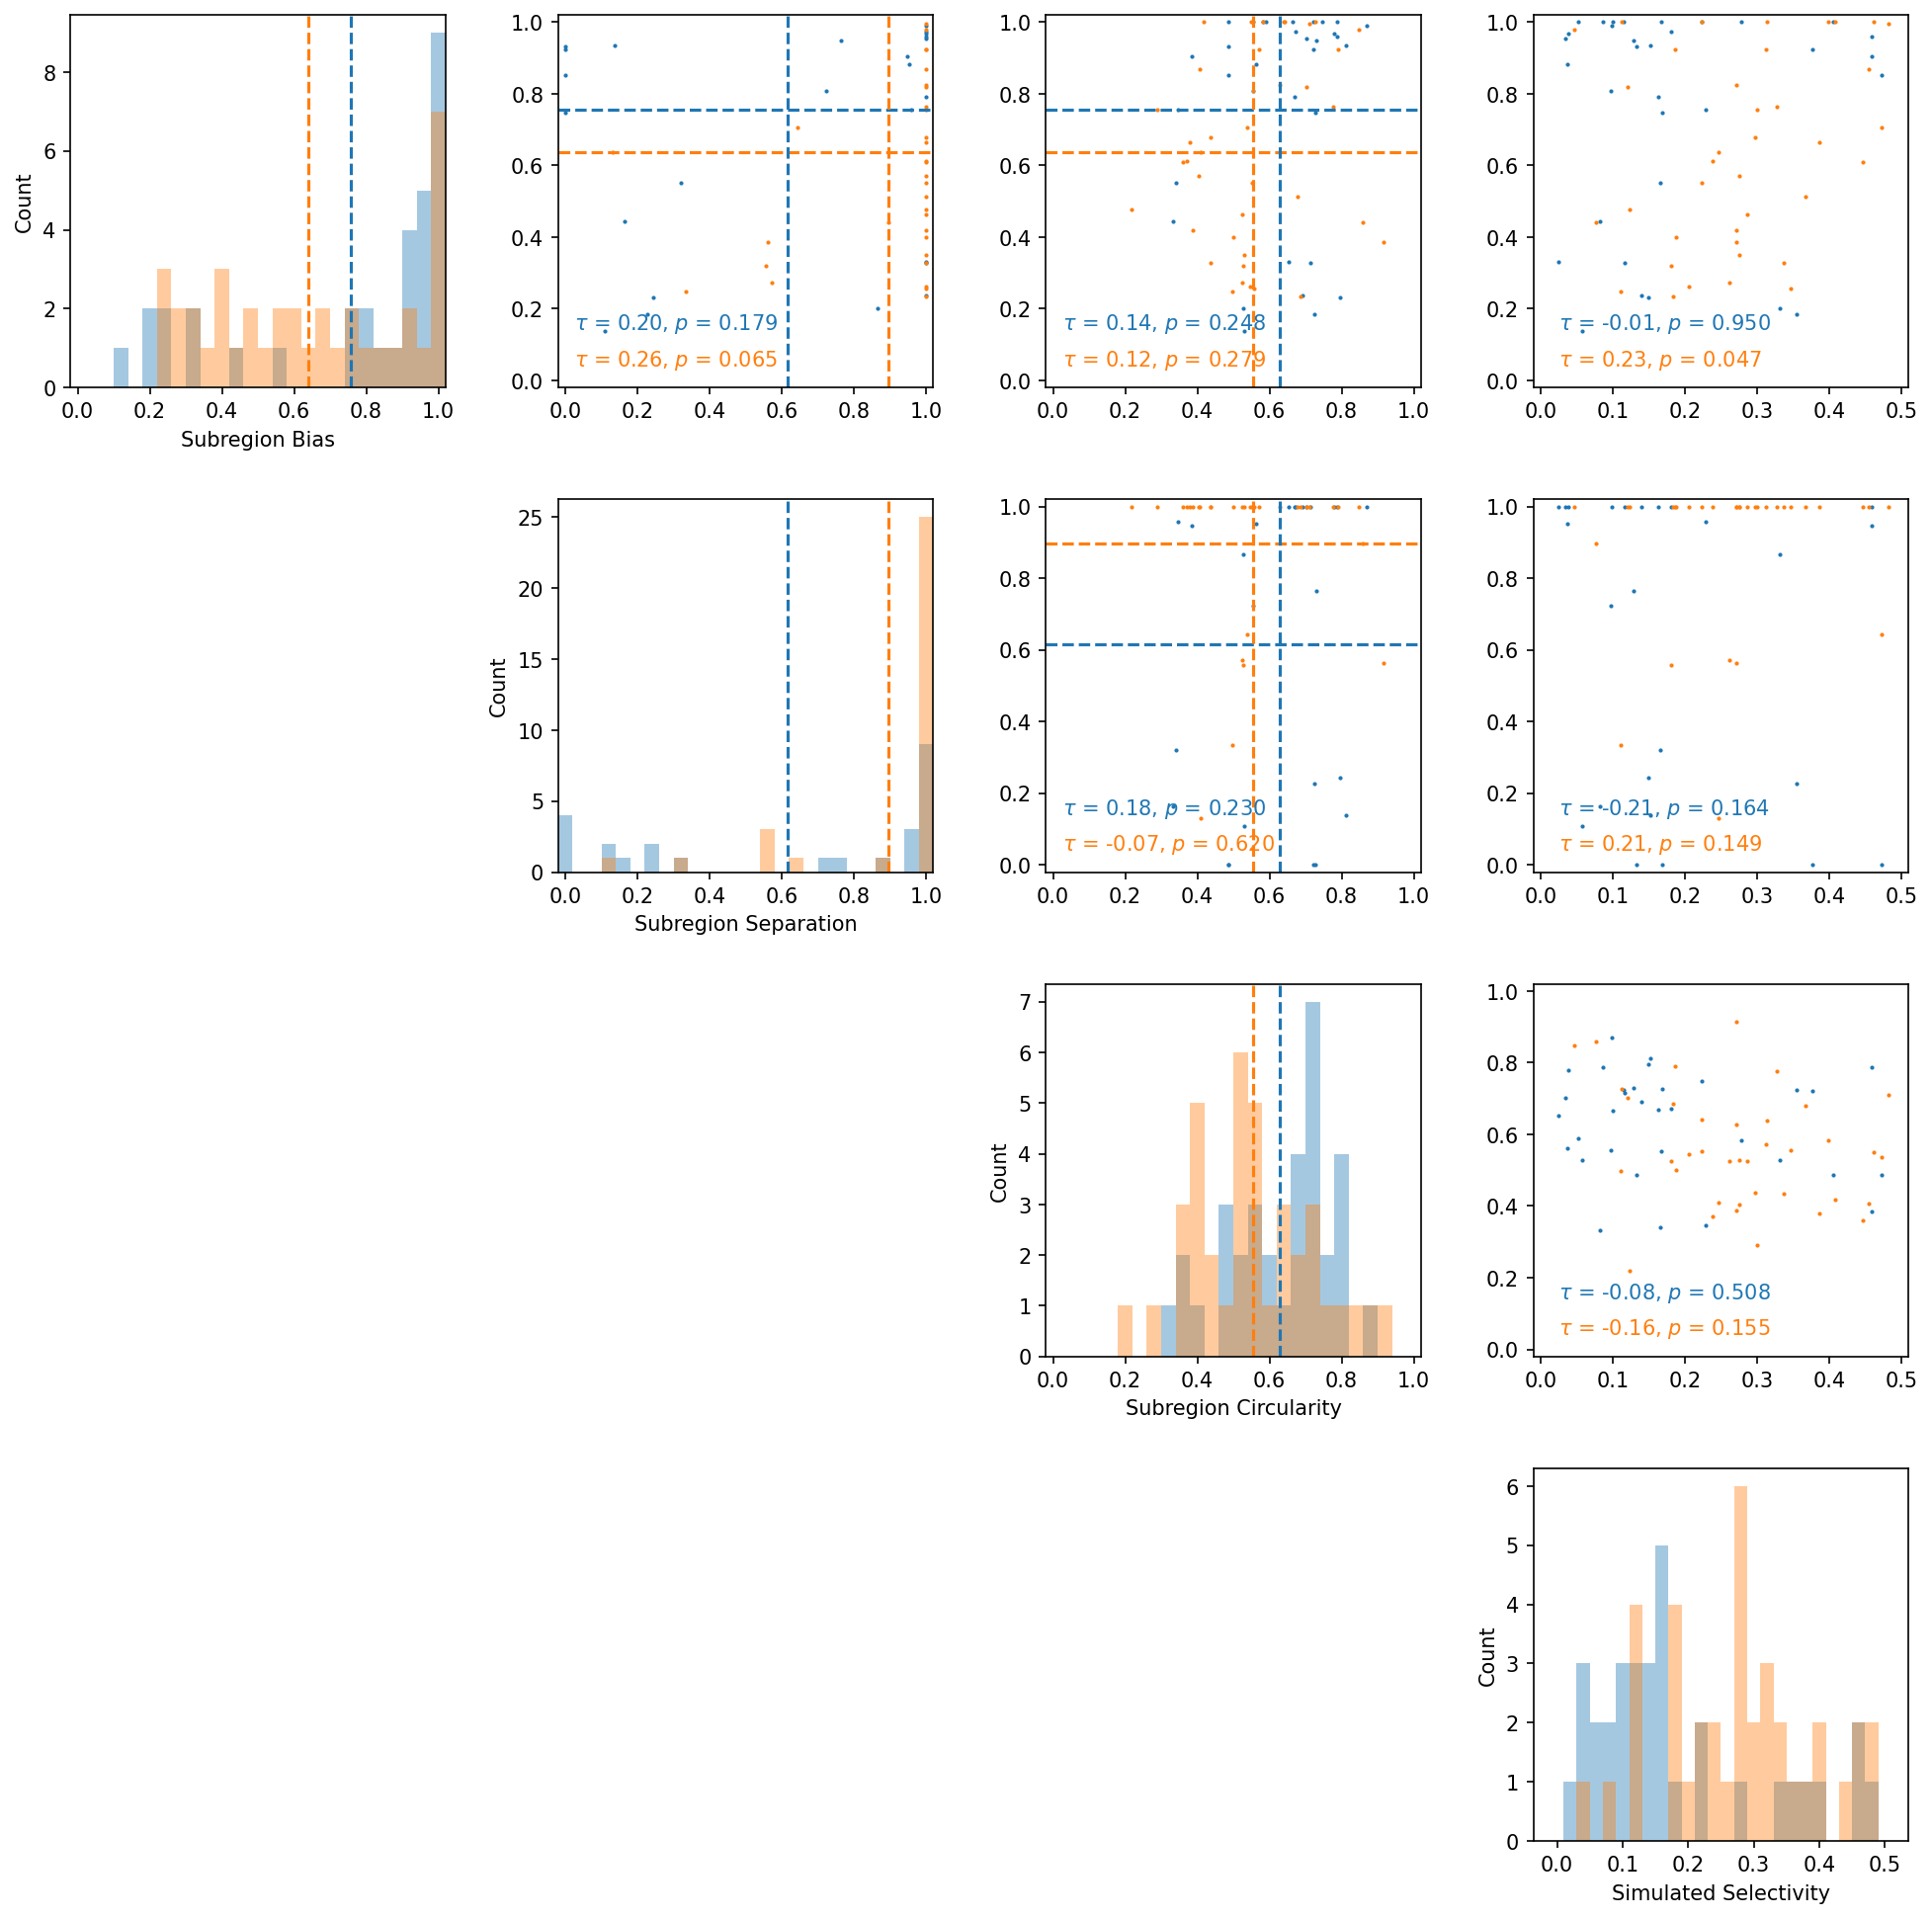

In [17]:
nbins = 25

fig,axs = plt.subplots(4,4,figsize=(16,16),dpi=150)
fig.subplots_adjust(wspace=0.3,hspace=0.3)

for i in range(4):
    for j in range(4):
        if j >= i: continue
        axs[i,j].set_axis_off()

axs[0,0].hist(naive_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[0,0].hist(exper_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(naive_sepr,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(exper_sepr,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[2,2].hist(naive_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[2,2].hist(exper_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[3,3].hist(naive_RF_OS,np.linspace(-1/(4*nbins),0.5+1/(4*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[3,3].hist(exper_RF_OS,np.linspace(-1/(4*nbins),0.5+1/(4*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[0,1].scatter(naive_sepr,naive_bias,s=1)
axs[0,1].scatter(exper_sepr,exper_bias,s=1)
axs[0,2].scatter(naive_crc,naive_bias,s=1)
axs[0,2].scatter(exper_crc,exper_bias,s=1)
axs[0,3].scatter(naive_RF_OS,naive_bias,s=1)
axs[0,3].scatter(exper_RF_OS,exper_bias,s=1)
axs[1,2].scatter(naive_crc,naive_sepr,s=1)
axs[1,2].scatter(exper_crc,exper_sepr,s=1)
axs[1,3].scatter(naive_RF_OS,naive_sepr,s=1)
axs[1,3].scatter(exper_RF_OS,exper_sepr,s=1)
axs[2,3].scatter(naive_RF_OS,naive_crc,s=1)
axs[2,3].scatter(exper_RF_OS,exper_crc,s=1)

axs[0,0].axvline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0,0].axvline(np.nanmean(exper_bias),c='C1',ls='--')
axs[1,1].axvline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[1,1].axvline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[2,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
axs[2,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')
axs[0,1].axhline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0,1].axhline(np.nanmean(exper_bias),c='C1',ls='--')
axs[0,1].axvline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[0,1].axvline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[0,2].axhline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0,2].axhline(np.nanmean(exper_bias),c='C1',ls='--')
axs[0,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
axs[0,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')
axs[1,2].axhline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[1,2].axhline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[1,2].axvline(np.nanmean(naive_crc),c='C0',ls='--')
axs[1,2].axvline(np.nanmean(exper_crc),c='C1',ls='--')

taustat = kendalltau(naive_sepr[naive_on_and_off],naive_bias[naive_on_and_off])
axs[0,1].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_sepr[exper_on_and_off],exper_bias[exper_on_and_off])
axs[0,1].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_crc,naive_bias)
axs[0,2].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_crc,exper_bias)
axs[0,2].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_RF_OS,naive_bias)
axs[0,3].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_RF_OS,exper_bias)
axs[0,3].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_sepr[naive_on_and_off],naive_crc[naive_on_and_off])
axs[1,2].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_sepr[exper_on_and_off],exper_crc[exper_on_and_off])
axs[1,2].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_RF_OS[naive_on_and_off],naive_sepr[naive_on_and_off])
axs[1,3].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_RF_OS[exper_on_and_off],exper_sepr[exper_on_and_off])
axs[1,3].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_RF_OS,naive_crc)
axs[2,3].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_RF_OS,exper_crc)
axs[2,3].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

axs[0,0].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[2,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,2].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,3].set_xlim(-1/(4*nbins),0.5+1/(4*nbins))
axs[0,3].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[1,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,2].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[1,3].set_xlim(-1/(4*nbins),0.5+1/(4*nbins))
axs[1,3].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[2,3].set_xlim(-1/(4*nbins),0.5+1/(4*nbins))
axs[2,3].set_ylim(-1/(2*nbins),1+1/(2*nbins))

axs[0,0].set_xlabel('Subregion Bias')
axs[0,0].set_ylabel('Count')
axs[1,1].set_xlabel('Subregion Separation')
axs[1,1].set_ylabel('Count')
axs[2,2].set_xlabel('Subregion Circularity')
axs[2,2].set_ylabel('Count')
axs[3,3].set_xlabel('Simulated Selectivity')
axs[3,3].set_ylabel('Count')

In [69]:
naive_rf_sepr = np.zeros(Nnaive)
naive_rf_bias = np.zeros(Nnaive)
naive_rf_oncrc = np.zeros(Nnaive)
naive_rf_ofcrc = np.zeros(Nnaive)
naive_rf_crc = np.zeros(Nnaive)
naive_rf_dist = np.zeros(Nnaive)
naive_sr_sepr = np.zeros(Nnaive)
naive_sr_bias = np.zeros(Nnaive)
naive_sr_oncrc = np.zeros(Nnaive)
naive_sr_ofcrc = np.zeros(Nnaive)
naive_sr_crc = np.zeros(Nnaive)
naive_sr_dist = np.zeros(Nnaive)
exper_rf_sepr = np.zeros(Nexper)
exper_rf_bias = np.zeros(Nexper)
exper_rf_oncrc = np.zeros(Nexper)
exper_rf_ofcrc = np.zeros(Nexper)
exper_rf_crc = np.zeros(Nexper)
exper_rf_dist = np.zeros(Nexper)
exper_sr_sepr = np.zeros(Nexper)
exper_sr_bias = np.zeros(Nexper)
exper_sr_oncrc = np.zeros(Nexper)
exper_sr_ofcrc = np.zeros(Nexper)
exper_sr_crc = np.zeros(Nexper)
exper_sr_dist = np.zeros(Nexper)

for i in range(Nnaive):
    naive_rf_sepr[i] = 1-np.abs((naive_RF_ON[i]+naive_RF_OF[i])==2).sum((-2,-1)) /\
        np.fmin(naive_RF_ON[i].sum((-2,-1)),naive_RF_OF[i].sum((-2,-1)))
    # if np.isnan(naive_rf_sepr[i]): naive_rf_sepr[i] = 1
    # naive_rf_sepr[i] = np.abs((naive_RF_ON[i]-naive_RF_OF[i])).sum((-2,-1)) /\
    #     (naive_RF_ON[i]+naive_RF_OF[i]).sum((-2,-1))
    naive_rf_bias[i] = np.abs((naive_RF_ON[i]-naive_RF_OF[i]).sum((-2,-1))) /\
        (naive_RF_ON[i]+naive_RF_OF[i]).sum((-2,-1))
    if np.sum(naive_RF_ON[i])*0.25 > 15:
        props = regionprops(naive_RF_ON[i])[0]
        naive_rf_oncrc[i] = props['axis_minor_length']/props['axis_major_length']
        on_cent = props['centroid']
    else:
        naive_rf_oncrc[i] = np.nan
        on_cent = [np.nan,np.nan]
    if np.sum(naive_RF_OF[i])*0.25 > 15:
        props = regionprops(naive_RF_OF[i])[0]
        naive_rf_ofcrc[i] = props['axis_minor_length']/props['axis_major_length']
        of_cent = props['centroid']
    else:
        naive_rf_ofcrc[i] = np.nan
        of_cent = [np.nan,np.nan]
    # naive_rf_crc[i] = np.nanmean([naive_rf_oncrc[i],naive_rf_ofcrc[i]])
    # if np.sum(naive_RF_ON[i]) > np.sum(naive_RF_OF[i]):
    #     naive_rf_crc[i] = naive_rf_oncrc[i]
    # else:
    #     naive_rf_crc[i] = naive_rf_ofcrc[i]
    naive_rf_crc[i] = np.nanmax([naive_rf_oncrc[i],naive_rf_ofcrc[i]])
    naive_rf_dist[i] = np.sqrt((on_cent[0]-of_cent[0])**2+(on_cent[1]-of_cent[1])**2)*0.5
    
    naive_sr_sepr[i] = 1-np.abs((naive_ON_Rsp[i]+naive_OF_Rsp[i])==2).sum((-2,-1)) /\
        np.fmin(naive_ON_Rsp[i].sum((-2,-1)),naive_OF_Rsp[i].sum((-2,-1)))
    # if np.isnan(naive_sr_sepr[i]): naive_sr_sepr[i] = 1
    # naive_sr_sepr[i] = np.abs((naive_ON_Rsp[i]-naive_OF_Rsp[i])).sum((-2,-1)) /\
    #     (naive_ON_Rsp[i]+naive_OF_Rsp[i]).sum((-2,-1))
    naive_sr_bias[i] = np.abs((naive_ON_Rsp[i]-naive_OF_Rsp[i]).sum((-2,-1))) /\
        (naive_ON_Rsp[i]+naive_OF_Rsp[i]).sum((-2,-1))
    if np.sum(naive_ON_Rsp[i])*0.25 > 15:
        props = regionprops(naive_ON_Rsp[i])[0]
        naive_sr_oncrc[i] = props['axis_minor_length']/props['axis_major_length']
        on_cent = props['centroid']
    else:
        naive_sr_oncrc[i] = np.nan
        on_cent = [np.nan,np.nan]
    if np.sum(naive_OF_Rsp[i])*0.25 > 15:
        props = regionprops(naive_OF_Rsp[i])[0]
        naive_sr_ofcrc[i] = props['axis_minor_length']/props['axis_major_length']
        of_cent = props['centroid']
    else:
        naive_sr_ofcrc[i] = np.nan
        of_cent = [np.nan,np.nan]
    # naive_sr_crc[i] = np.nanmean([naive_sr_oncrc[i],naive_sr_ofcrc[i]])
    # if np.sum(naive_ON_Rsp[i]) > np.sum(naive_RF_OF[i]):
    #     naive_sr_crc[i] = naive_sr_oncrc[i]
    # else:
    #     naive_sr_crc[i] = naive_sr_ofcrc[i]
    naive_sr_crc[i] = np.nanmax([naive_sr_oncrc[i],naive_sr_ofcrc[i]])
    naive_sr_dist[i] = np.sqrt((on_cent[0]-of_cent[0])**2+(on_cent[1]-of_cent[1])**2)*0.5

for i in range(Nexper):
    exper_rf_sepr[i] = 1-np.abs((exper_RF_ON[i]+exper_RF_OF[i])==2).sum((-2,-1)) /\
        np.fmin(exper_RF_ON[i].sum((-2,-1)),exper_RF_OF[i].sum((-2,-1)))
    # if np.isnan(exper_rf_sepr[i]): exper_rf_sepr[i] = 1
    # exper_rf_sepr[i] = np.abs((exper_RF_ON[i]-exper_RF_OF[i])).sum((-2,-1)) /\
    #     (exper_RF_ON[i]+exper_RF_OF[i]).sum((-2,-1))
    exper_rf_bias[i] = np.abs((exper_RF_ON[i]-exper_RF_OF[i]).sum((-2,-1))) /\
        (exper_RF_ON[i]+exper_RF_OF[i]).sum((-2,-1))
    if np.sum(exper_RF_ON[i])*0.25 > 15:
        props = regionprops(exper_RF_ON[i])[0]
        exper_rf_oncrc[i] = props['axis_minor_length']/props['axis_major_length']
        on_cent = props['centroid']
    else:
        exper_rf_oncrc[i] = np.nan
        on_cent = [np.nan,np.nan]
    if np.sum(exper_RF_OF[i])*0.25 > 15:
        props = regionprops(exper_RF_OF[i])[0]
        exper_rf_ofcrc[i] = props['axis_minor_length']/props['axis_major_length']
        of_cent = props['centroid']
    else:
        exper_rf_ofcrc[i] = np.nan
        of_cent = [np.nan,np.nan]
    exper_rf_crc[i] = np.nanmean([exper_rf_oncrc[i],exper_rf_ofcrc[i]])
    exper_rf_dist[i] = np.sqrt((on_cent[0]-of_cent[0])**2+(on_cent[1]-of_cent[1])**2)*0.5
    
    exper_sr_sepr[i] = 1-np.abs((exper_ON_Rsp[i]+exper_OF_Rsp[i])==2).sum((-2,-1)) /\
        np.fmin(exper_ON_Rsp[i].sum((-2,-1)),exper_OF_Rsp[i].sum((-2,-1)))
    # if np.isnan(exper_sr_sepr[i]): exper_sr_sepr[i] = 1
    # exper_sr_sepr[i] = np.abs((exper_ON_Rsp[i]-exper_OF_Rsp[i])).sum((-2,-1)) /\
    #     (exper_ON_Rsp[i]+exper_OF_Rsp[i]).sum((-2,-1))
    exper_sr_bias[i] = np.abs((exper_ON_Rsp[i]-exper_OF_Rsp[i]).sum((-2,-1))) /\
        (exper_ON_Rsp[i]+exper_OF_Rsp[i]).sum((-2,-1))
    if np.sum(exper_ON_Rsp[i])*0.25 > 15:
        props = regionprops(exper_ON_Rsp[i])[0]
        exper_sr_oncrc[i] = props['axis_minor_length']/props['axis_major_length']
        on_cent = props['centroid']
    else:
        exper_sr_oncrc[i] = np.nan
        on_cent = [np.nan,np.nan]
    if np.sum(exper_OF_Rsp[i])*0.25 > 15:
        props = regionprops(exper_OF_Rsp[i])[0]
        exper_sr_ofcrc[i] = props['axis_minor_length']/props['axis_major_length']
        of_cent = props['centroid']
    else:
        exper_sr_ofcrc[i] = np.nan
        of_cent = [np.nan,np.nan]
    # exper_sr_crc[i] = np.nanmean([exper_sr_oncrc[i],exper_sr_ofcrc[i]])
    # if np.sum(exper_ON_Rsp[i]) > np.sum(exper_OF_Rsp[i]):
    #     exper_sr_crc[i] = exper_sr_oncrc[i]
    # else:
    #     exper_sr_crc[i] = exper_sr_ofcrc[i]
    exper_sr_crc[i] = np.nanmax([exper_sr_oncrc[i],exper_sr_ofcrc[i]])
    exper_sr_dist[i] = np.sqrt((on_cent[0]-of_cent[0])**2+(on_cent[1]-of_cent[1])**2)*0.5
    
naive_rf_on_and_off = np.logical_not(np.isnan(naive_rf_sepr))
exper_rf_on_and_off = np.logical_not(np.isnan(exper_rf_sepr))

naive_rf_bigcrc = np.where(naive_onar>naive_ofar,naive_rf_oncrc,naive_rf_ofcrc)
exper_rf_bigcrc = np.where(exper_onar>exper_ofar,exper_rf_oncrc,exper_rf_ofcrc)

/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_51576/3460783139.py:27: RuntimeWarning: invalid value encountered in scalar divide
  naive_rf_sepr[i] = 1-np.abs((naive_RF_ON[i]+naive_RF_OF[i])==2).sum((-2,-1)) /\
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_51576/3460783139.py:56: RuntimeWarning: invalid value encountered in scalar divide
  naive_sr_sepr[i] = 1-np.abs((naive_ON_Rsp[i]+naive_OF_Rsp[i])==2).sum((-2,-1)) /\
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_51576/3460783139.py:86: RuntimeWarning: invalid value encountered in scalar divide
  exper_rf_sepr[i] = 1-np.abs((exper_RF_ON[i]+exper_RF_OF[i])==2).sum((-2,-1)) /\
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_51576/3460783139.py:110: RuntimeWarning: invalid value encountered in scalar divide
  exper_sr_sepr[i] = 1-np.abs((exper_ON_Rsp[i]+exper_OF_Rsp[i])==2).sum((-2,-1)) /\


Text(0, 0.5, 'Count')

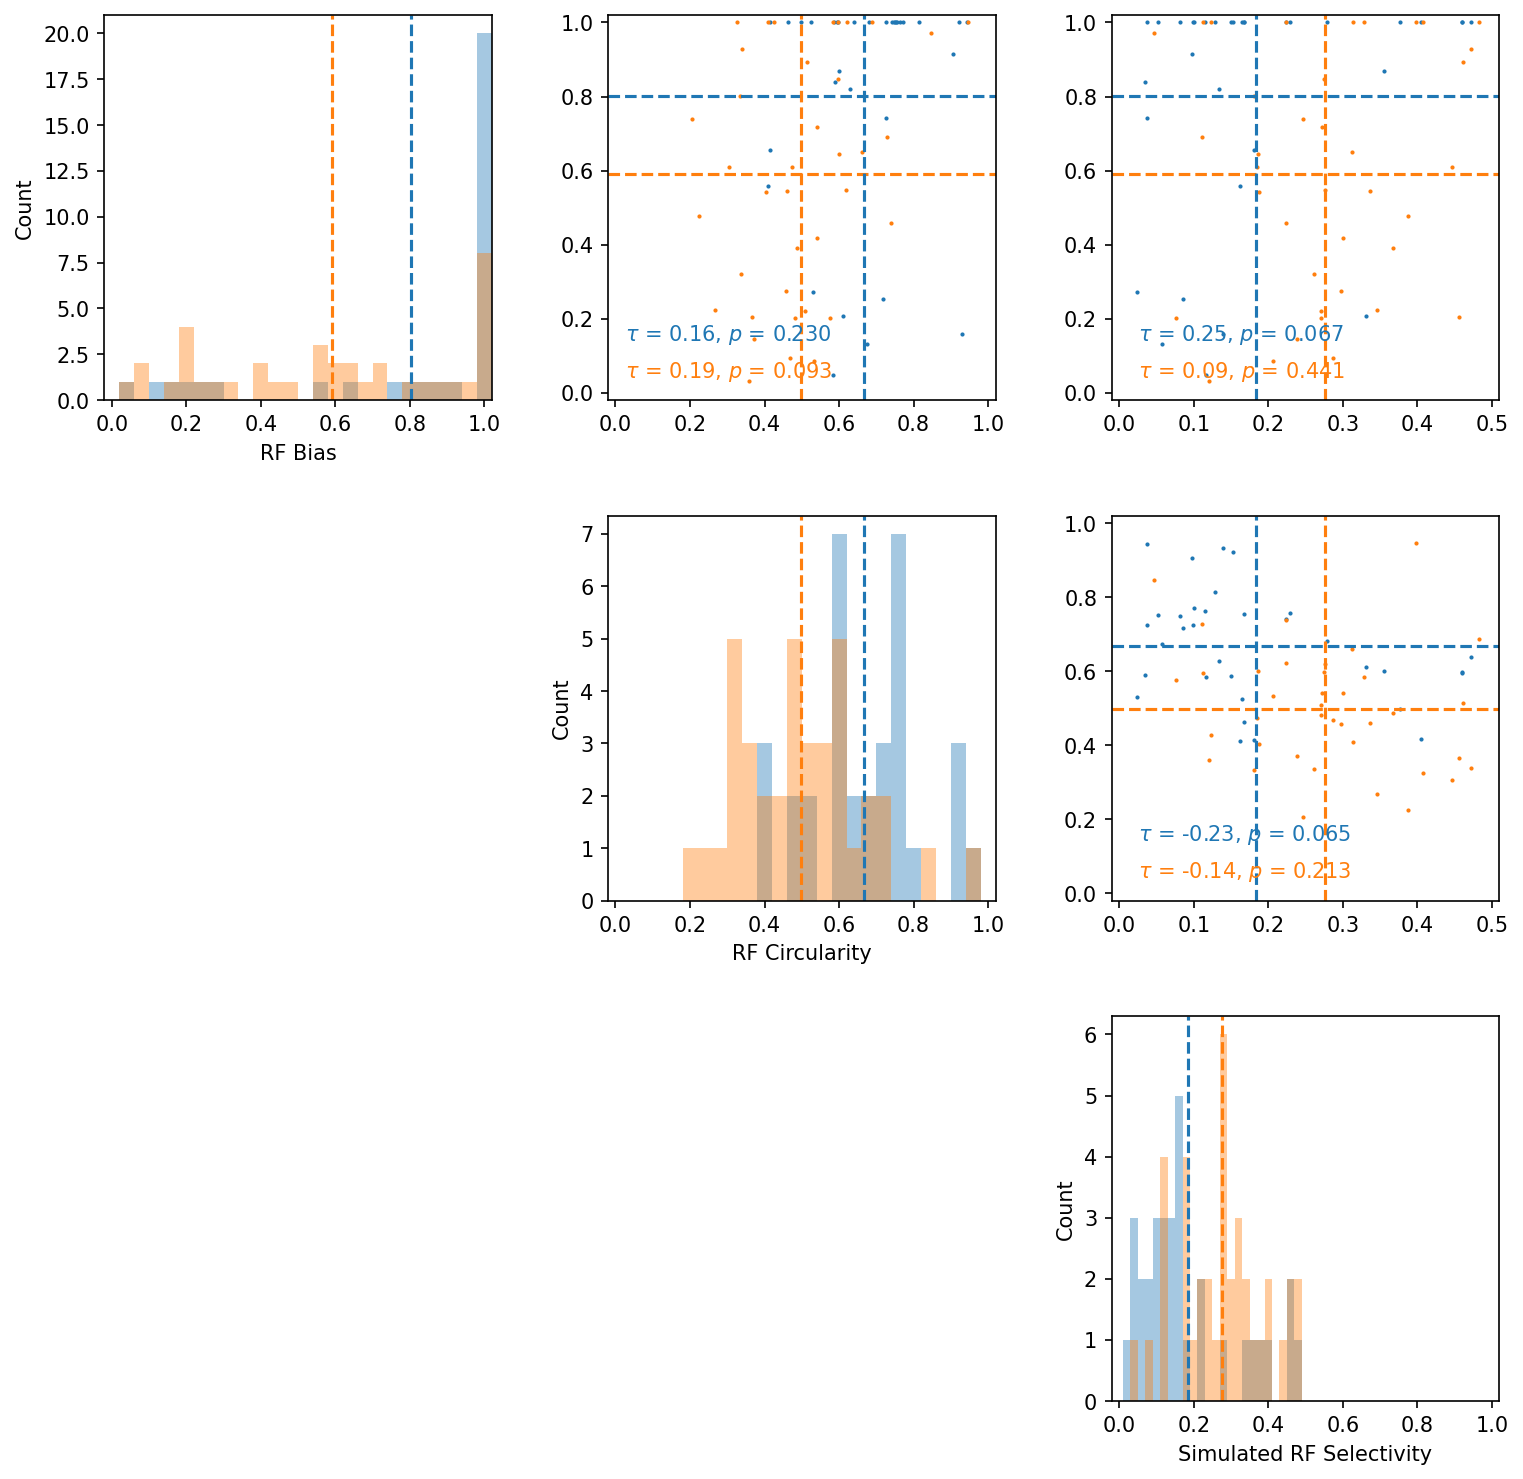

In [19]:
nbins = 25

fig,axs = plt.subplots(3,3,figsize=(12,12),dpi=150)
fig.subplots_adjust(wspace=0.3,hspace=0.3)

for i in range(3):
    for j in range(3):
        if j >= i: continue
        axs[i,j].set_axis_off()

axs[0,0].hist(naive_rf_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[0,0].hist(exper_rf_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(naive_rf_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(exper_rf_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[2,2].hist(naive_OS,np.linspace(-1/(4*nbins),0.5+1/(4*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[2,2].hist(exper_OS,np.linspace(-1/(4*nbins),0.5+1/(4*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[0,1].scatter(naive_rf_crc,naive_rf_bias,s=1)
axs[0,1].scatter(exper_rf_crc,exper_rf_bias,s=1)
axs[0,2].scatter(naive_OS,naive_rf_bias,s=1)
axs[0,2].scatter(exper_OS,exper_rf_bias,s=1)
axs[1,2].scatter(naive_OS,naive_rf_crc,s=1)
axs[1,2].scatter(exper_OS,exper_rf_crc,s=1)

axs[0,0].axvline(np.nanmean(naive_rf_bias),c='C0',ls='--')
axs[0,0].axvline(np.nanmean(exper_rf_bias),c='C1',ls='--')
axs[1,1].axvline(np.nanmean(naive_rf_crc),c='C0',ls='--')
axs[1,1].axvline(np.nanmean(exper_rf_crc),c='C1',ls='--')
axs[2,2].axvline(np.nanmean(naive_OS),c='C0',ls='--')
axs[2,2].axvline(np.nanmean(exper_OS),c='C1',ls='--')
axs[0,1].axhline(np.nanmean(naive_rf_bias),c='C0',ls='--')
axs[0,1].axhline(np.nanmean(exper_rf_bias),c='C1',ls='--')
axs[0,1].axvline(np.nanmean(naive_rf_crc),c='C0',ls='--')
axs[0,1].axvline(np.nanmean(exper_rf_crc),c='C1',ls='--')
axs[0,2].axhline(np.nanmean(naive_rf_bias),c='C0',ls='--')
axs[0,2].axhline(np.nanmean(exper_rf_bias),c='C1',ls='--')
axs[0,2].axvline(np.nanmean(naive_OS),c='C0',ls='--')
axs[0,2].axvline(np.nanmean(exper_OS),c='C1',ls='--')
axs[1,2].axhline(np.nanmean(naive_rf_crc),c='C0',ls='--')
axs[1,2].axhline(np.nanmean(exper_rf_crc),c='C1',ls='--')
axs[1,2].axvline(np.nanmean(naive_OS),c='C0',ls='--')
axs[1,2].axvline(np.nanmean(exper_OS),c='C1',ls='--')

taustat = kendalltau(naive_rf_crc,naive_rf_bias)
axs[0,1].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_rf_crc,exper_rf_bias)
axs[0,1].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_OS,naive_rf_bias)
axs[0,2].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_OS,exper_rf_bias)
axs[0,2].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

taustat = kendalltau(naive_OS,naive_rf_crc)
axs[1,2].text(0.025,0.125,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='bottom')
taustat = kendalltau(exper_OS,exper_rf_crc)
axs[1,2].text(0.025,0.025,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C1',ha='left',va='bottom')

axs[0,0].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[2,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,2].set_xlim(-1/(4*nbins),0.5+1/(4*nbins))
axs[0,2].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[1,2].set_xlim(-1/(4*nbins),0.5+1/(4*nbins))
axs[1,2].set_ylim(-1/(2*nbins),1+1/(2*nbins))

axs[0,0].set_xlabel('RF Bias')
axs[0,0].set_ylabel('Count')
axs[1,1].set_xlabel('RF Circularity')
axs[1,1].set_ylabel('Count')
axs[2,2].set_xlabel('Simulated RF Selectivity')
axs[2,2].set_ylabel('Count')

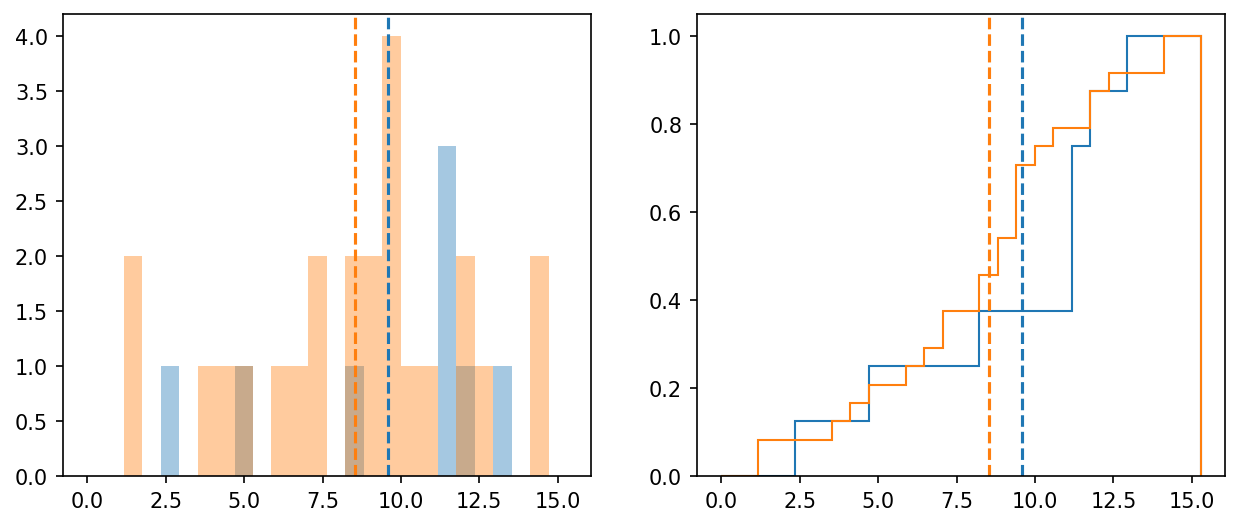

In [76]:
fig,axs = plt.subplots(1,2,figsize=(10,4),dpi=150)

axs[0].hist(naive_rf_dist,np.linspace(-1/(2*nbins),15+15/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[0].hist(exper_rf_dist,np.linspace(-1/(2*nbins),15+15/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')

axs[1].hist(naive_rf_dist,np.linspace(-1/(2*nbins),15+15/(2*nbins),2+nbins),density=True,cumulative=True,histtype='step')
axs[1].hist(exper_rf_dist,np.linspace(-1/(2*nbins),15+15/(2*nbins),2+nbins),density=True,cumulative=True,histtype='step')

axs[0].axvline(np.nanmean(naive_rf_dist),c='C0',ls='--')
axs[0].axvline(np.nanmean(exper_rf_dist),c='C1',ls='--')
axs[1].axvline(np.nanmean(naive_rf_dist),c='C0',ls='--')
axs[1].axvline(np.nanmean(exper_rf_dist),c='C1',ls='--')

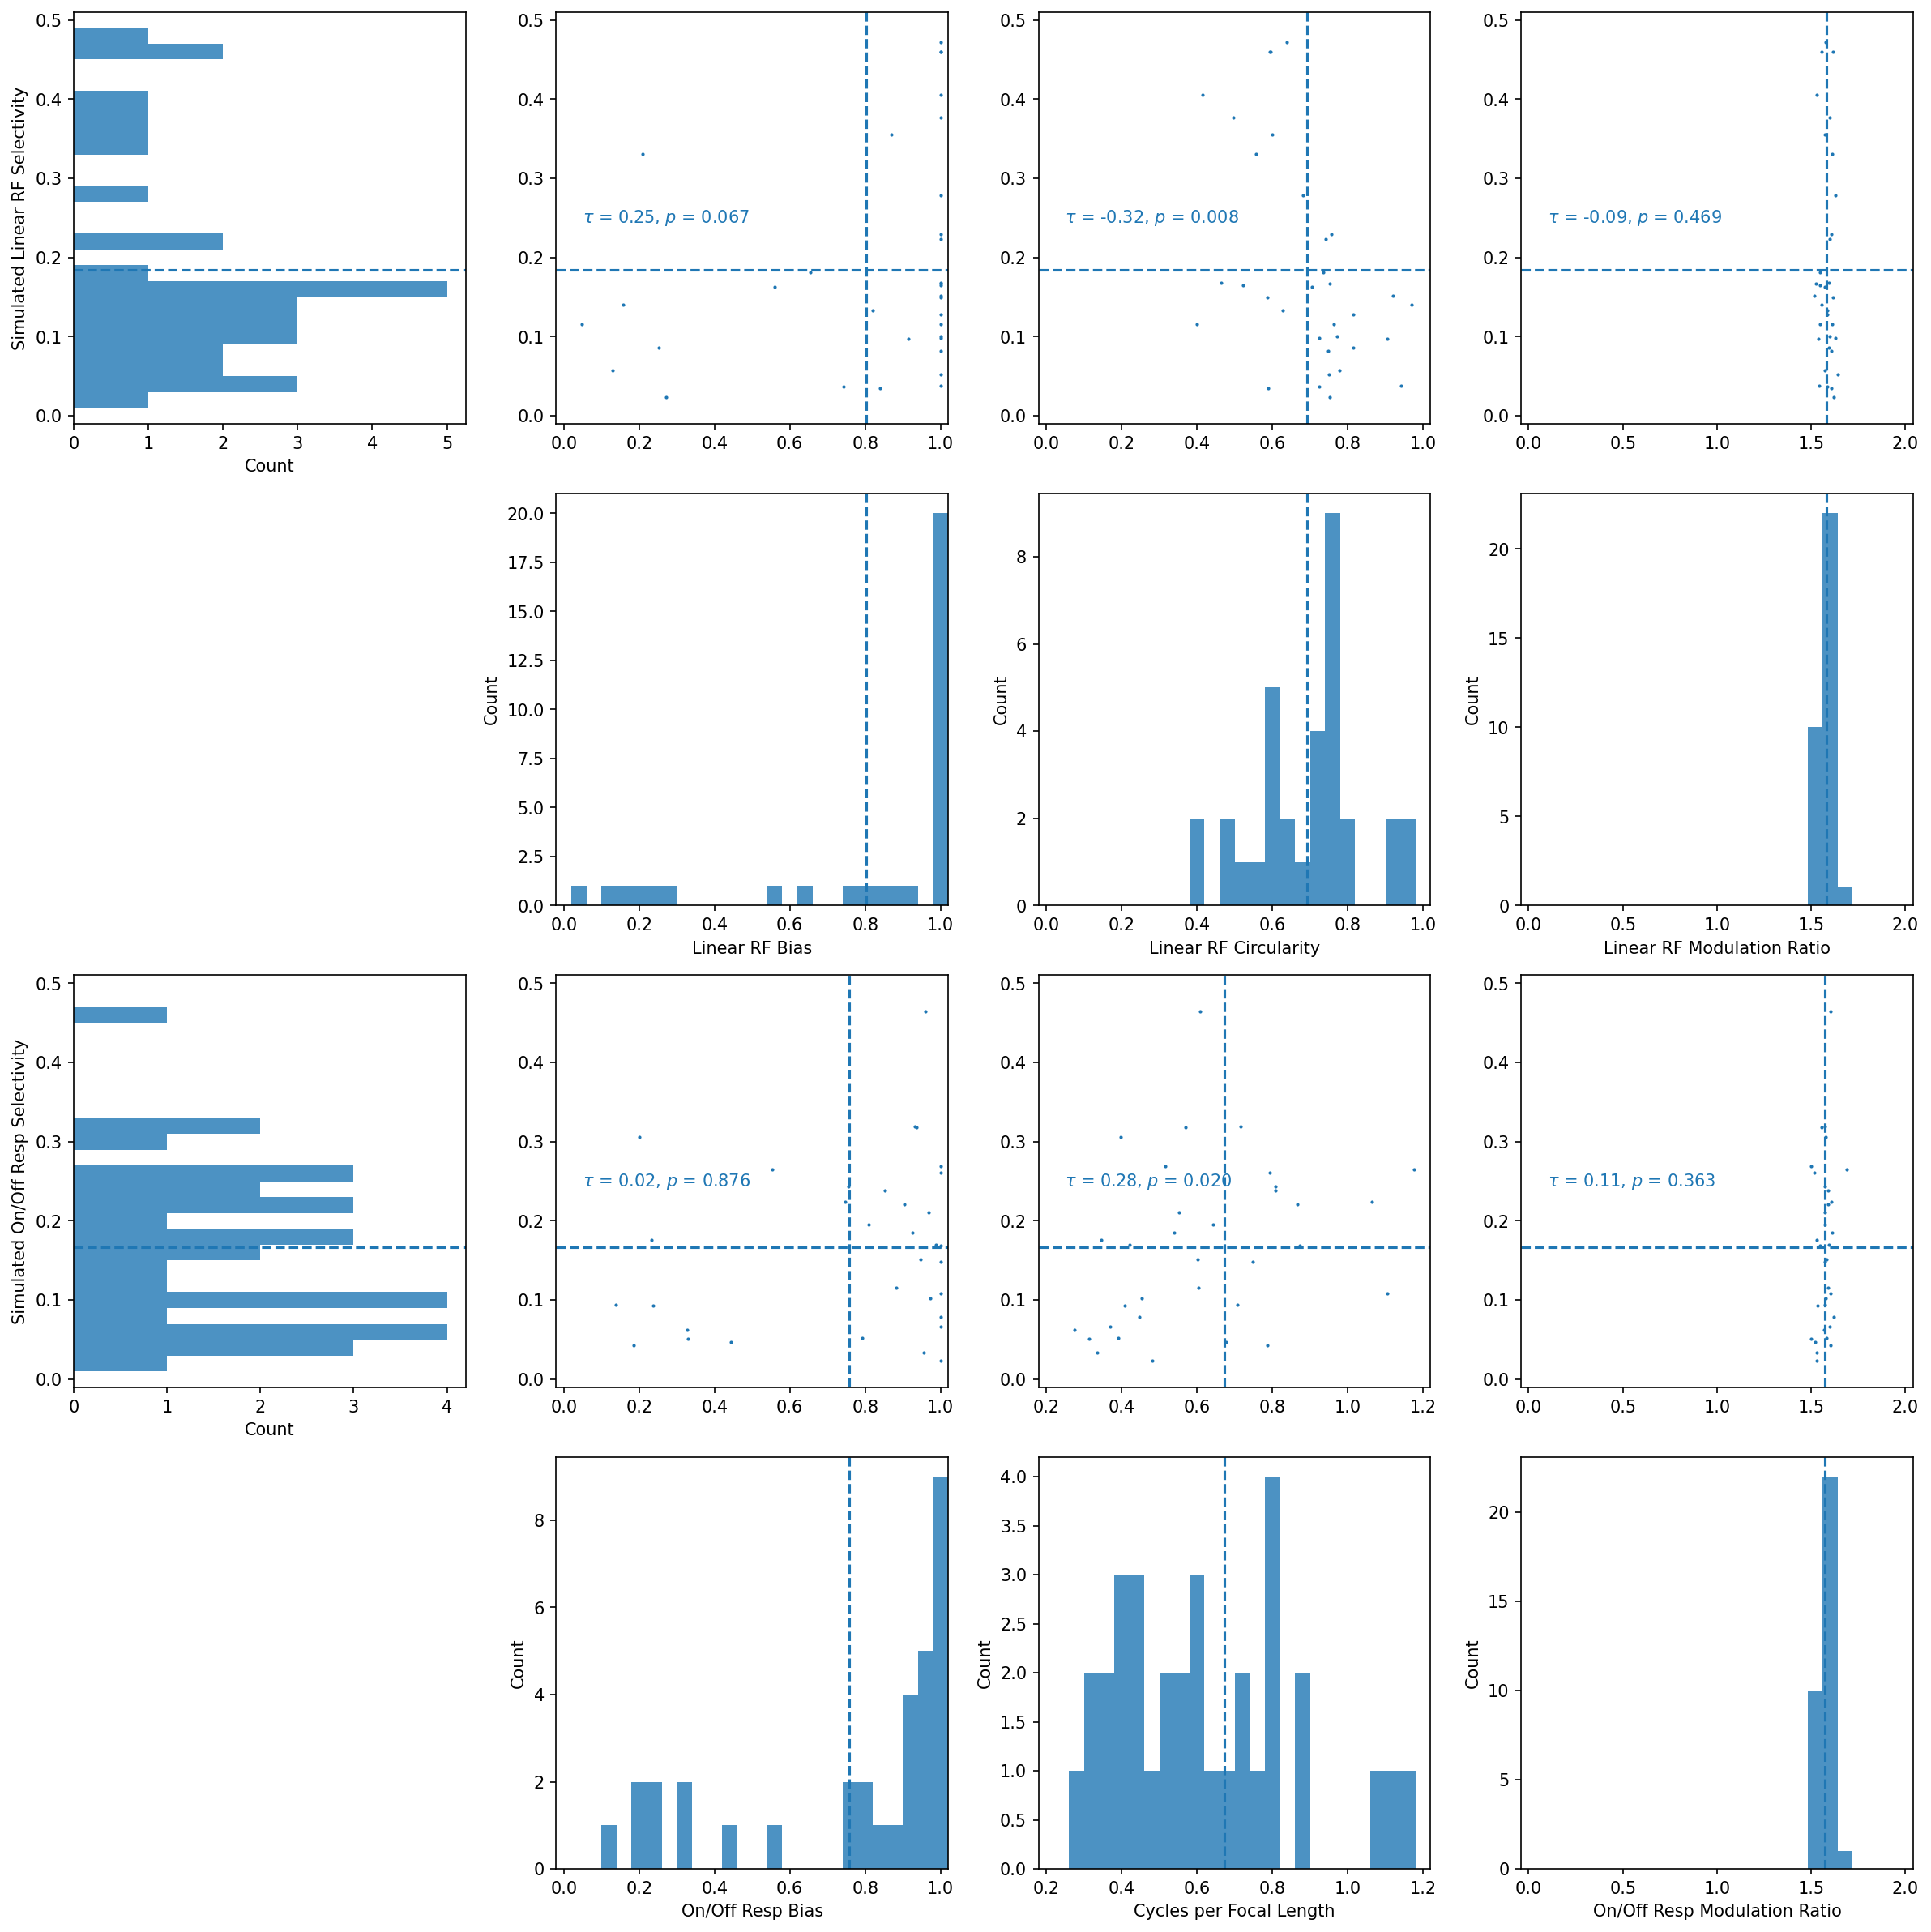

In [71]:
nbins = 25

fig,axs = plt.subplots(4,4,figsize=(16,16),dpi=150)
fig.subplots_adjust(wspace=0.3,hspace=0.3)

axs[1,0].set_axis_off()
axs[3,0].set_axis_off()

axs[1,1].hist(naive_rf_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.8,histtype='stepfilled')
axs[1,2].hist(naive_rf_bigcrc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.8,histtype='stepfilled')
axs[1,3].hist(naive_RF_MR,np.linspace(-2/(2*nbins),2+2/(2*nbins),2+nbins),alpha=0.8,histtype='stepfilled')
axs[0,0].hist(naive_RF_OS,np.linspace(-1/(4*nbins),0.5+1/(4*nbins),2+nbins),alpha=0.8,histtype='stepfilled',
              orientation='horizontal')
axs[0,1].scatter(naive_rf_bias,naive_RF_OS,s=1)
axs[0,2].scatter(naive_rf_bigcrc,naive_RF_OS,s=1)
axs[0,3].scatter(naive_RF_MR,naive_RF_OS,s=1)
axs[3,1].hist(naive_sr_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.8,histtype='stepfilled')
axs[3,2].hist(naive_bigfl*freq,np.linspace(0.2-1/(2*nbins),1.2+1/(2*nbins),2+nbins),alpha=0.8,histtype='stepfilled')
axs[3,3].hist(naive_SR_MR,np.linspace(-2/(2*nbins),2+2/(2*nbins),2+nbins),alpha=0.8,histtype='stepfilled')
axs[2,0].hist(naive_SR_OS,np.linspace(-1/(4*nbins),0.5+1/(4*nbins),2+nbins),alpha=0.8,histtype='stepfilled',
              orientation='horizontal')
axs[2,1].scatter(naive_sr_bias,naive_SR_OS,s=1)
axs[2,2].scatter(naive_bigfl*freq,naive_SR_OS,s=1)
axs[2,3].scatter(naive_SR_MR,naive_SR_OS,s=1)

axs[1,1].axvline(np.nanmean(naive_rf_bias),c='C0',ls='--')
axs[1,2].axvline(np.nanmean(naive_rf_bigcrc),c='C0',ls='--')
axs[1,3].axvline(np.nanmean(naive_RF_MR),c='C0',ls='--')
axs[0,0].axhline(np.nanmean(naive_RF_OS),c='C0',ls='--')
axs[0,1].axvline(np.nanmean(naive_rf_bias),c='C0',ls='--')
axs[0,1].axhline(np.nanmean(naive_RF_OS),c='C0',ls='--')
axs[0,2].axvline(np.nanmean(naive_rf_bigcrc),c='C0',ls='--')
axs[0,2].axhline(np.nanmean(naive_RF_OS),c='C0',ls='--')
axs[0,3].axvline(np.nanmean(naive_RF_MR),c='C0',ls='--')
axs[0,3].axhline(np.nanmean(naive_RF_OS),c='C0',ls='--')
axs[3,1].axvline(np.nanmean(naive_sr_bias),c='C0',ls='--')
axs[3,2].axvline(np.nanmean(naive_sr_crc),c='C0',ls='--')
axs[3,3].axvline(np.nanmean(naive_SR_MR),c='C0',ls='--')
axs[2,0].axhline(np.nanmean(naive_SR_OS),c='C0',ls='--')
axs[2,1].axvline(np.nanmean(naive_sr_bias),c='C0',ls='--')
axs[2,1].axhline(np.nanmean(naive_SR_OS),c='C0',ls='--')
axs[2,2].axvline(np.nanmean(naive_sr_crc),c='C0',ls='--')
axs[2,2].axhline(np.nanmean(naive_SR_OS),c='C0',ls='--')
axs[2,3].axvline(np.nanmean(naive_SR_MR),c='C0',ls='--')
axs[2,3].axhline(np.nanmean(naive_SR_OS),c='C0',ls='--')

taustat = kendalltau(naive_RF_OS,naive_rf_bias)
axs[0,1].text(0.05,0.25,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='center')
taustat = kendalltau(naive_RF_OS,naive_rf_bigcrc)
axs[0,2].text(0.05,0.25,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='center')
taustat = kendalltau(naive_RF_OS,naive_RF_MR)
axs[0,3].text(0.1,0.25,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='center')
taustat = kendalltau(naive_SR_OS,naive_sr_bias)
axs[2,1].text(0.05,0.25,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='center')
taustat = kendalltau(naive_SR_OS,naive_bigfl*freq)
axs[2,2].text(0.25,0.25,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='center')
taustat = kendalltau(naive_SR_OS,naive_SR_MR)
axs[2,3].text(0.1,0.25,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
              color='C0',ha='left',va='center')

axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,3].set_xlim(-2/(2*nbins),2+2/(2*nbins))
axs[0,0].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[0,1].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,2].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[0,2].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,3].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[0,3].set_xlim(-2/(2*nbins),2+2/(2*nbins))
axs[3,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[3,2].set_xlim(0.2+-1/(2*nbins),1.2+1/(2*nbins))
axs[3,3].set_xlim(-2/(2*nbins),2+2/(2*nbins))
axs[2,0].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[2,1].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[2,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[2,2].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[2,2].set_xlim(0.2+-1/(2*nbins),1.2+1/(2*nbins))
axs[2,3].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[2,3].set_xlim(-2/(2*nbins),2+2/(2*nbins))

axs[1,1].set_xlabel('Linear RF Bias')
axs[1,1].set_ylabel('Count')
axs[1,2].set_xlabel('Linear RF Circularity')
axs[1,2].set_ylabel('Count')
axs[1,3].set_xlabel('Linear RF Modulation Ratio')
axs[1,3].set_ylabel('Count')
axs[0,0].set_ylabel('Simulated Linear RF Selectivity')
axs[0,0].set_xlabel('Count')
axs[3,1].set_xlabel('On/Off Resp Bias')
axs[3,1].set_ylabel('Count')
axs[3,2].set_xlabel('Cycles per Focal Length')
axs[3,2].set_ylabel('Count')
axs[3,3].set_xlabel('On/Off Resp Modulation Ratio')
axs[3,3].set_ylabel('Count')
axs[2,0].set_ylabel('Simulated On/Off Resp Selectivity')
axs[2,0].set_xlabel('Count')

fig.tight_layout()
fig.savefig('./l4_rf_corr.pdf')

In [63]:
print(np.min(naive_bigfl*freq),np.max(naive_bigfl*freq))
print(np.min(exper_bigfl*freq),np.max(exper_bigfl*freq))

0.2760423329736536 1.1751548022020806
0.11030760497310621 1.0818972253423327


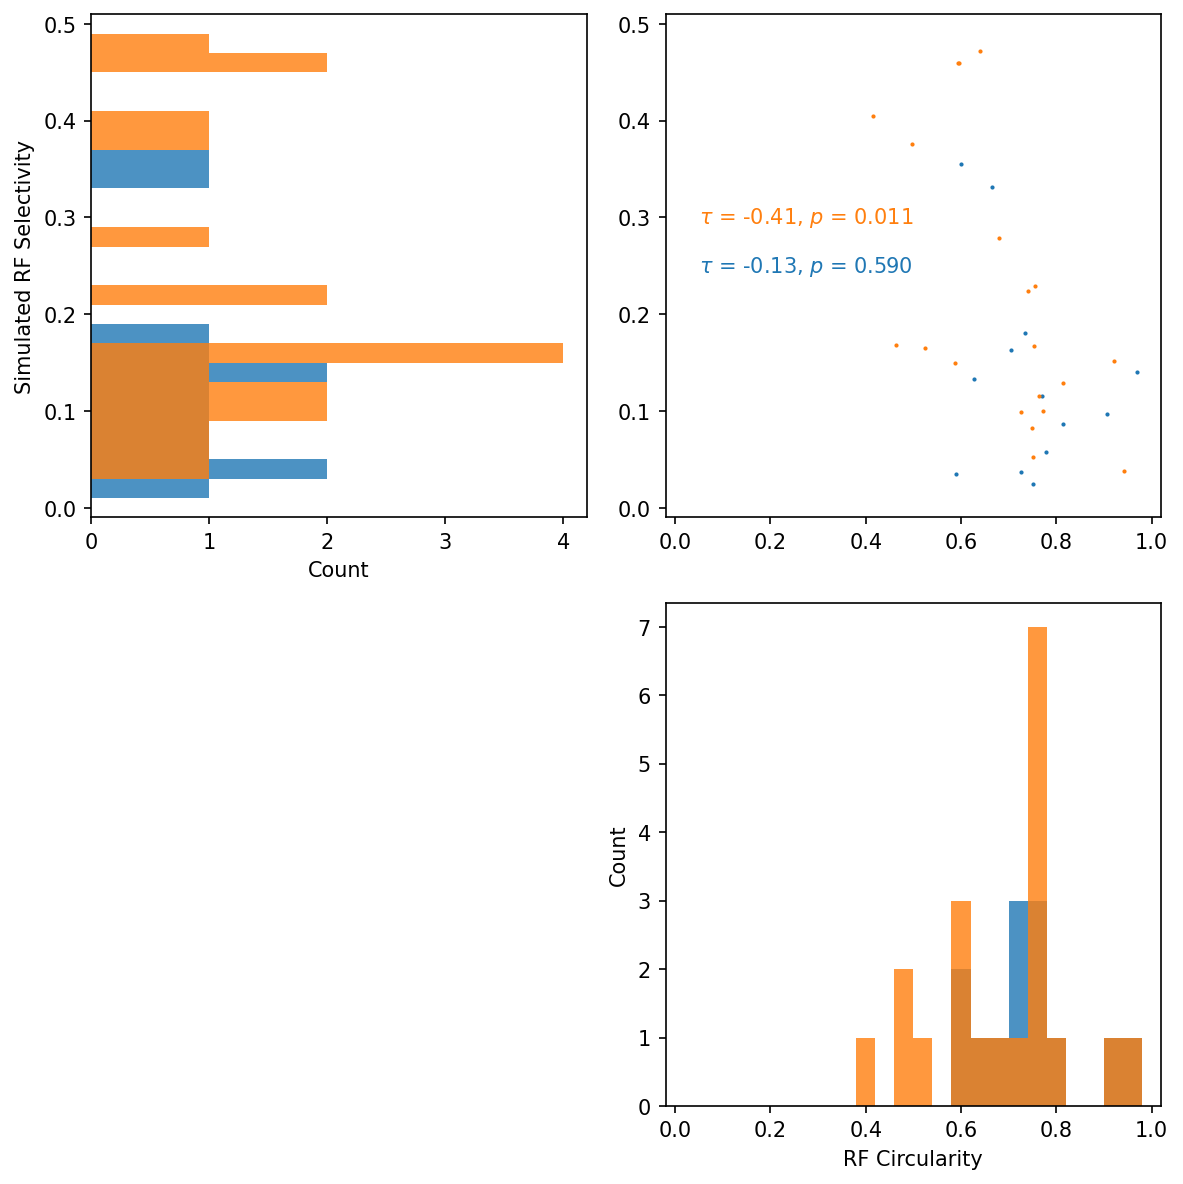

In [27]:
nbins = 25

fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=150)
fig.subplots_adjust(wspace=0.3,hspace=0.3)

axs[1,0].set_axis_off()

bias_bins = [0,0.999,1]

for i in range(len(bias_bins)-1):
    this_idxs = np.logical_and(naive_rf_bias>bias_bins[i],naive_rf_bias<=bias_bins[i+1])
    
    axs[1,1].hist(naive_rf_crc[this_idxs],np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.8,histtype='barstacked')
    axs[0,0].hist(naive_RF_OS[this_idxs],np.linspace(-1/(4*nbins),0.5+1/(4*nbins),2+nbins),alpha=0.8,histtype='stepfilled',
                orientation='horizontal')
    axs[0,1].scatter(naive_rf_crc[this_idxs],naive_RF_OS[this_idxs],s=1)

    # axs[1,1].axvline(np.nanmean(naive_rf_crc[this_idxs]),c='C{:d}'.format(i),ls='--')
    # axs[0,0].axhline(np.nanmean(naive_RF_OS[this_idxs]),c='C{:d}'.format(i),ls='--')
    # axs[0,1].axvline(np.nanmean(naive_rf_crc[this_idxs]),c='C{:d}'.format(i),ls='--')
    # axs[0,1].axhline(np.nanmean(naive_RF_OS[this_idxs]),c='C{:d}'.format(i),ls='--')

    taustat = kendalltau(naive_RF_OS[this_idxs],naive_rf_crc[this_idxs])
    axs[0,1].text(0.05,0.25+0.05*i,r'$\tau$ = {:.2f}, $p$ = {:.3f}'.format(taustat.statistic,taustat.pvalue),
                color='C{:d}'.format(i),ha='left',va='center')

axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[0,0].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[0,1].set_ylim(-1/(4*nbins),0.5+1/(4*nbins))
axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))

axs[1,1].set_xlabel('RF Circularity')
axs[1,1].set_ylabel('Count')
axs[0,0].set_ylabel('Simulated RF Selectivity')
axs[0,0].set_xlabel('Count')

fig.tight_layout()
fig.savefig('./l4_rf_corr_2.pdf')

In [47]:
from scipy.optimize import curve_fit
from scipy.stats import chisquare
from numpy.polynomial import Polynomial

print('fitting bias vs OS')
for n in range(1,2+1):
    fit = Polynomial.fit(naive_bias,naive_OS,deg=n)
    res = fit(naive_bias) - naive_OS
    print(fit)
    print('n = {:d}, R^2 = {:f}'.format(n,1-(np.linalg.norm(res)/np.linalg.norm(naive_OS - np.mean(naive_OS)))**2))

print('fitting circ vs OS')
for n in range(1,2+1):
    fit = Polynomial.fit(naive_crc,naive_OS,deg=n)
    res = fit(naive_crc) - naive_OS
    print(fit)
    print('n = {:d}, R^2 = {:f}'.format(n,1-(np.linalg.norm(res)/np.linalg.norm(naive_OS - np.mean(naive_OS)))**2))

fitting bias vs OS
0.17846734 + 0.01294961·x
n = 1, R^2 = 0.004663
0.17363614 + 0.01153013·x + 0.0081329·x²
n = 2, R^2 = 0.004969
fitting circ vs OS
0.18896561 - 0.0476615·x
n = 1, R^2 = 0.037774
0.1843965 - 0.04633255·x + 0.01487799·x²
n = 2, R^2 = 0.038905


In [40]:
from scipy.stats import ks_2samp

ks_2samp(np.concatenate(([0.5],np.linspace(0.05,0.25,20))),naive_OS)

KstestResult(statistic=0.19480519480519481, pvalue=0.6389827491457373, statistic_location=0.25, statistic_sign=1)

In [19]:
naive_rf_crc[np.where(np.array(naive_OS) > 0.4)[0]]

array([0.59637351, 0.59440608, 0.6391985 , 0.41565347])

[22]


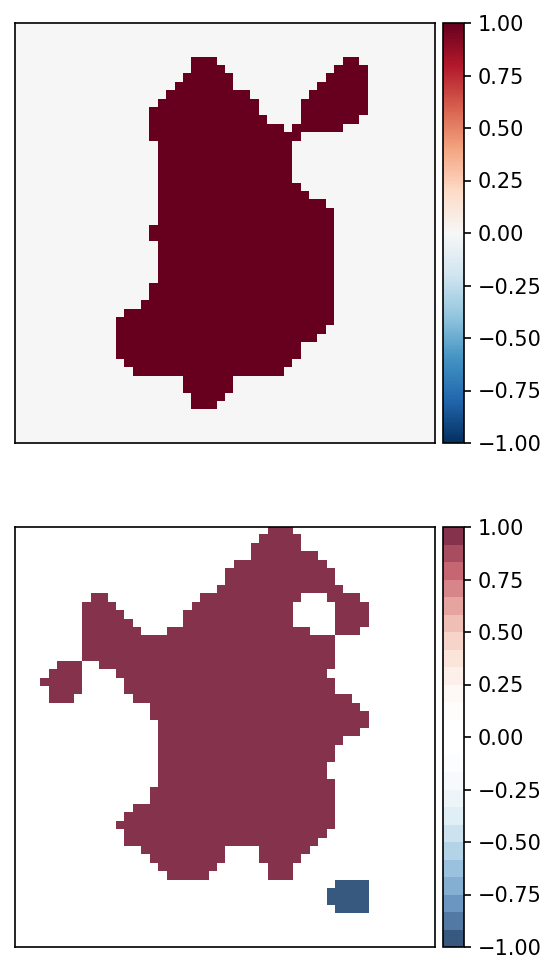

In [97]:
cell_idxs = np.where(np.array(naive_SR_OS) > 0.4)[0]
print(cell_idxs)

fig,axs = plt.subplots(2,len(cell_idxs),figsize=(5*len(cell_idxs),8),dpi=150)
if axs.ndim==1:
    axs = axs[:,None]

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[0,idx],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.doubimshbar(fig,axs[1,idx],naive_ON_Rsp[cell_idx],-naive_OF_Rsp[cell_idx],vmin=-1,vmax=1)

[1 6 8]


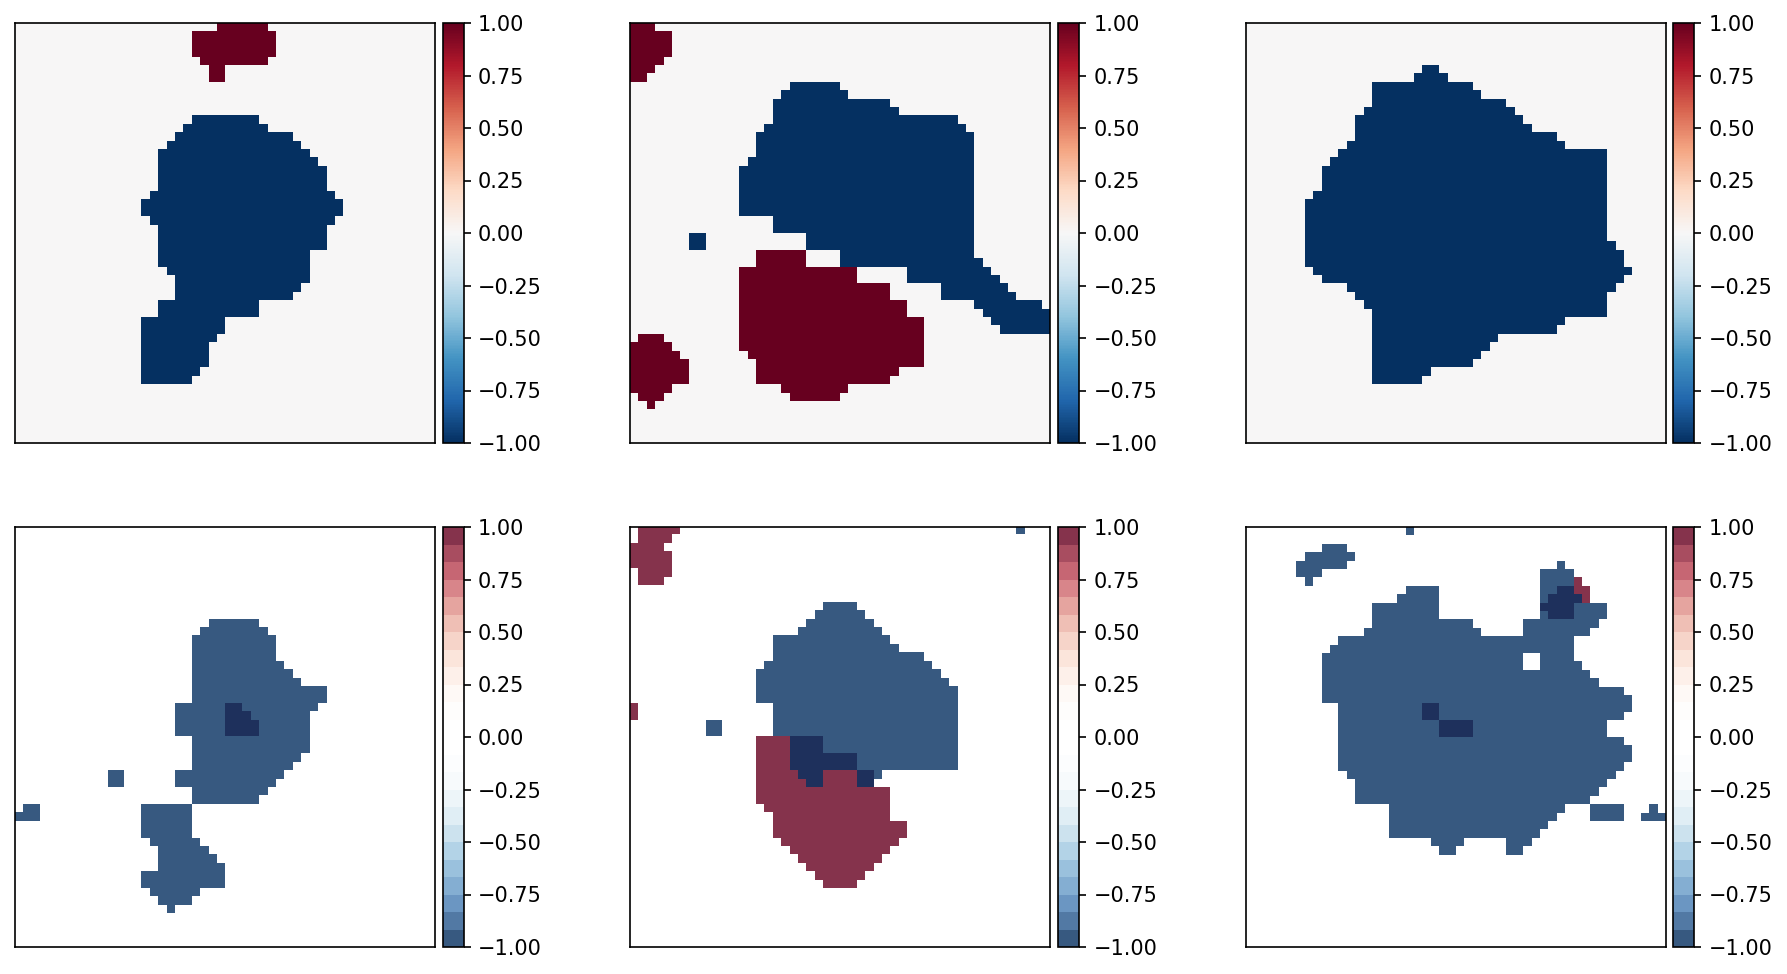

In [96]:
cell_idxs = np.where(np.logical_and(np.array(naive_SR_OS) > 0.3,np.array(naive_SR_OS) < 0.4))[0]
print(cell_idxs)

fig,axs = plt.subplots(2,len(cell_idxs),figsize=(5*len(cell_idxs),8),dpi=150)
if axs.ndim==1:
    axs = axs[:,None]

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[0,idx],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.doubimshbar(fig,axs[1,idx],naive_ON_Rsp[cell_idx],-naive_OF_Rsp[cell_idx],vmin=-1,vmax=1)

[14 22 23 29]


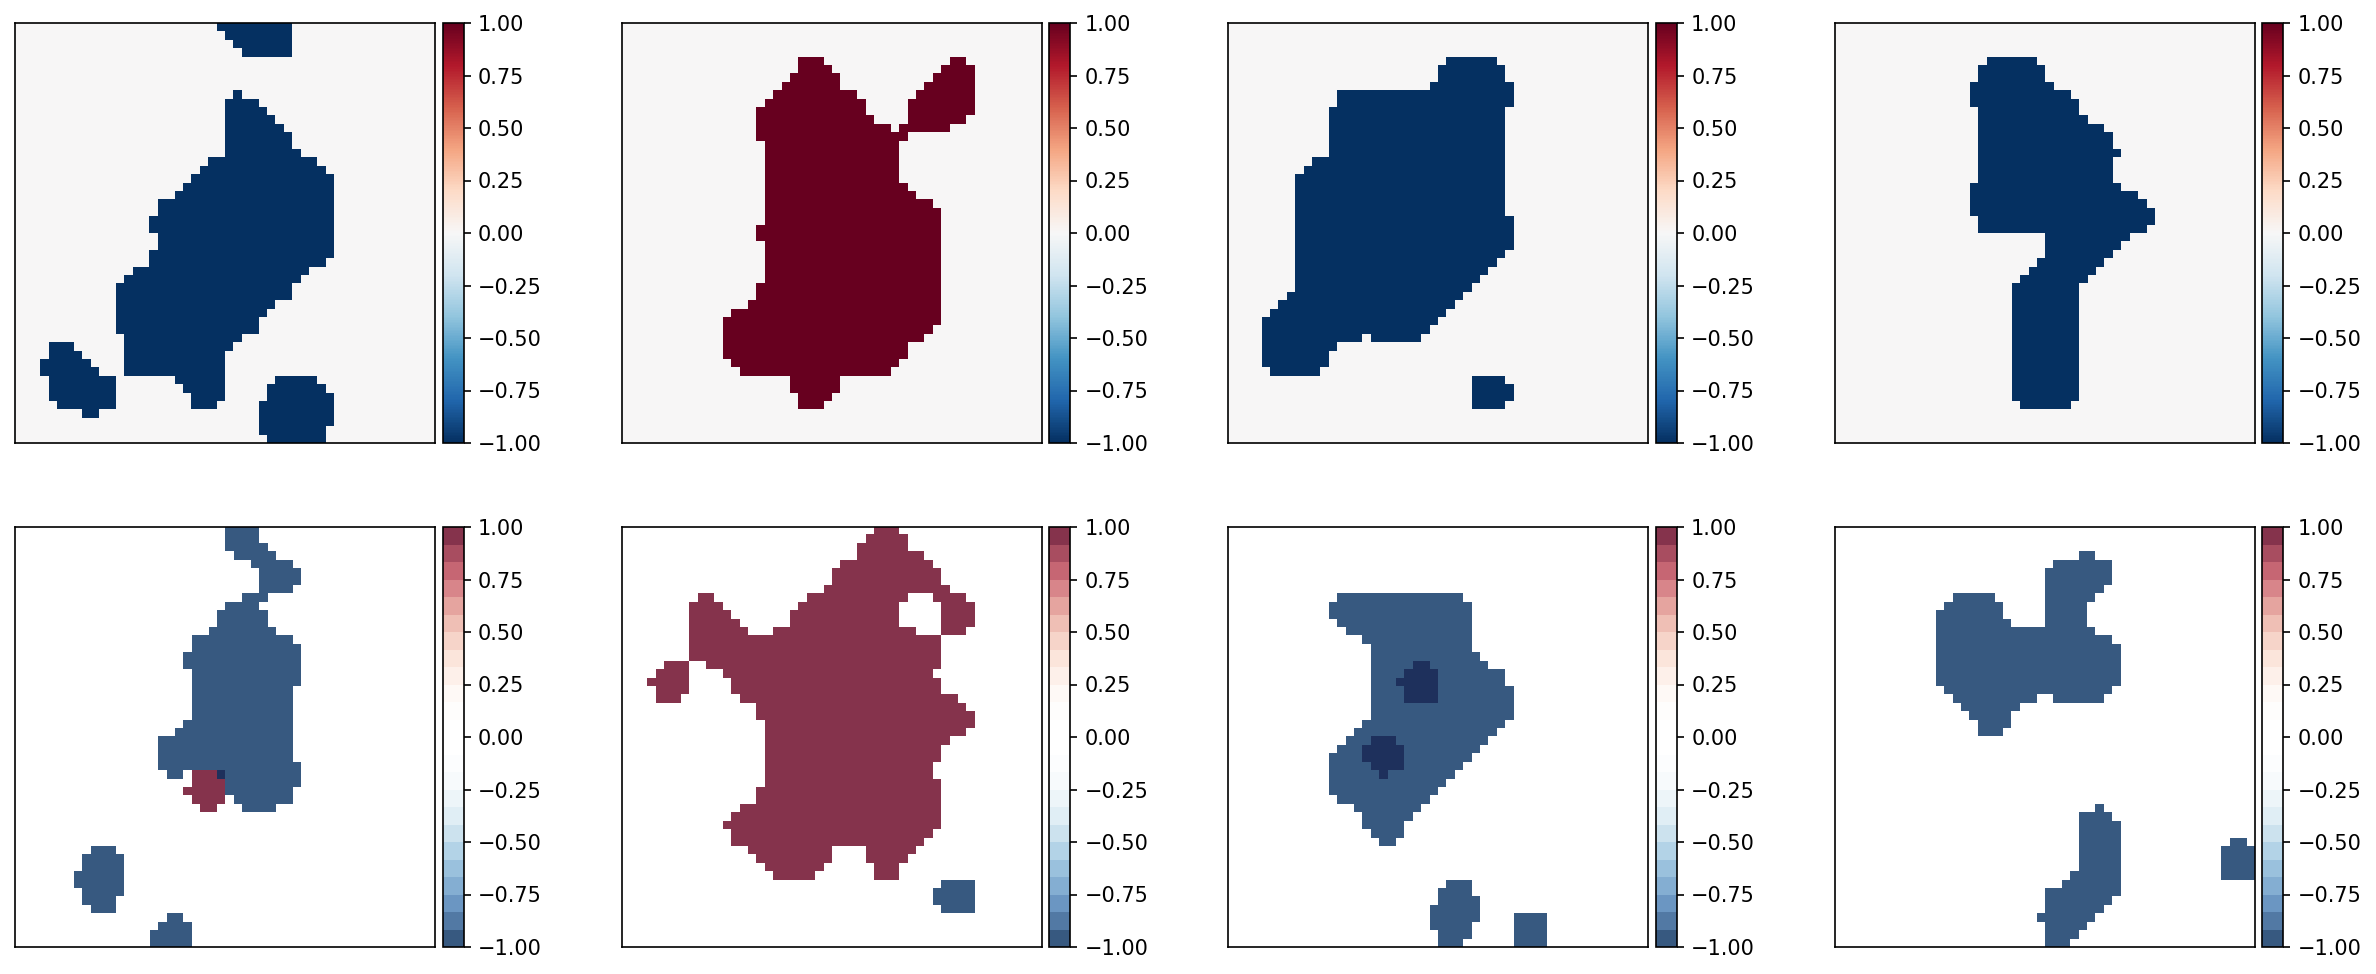

In [75]:
cell_idxs = np.where(np.array(naive_RF_OS) > 0.4)[0]
print(cell_idxs)

fig,axs = plt.subplots(2,len(cell_idxs),figsize=(5*len(cell_idxs),8),dpi=150)
if axs.ndim==1:
    axs = axs[:,None]

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[0,idx],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.doubimshbar(fig,axs[1,idx],naive_ON_Rsp[cell_idx],-naive_OF_Rsp[cell_idx],vmin=-1,vmax=1)

[ 0  6 25]


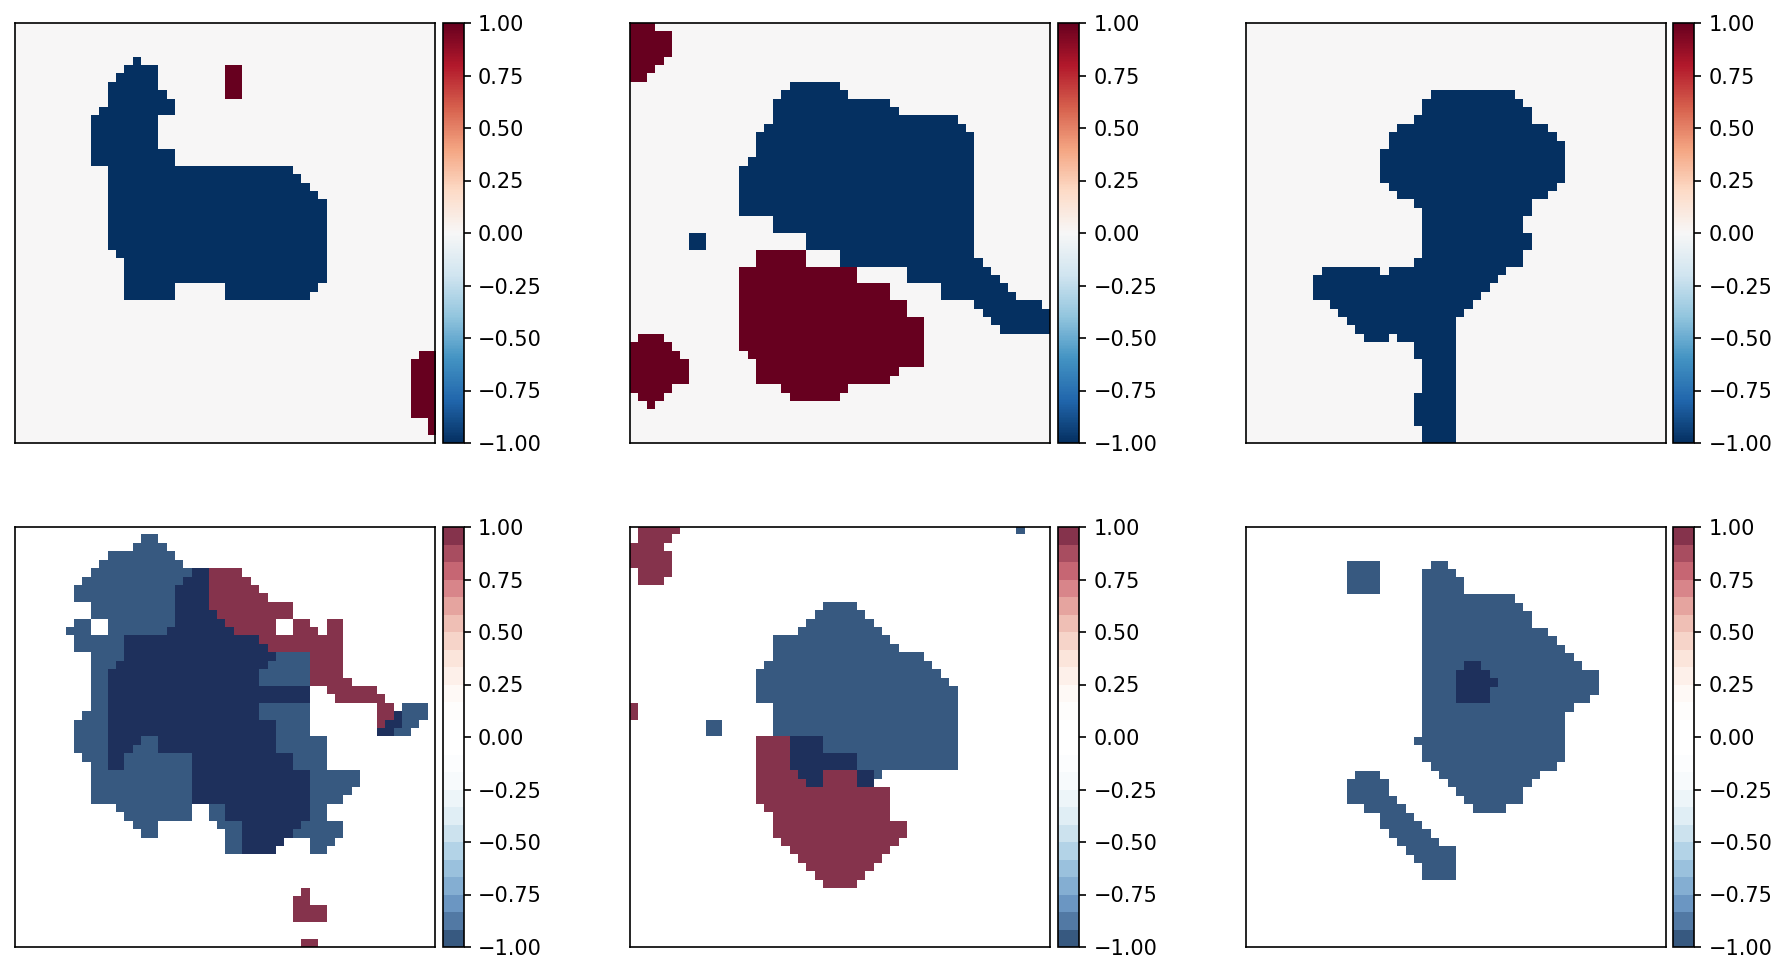

In [157]:
cell_idxs = np.where(np.logical_and(np.array(naive_RF_OS) > 0.3,np.array(naive_RF_OS) < 0.4))[0]
print(cell_idxs)

fig,axs = plt.subplots(2,len(cell_idxs),figsize=(5*len(cell_idxs),8),dpi=150)
if axs.ndim==1:
    axs = axs[:,None]

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[0,idx],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.doubimshbar(fig,axs[1,idx],naive_ON_Rsp[cell_idx],-naive_OF_Rsp[cell_idx],vmin=-1,vmax=1)

[18 20 31]


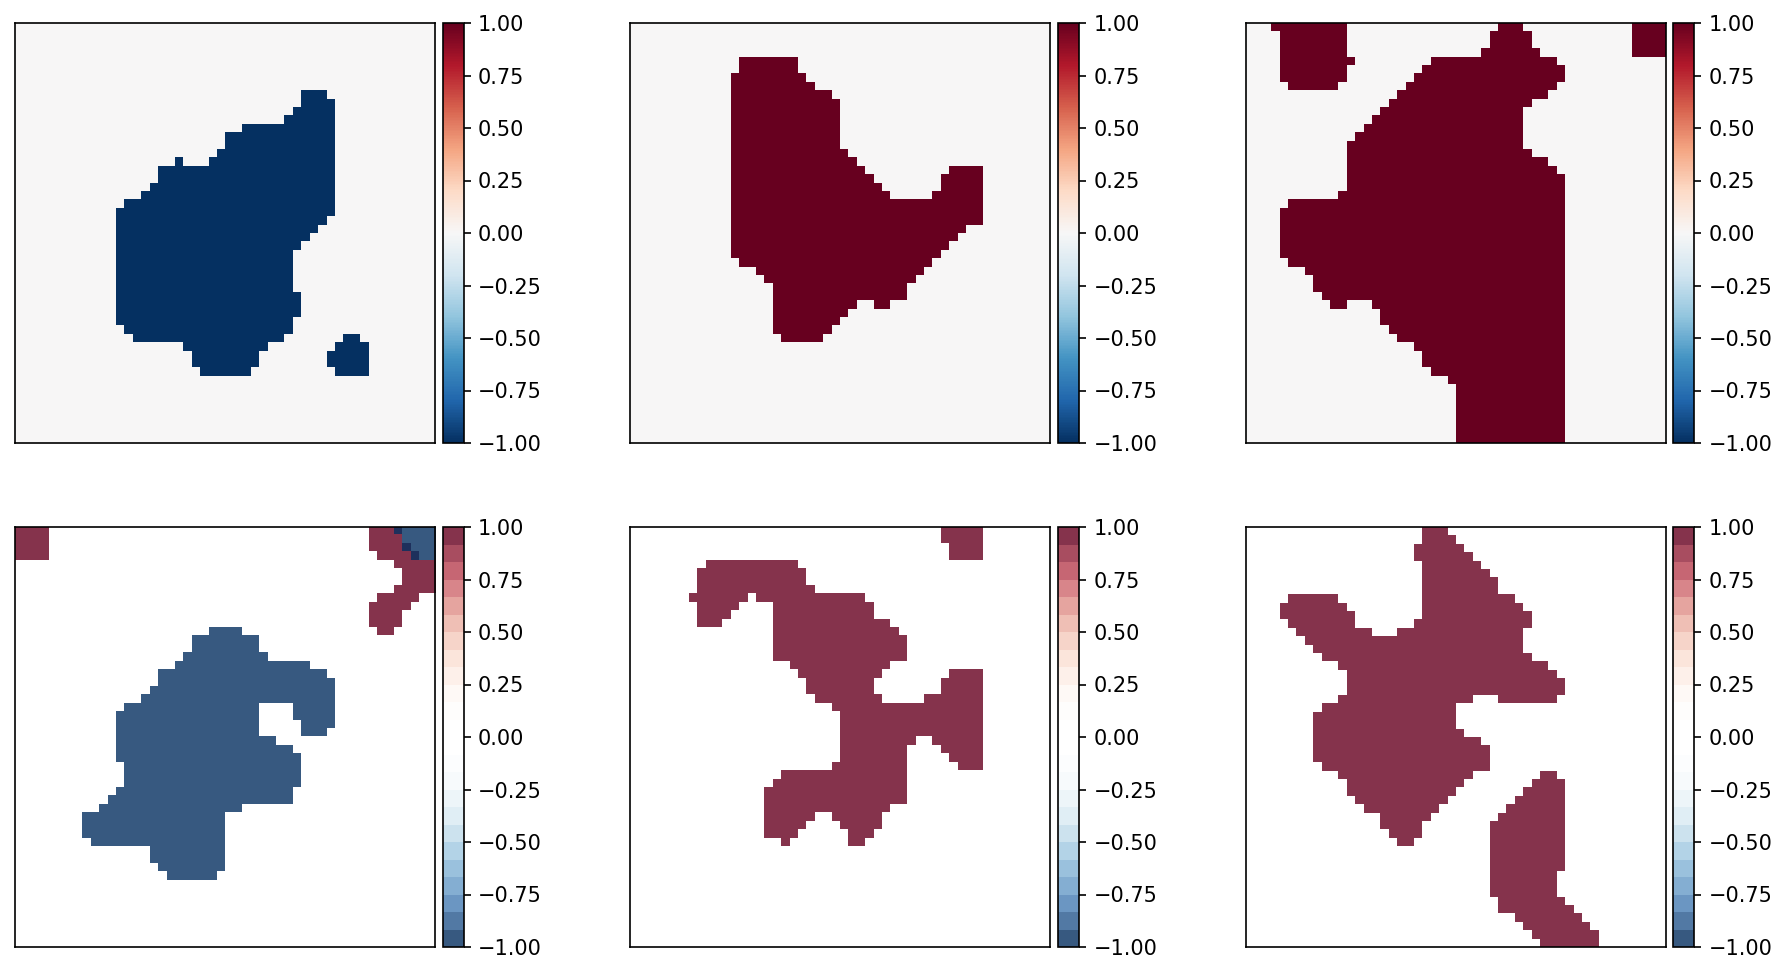

In [158]:
cell_idxs = np.where(np.logical_and(np.array(naive_OS) > 0.2,np.array(naive_OS) < 0.3))[0]
print(cell_idxs)

fig,axs = plt.subplots(2,len(cell_idxs),figsize=(5*len(cell_idxs),8),dpi=150)
if axs.ndim==1:
    axs = axs[:,None]

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[0,idx],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.doubimshbar(fig,axs[1,idx],naive_ON_Rsp[cell_idx],-naive_OF_Rsp[cell_idx],vmin=-1,vmax=1)

[22]


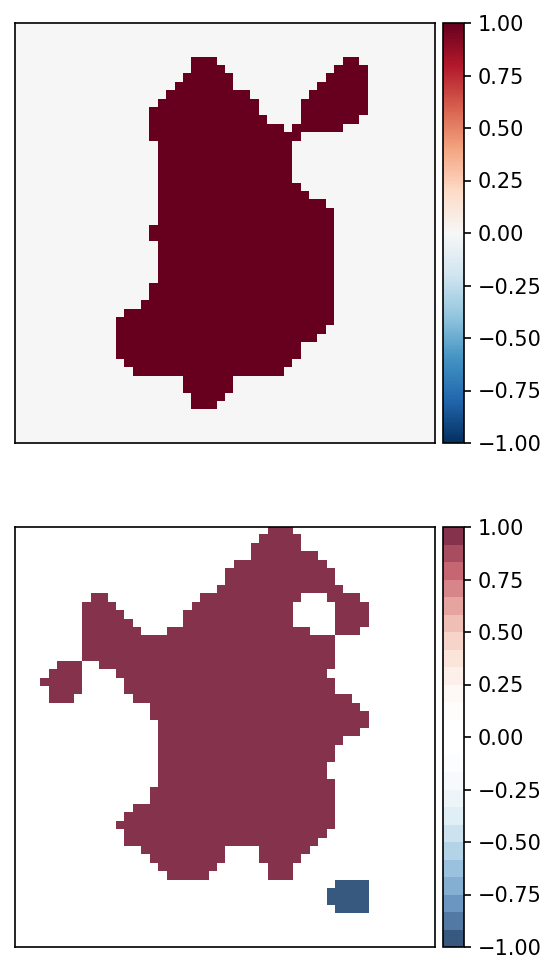

In [35]:
cell_idxs = np.where(np.array(naive_SR_OS) > 0.4)[0]
print(cell_idxs)

fig,axs = plt.subplots(2,len(cell_idxs),figsize=(5*len(cell_idxs),8),dpi=150)
if axs.ndim == 1:
    axs = axs.reshape((-1,1))

for idx,cell_idx in enumerate(cell_idxs):
    pf.imshowbar(fig,axs[0,idx],naive_RF_ON[cell_idx] - naive_RF_OF[cell_idx],
                 cmap='RdBu_r',vmin=-1,vmax=1)
    pf.doubimshbar(fig,axs[1,idx],naive_ON_Rsp[cell_idx],-naive_OF_Rsp[cell_idx],vmin=-1,vmax=1)

Text(0, 0.5, 'Count')

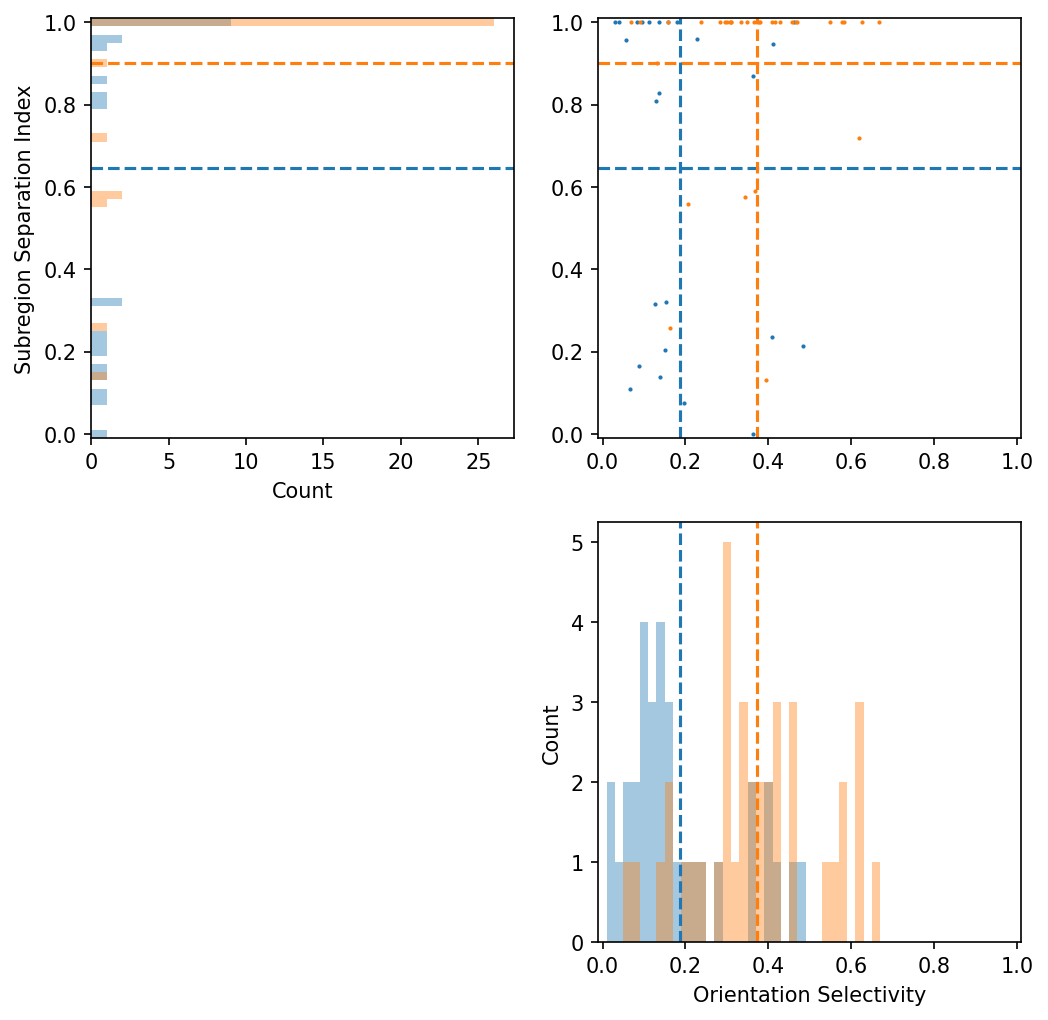

In [707]:
nbins = 50

fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=150)

axs[1,0].set_axis_off()

axs[0,0].hist(naive_sepr,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled',orientation="horizontal")
axs[0,0].hist(exper_sepr,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled',orientation="horizontal")
axs[0,1].scatter(naive_OS,naive_sepr,s=1)
axs[0,1].scatter(exper_OS,exper_sepr,s=1)
axs[1,1].hist(naive_OS,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(exper_OS,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')

axs[0,0].axhline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[0,0].axhline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[0,1].axhline(np.nanmean(naive_sepr),c='C0',ls='--')
axs[0,1].axhline(np.nanmean(exper_sepr),c='C1',ls='--')
axs[0,1].axvline(np.nanmean(naive_OS),c='C0',ls='--')
axs[0,1].axvline(np.nanmean(exper_OS),c='C1',ls='--')
axs[1,1].axvline(np.nanmean(naive_OS),c='C0',ls='--')
axs[1,1].axvline(np.nanmean(exper_OS),c='C1',ls='--')

axs[0,0].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))

axs[0,0].set_ylabel('Subregion Separation Index')
axs[1,1].set_xlabel('Orientation Selectivity')
axs[0,0].set_xlabel('Count')
axs[1,1].set_ylabel('Count')

Text(0, 0.5, 'Count')

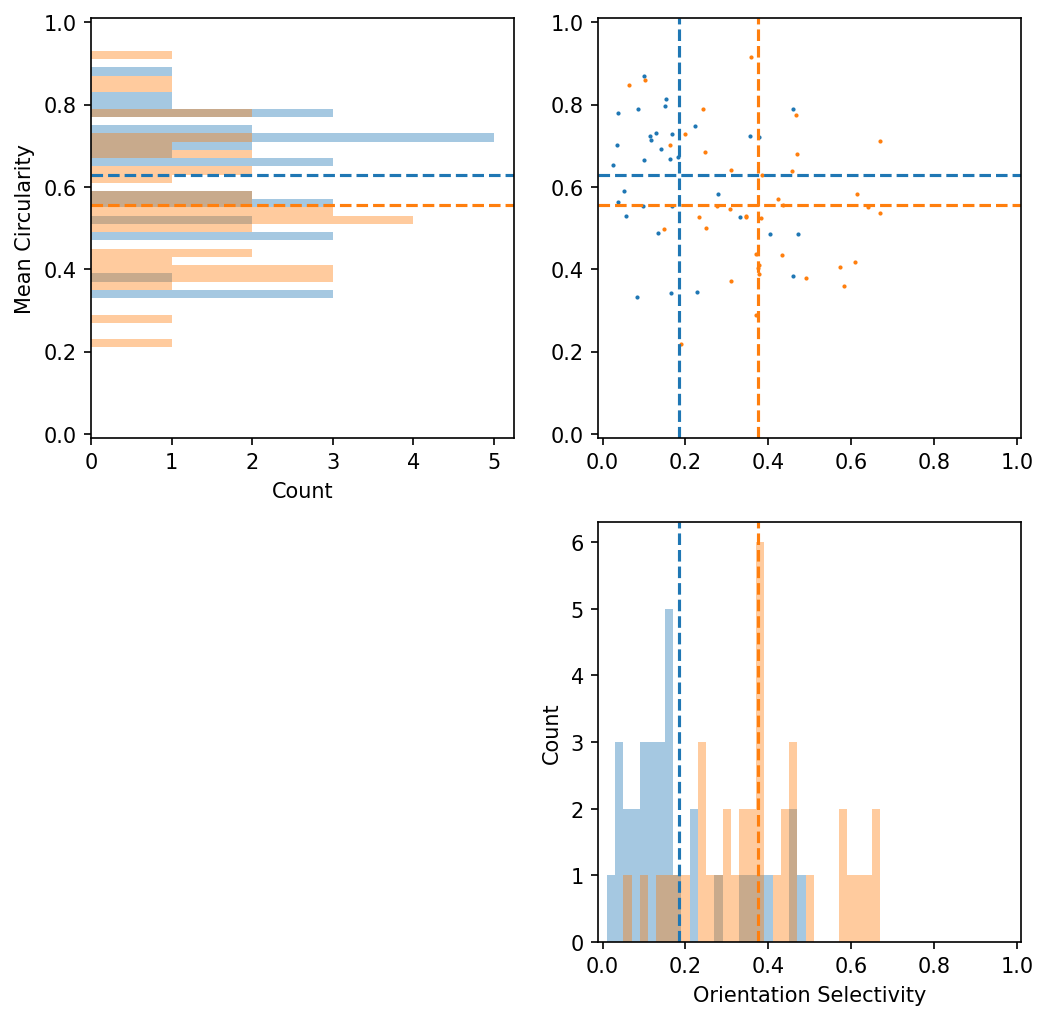

In [207]:
nbins = 50

fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=150)

axs[1,0].set_axis_off()

axs[0,0].hist(naive_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled',orientation="horizontal")
axs[0,0].hist(exper_crc,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled',orientation="horizontal")
axs[0,1].scatter(naive_OS,naive_crc,s=1)
axs[0,1].scatter(exper_OS,exper_crc,s=1)
axs[1,1].hist(naive_OS,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(exper_OS,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')

axs[0,0].axhline(np.nanmean(naive_crc),c='C0',ls='--')
axs[0,0].axhline(np.nanmean(exper_crc),c='C1',ls='--')
axs[0,1].axhline(np.nanmean(naive_crc),c='C0',ls='--')
axs[0,1].axhline(np.nanmean(exper_crc),c='C1',ls='--')
axs[0,1].axvline(np.nanmean(naive_OS),c='C0',ls='--')
axs[0,1].axvline(np.nanmean(exper_OS),c='C1',ls='--')
axs[1,1].axvline(np.nanmean(naive_OS),c='C0',ls='--')
axs[1,1].axvline(np.nanmean(exper_OS),c='C1',ls='--')

axs[0,0].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))

axs[0,0].set_ylabel('Mean Circularity')
axs[1,1].set_xlabel('Orientation Selectivity')
axs[0,0].set_xlabel('Count')
axs[1,1].set_ylabel('Count')

# Try Higher Spatial Frequency

In [591]:
noris = 8
nphss = 16

freq = 0.12

hf_grates = np.zeros((noris,nphss,48,48))

xs,ys = np.meshgrid(np.arange(48)*0.5,np.arange(48)*0.5)

for i in range(noris):
    ori = i/noris*np.pi
    for j in range(nphss):
        phs = j/nphss*2*np.pi
        hf_grates[i,j] = np.heaviside(np.cos(phs+2*np.pi*freq*(np.cos(ori)*xs+np.sin(ori)*ys)),0.5)

In [592]:
naive_hf_resp = [None]*Nnaive
exper_hf_resp = [None]*Nexper

for i in range(Nnaive):
    # naive_hf_resp[i] = np.mean(np.fmax(0,np.sum(2*(grates-0.5)*naive_RF[i][None,None,:,:],(-2,-1))-0),1)
    # thresh = np.mean(np.fmax(0,np.sum(grates*(naive_RF[i]== 1)[None,None,:,:]+\
    #                               (1-grates)*(naive_RF[i]==-1)[None,None,:,:],(-2,-1))))
    # naive_hf_resp[i] = np.mean(np.fmax(0,np.sum(grates*(naive_RF[i]== 1)[None,None,:,:]+\
    #                                      (1-grates)*(naive_RF[i]==-1)[None,None,:,:],(-2,-1))-thresh),1)
    # _,naive_hf_resp[i],_ = af.calc_dc_ac_comp(np.fmax(0,np.sum(grates*(naive_RF[i]== 1)[None,None,:,:]+\
    #                                                     (1-grates)*(naive_RF[i]==-1)[None,None,:,:],(-2,-1))),1)
    A0,A1,_ = af.calc_dc_ac_comp(np.fmax(0,np.sum(grates*(naive_ON[i]== 1)[None,None,:,:]+\
                                              (1-grates)*(naive_OF[i]==-1)[None,None,:,:],(-2,-1))),1)
    naive_hf_resp[i] = np.where(A1==0,0,A1/A0)

for i in range(Nexper):
    # exper_hf_resp[i] = np.mean(np.fmax(0,np.sum(2*(grates-0.5)*exper_RF[i][None,None,:,:],(-2,-1))-50),1)
    # thresh = np.mean(np.fmax(0,np.sum(grates*(exper_RF[i]== 1)[None,None,:,:]+\
    #                               (1-grates)*(exper_RF[i]==-1)[None,None,:,:],(-2,-1))))
    # exper_hf_resp[i] = np.mean(np.fmax(0,np.sum(grates*(exper_RF[i]== 1)[None,None,:,:]+\
    #                                      (1-grates)*(exper_RF[i]==-1)[None,None,:,:],(-2,-1))-thresh),1)
    # _,exper_hf_resp[i],_ = af.calc_dc_ac_comp(np.fmax(0,np.sum(grates*(exper_RF[i]== 1)[None,None,:,:]+\
    #                                                     (1-grates)*(exper_RF[i]==-1)[None,None,:,:],(-2,-1))),1)
    A0,A1,_ = af.calc_dc_ac_comp(np.fmax(0,np.sum(grates*(exper_ON[i]== 1)[None,None,:,:]+\
                                              (1-grates)*(exper_OF[i]==-1)[None,None,:,:],(-2,-1))),1)
    exper_hf_resp[i] = np.where(A1==0,0,A1/A0)

/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_43648/455856286.py:14: RuntimeWarning: invalid value encountered in divide
  naive_hf_resp[i] = np.where(A1==0,0,A1/A0)
/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_43648/455856286.py:26: RuntimeWarning: invalid value encountered in divide
  exper_hf_resp[i] = np.where(A1==0,0,A1/A0)


In [593]:
reload(af)

naive_hf_OS = [None]*Nnaive
exper_hf_OS = [None]*Nexper

for i in range(Nnaive):
    A0,A1,_ = af.calc_dc_ac_comp(naive_hf_resp[i])
    if A1==0:
        naive_hf_OS[i] = 0
    else:
        naive_hf_OS[i] = A1/A0

for i in range(Nexper):
    A0,A1,_ = af.calc_dc_ac_comp(exper_hf_resp[i])
    if A1==0:
        exper_hf_OS[i] = 0
    else:
        exper_hf_OS[i] = A1/A0

Text(0, 0.5, 'CDF')

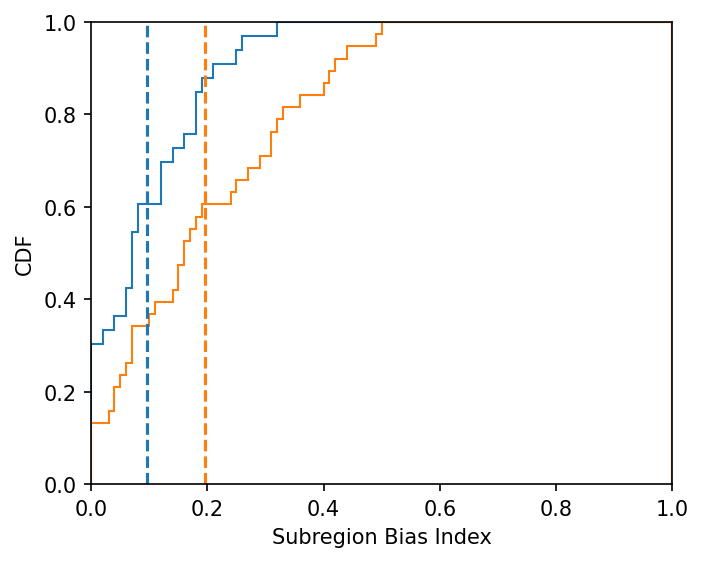

In [594]:
fig,axs = plt.subplots(1,1,figsize=(5,4),dpi=150)

axs.hist(naive_hf_OS,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')
axs.hist(exper_hf_OS,np.linspace(0,1,101),density=True,cumulative=True,histtype='step')

axs.axvline(np.nanmean(naive_hf_OS),c='C0',ls='--')
axs.axvline(np.nanmean(exper_hf_OS),c='C1',ls='--')

axs.set_xlim(0,1)
axs.set_ylim(0,1)

axs.set_xlabel('Subregion Bias Index')
axs.set_ylabel('CDF')

In [595]:
print(np.mean(np.array(naive_hf_OS)))
print(np.mean(np.array(exper_hf_OS)))

0.09670824368867025
0.19627149528618515


Text(0, 0.5, 'Count')

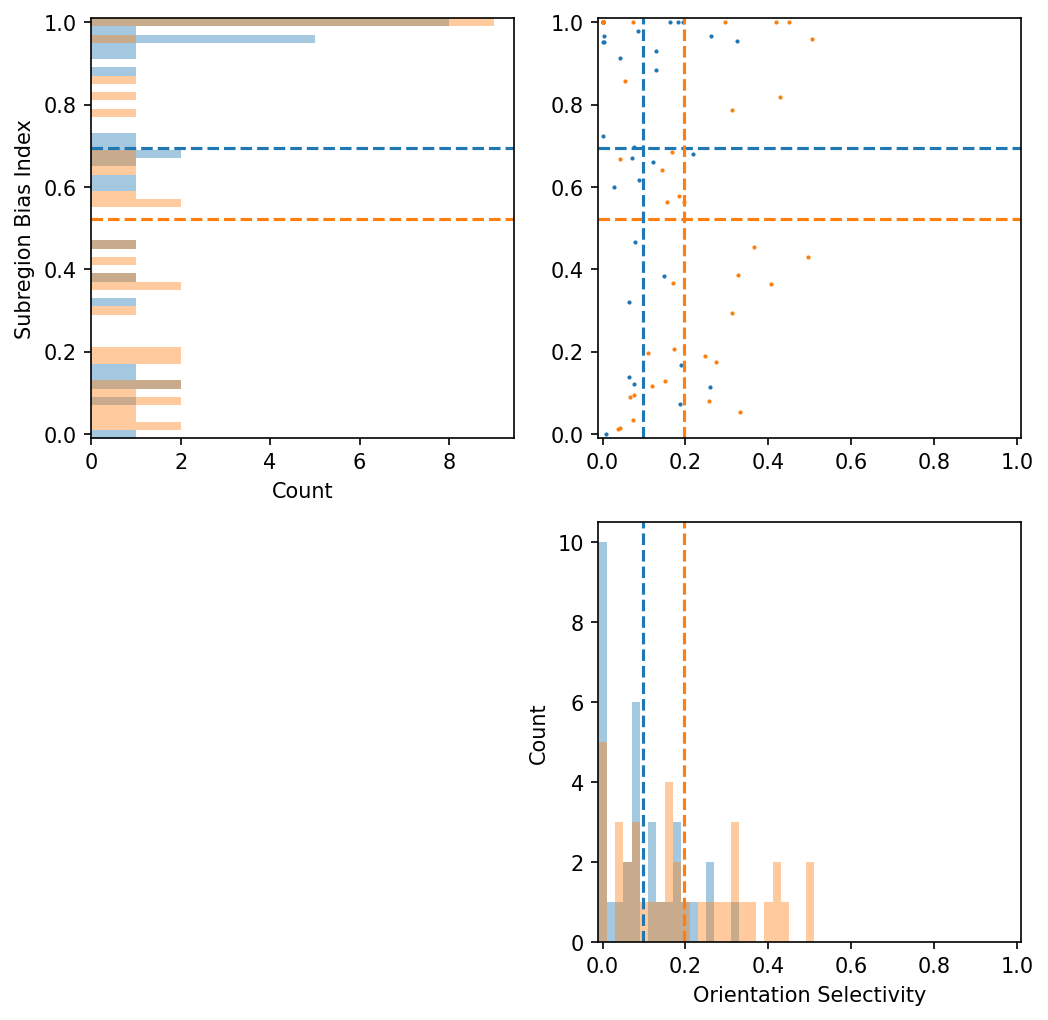

In [596]:
nbins = 50

fig,axs = plt.subplots(2,2,figsize=(8,8),dpi=150)

axs[1,0].set_axis_off()

axs[0,0].hist(naive_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled',orientation="horizontal")
axs[0,0].hist(exper_bias,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled',orientation="horizontal")
axs[0,1].scatter(naive_hf_OS,naive_bias,s=1)
axs[0,1].scatter(exper_hf_OS,exper_bias,s=1)
axs[1,1].hist(naive_hf_OS,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')
axs[1,1].hist(exper_hf_OS,np.linspace(-1/(2*nbins),1+1/(2*nbins),2+nbins),alpha=0.4,histtype='stepfilled')

axs[0,0].axhline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0,0].axhline(np.nanmean(exper_bias),c='C1',ls='--')
axs[0,1].axhline(np.nanmean(naive_bias),c='C0',ls='--')
axs[0,1].axhline(np.nanmean(exper_bias),c='C1',ls='--')
axs[0,1].axvline(np.nanmean(naive_hf_OS),c='C0',ls='--')
axs[0,1].axvline(np.nanmean(exper_hf_OS),c='C1',ls='--')
axs[1,1].axvline(np.nanmean(naive_hf_OS),c='C0',ls='--')
axs[1,1].axvline(np.nanmean(exper_hf_OS),c='C1',ls='--')

axs[0,0].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_ylim(-1/(2*nbins),1+1/(2*nbins))
axs[0,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))
axs[1,1].set_xlim(-1/(2*nbins),1+1/(2*nbins))

axs[0,0].set_ylabel('Subregion Bias Index')
axs[1,1].set_xlabel('Orientation Selectivity')
axs[0,0].set_xlabel('Count')
axs[1,1].set_ylabel('Count')

# Simulate RFs with Fixed Total Area, Varying Bias and Circularity

We'll assume a fixed total area of 72 deg$^2$ and a fixed centroid separation of 6 deg. The orientation of both subregions will always be perpendicular to the vector between the subregion centers. We'll assume a maximum of one subregion of each type. Center of mass will always be located at RF center.

$$bias = \frac{A_{on}-A_{off}}{A_{on}+A_{off}} = \frac{A_{on}-A_{off}}{75\text{ deg}^2}$$

$$A_{on} = (1+bias)\times 36\text{ deg}^2$$

$$A_{off} = (1-bias)\times 36\text{ deg}^2$$

$$x_{on}A_{on} + x_{off}A_{off} = 0, \quad x_{on}-x_{off} = 5\text{ deg}$$

$$x_{on} = \frac{A_{off}}{12\text{ deg}}$$

$$x_{off} = -\frac{A_{on}}{12\text{ deg}}$$

$$A = \pi a b, \quad b/a = circ$$

$$a = \sqrt{\frac{A}{\pi\times circ}}$$

$$b = \sqrt{\frac{A\times circ}{\pi}}$$

In [253]:
def gen_ellipse(xs,ys,a,b,d,ori):
    x0 = d*np.cos(ori)
    y0 = d*np.sin(ori)
    
    return ((((xs-x0)*np.cos(ori+np.pi/2)+(ys-y0)*np.sin(ori+np.pi/2))/a)**2 +\
        ((-(xs-x0)*np.sin(ori+np.pi/2)+(ys-y0)*np.cos(ori+np.pi/2))/b)**2) < 1

def gen_RF(xs,ys,area,sep,bias,circ,ori):
    Aon = (1+bias)*area/2
    Aof = (1-bias)*area/2
    
    don = Aof*sep/area
    dof = -Aon*sep/area
    
    aon = np.sqrt(Aon/(np.pi*circ))
    bon = np.sqrt((Aon*circ)/np.pi)
    aof = np.sqrt(Aof/(np.pi*circ))
    bof = np.sqrt((Aof*circ)/np.pi)

    if Aon > 0:
        RF_ON = gen_ellipse(xs,ys,aon,bon,don,ori)
    else:
        RF_ON = np.zeros_like(xs)
    if bias < 1:
        RF_OF = gen_ellipse(xs,ys,aof,bof,dof,ori)
    else:
        RF_OF = 0
        
    return RF_ON,RF_OF

In [277]:
biass = np.linspace(0,1,11)
circs = np.linspace(0.4,1,7)

RF_ONs = np.zeros((len(biass),len(circs),50,50))
RF_OFs = np.zeros((len(biass),len(circs),50,50))
xs,ys = np.meshgrid(np.arange(50)*0.5-12.25,np.arange(50)*0.5-12.25)

for i,bias in enumerate(biass):
    for j,circ in enumerate(circs):
        
        RF_ONs[i,j],RF_OFs[i,j] = gen_RF(xs,ys,72,6,bias,circ,0)
        
        RF_tot = np.sum(RF_ONs[i,j],(-2,-1))+np.sum(RF_OFs[i,j],(-2,-1))
        RF_ONs[i,j] /= RF_tot
        RF_OFs[i,j] /= RF_tot

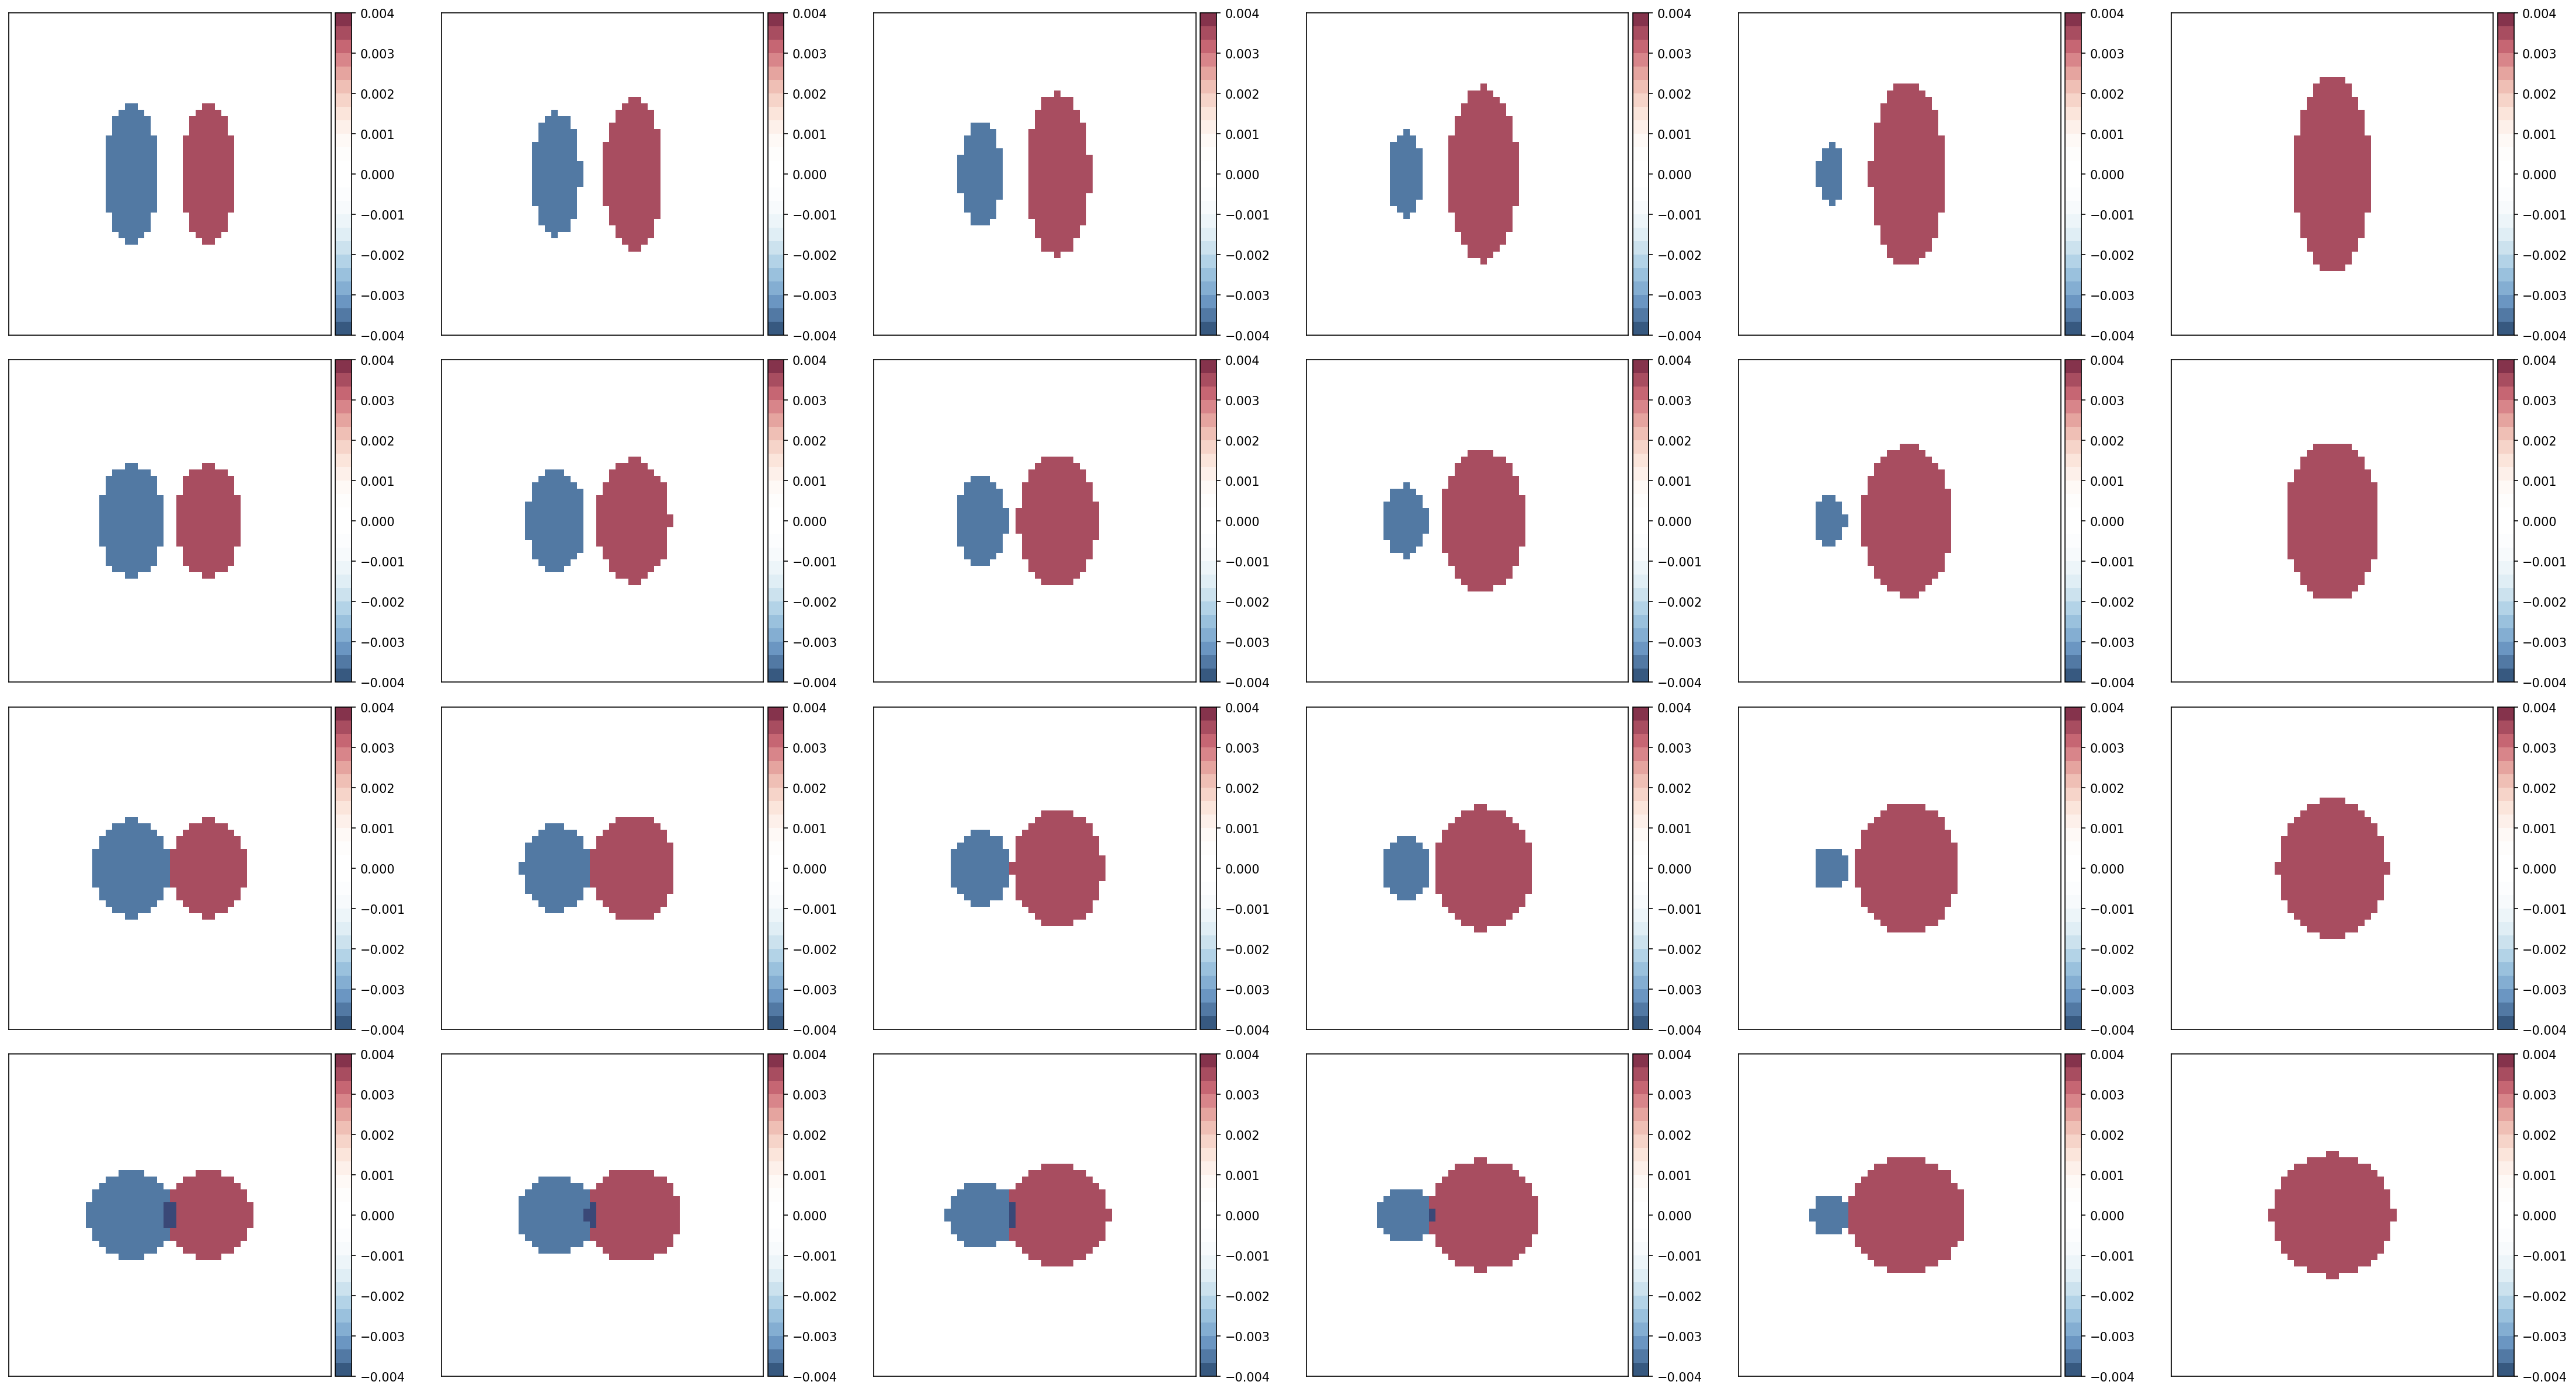

In [278]:
fig,axs = plt.subplots(len(circs[::2]),len(biass[::2]),figsize=(5*len(biass[::2]),4*len(circs[::2])),dpi=150)

for i,bias in enumerate(biass[::2]):
    for j,circ in enumerate(circs[::2]):
        pf.doubimshbar(fig,axs[j,i],RF_ONs[2*i,2*j],-RF_OFs[2*i,2*j],origin='lower',cmap='RdBu_r',vmin=-0.004,vmax=0.004)
        
fig.tight_layout()
fig.savefig('./l4_rfs.pdf')

In [197]:
noris = 12
nphss = 24

freq = 0.06

fine_grates = np.zeros((noris,nphss,50,50))

xs,ys = np.meshgrid(np.arange(50)*0.5,np.arange(50)*0.5)

for i in range(noris):
    ori = i/noris*np.pi
    for j in range(nphss):
        phs = j/nphss*2*np.pi
        fine_grates[i,j] = np.heaviside(np.cos(phs+2*np.pi*freq*(np.cos(ori)*xs+np.sin(ori)*ys)),0.5)

In [243]:
thrsh = 0.63

resps = np.sum(fine_grates[:,:,None,None,:,:]*RF_ONs[None,None,:,:,:,:] +\
    (1-fine_grates)[:,:,None,None,:,:]*RF_OFs[None,None,:,:,:,:],(-2,-1))
resps = np.fmax(0,resps - thrsh)

In [244]:
F0,F1,APP = af.calc_dc_ac_comp(resps,1)
F1 *= 2
MR = F1/F0
APP *= 360/(2*np.pi)
avg,OS,PO = af.calc_dc_ac_comp(F0,0)
OS = OS/avg
PO *= 180/(2*np.pi)

/var/folders/sm/hlw5tfpd0p385cm1782mwjmh0000gq/T/ipykernel_69062/1660767870.py:3: RuntimeWarning: invalid value encountered in divide
  MR = F1/F0


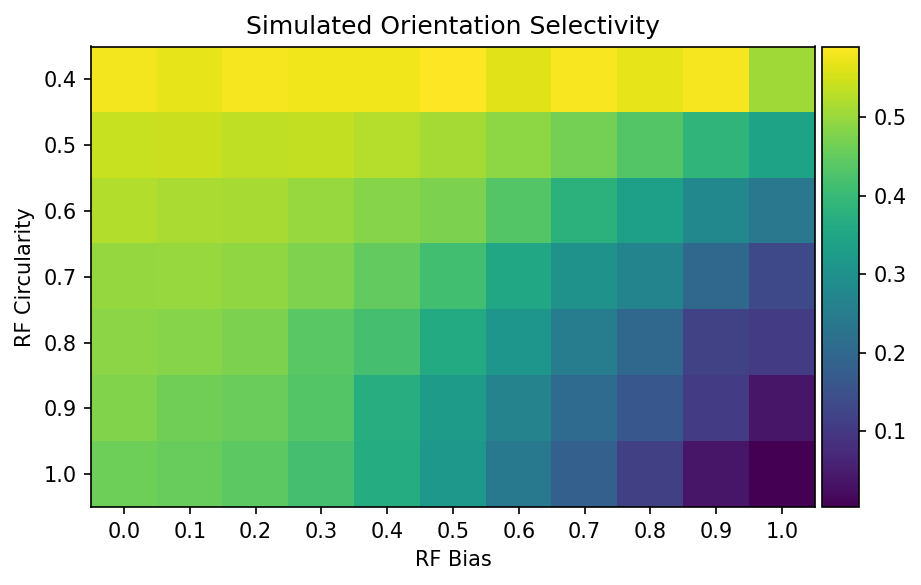

In [272]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(1,1,figsize=(8,4),dpi=150)

plot = axs.imshow(OS.T,cmap='viridis',vmin=np.min(OS),vmax=np.max(OS))
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(plot, cax=cax, orientation='vertical')

axs.set_xticks(np.arange(len(biass)),['{:.1f}'.format(bias) for bias in biass])
axs.set_yticks(np.arange(len(circs)),['{:.1f}'.format(circ) for circ in circs])

axs.set_xlabel('RF Bias')
axs.set_ylabel('RF Circularity')
axs.set_title('Simulated Orientation Selectivity')

fig.tight_layout()
fig.savefig('./l4_rf_os.pdf')

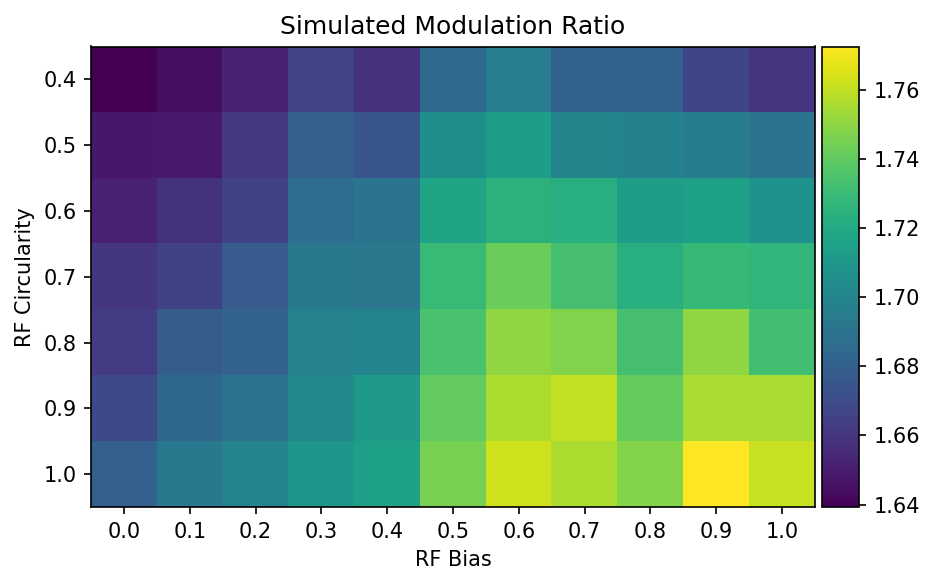

In [283]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig,axs = plt.subplots(1,1,figsize=(8,4),dpi=150)

plot = axs.imshow(MR[0,:,:].T,cmap='viridis',vmin=np.min(MR[0,:,:]),vmax=np.max(MR[0,:,:]))
divider = make_axes_locatable(axs)
cax = divider.append_axes('right', size='5%', pad=0.05)
fig.colorbar(plot, cax=cax, orientation='vertical')

axs.set_xticks(np.arange(len(biass)),['{:.1f}'.format(bias) for bias in biass])
axs.set_yticks(np.arange(len(circs)),['{:.1f}'.format(circ) for circ in circs])

axs.set_xlabel('RF Bias')
axs.set_ylabel('RF Circularity')
axs.set_title('Simulated Modulation Ratio')

fig.tight_layout()
fig.savefig('./l4_rf_mr.pdf')